                         MYMENSINGH NOISE POLLUTION ANALYSIS

[STEP 1] Loading Data from Both Sheets...
✓ Sheet 1 (Commercial & Residential): 10 rows
✓ Sheet 2 (Traffic & Sensitive): 10 rows
✓ Combined Data: 20 rows

[STEP 2] Feature Engineering...
✓ Total features created: 22
✓ Feature engineering complete!

DESCRIPTIVE STATISTICS SUMMARY

1. OVERALL STATISTICS (COMBINED DATA):
        9-11   11-1    2-4    4-6    6-7    7-8    8-9  Day Avg  Night Avg  \
count  20.00  20.00  20.00  20.00  20.00  20.00  20.00    20.00      20.00   
mean   70.07  71.54  73.09  73.13  74.81  75.55  74.45    72.05      74.93   
std    10.91  11.01  11.25  11.44  10.66  10.18   9.75    11.12      10.14   
min    47.10  46.40  47.20  46.10  47.40  46.80  46.10    46.70      46.80   
25%    66.77  70.12  71.93  71.42  73.35  74.70  71.78    70.70      73.53   
50%    74.20  76.05  76.80  76.55  77.55  77.50  77.45    76.60      77.15   
75%    76.92  78.22  79.22  78.92  81.62  81.22  79.80    78.35      80.

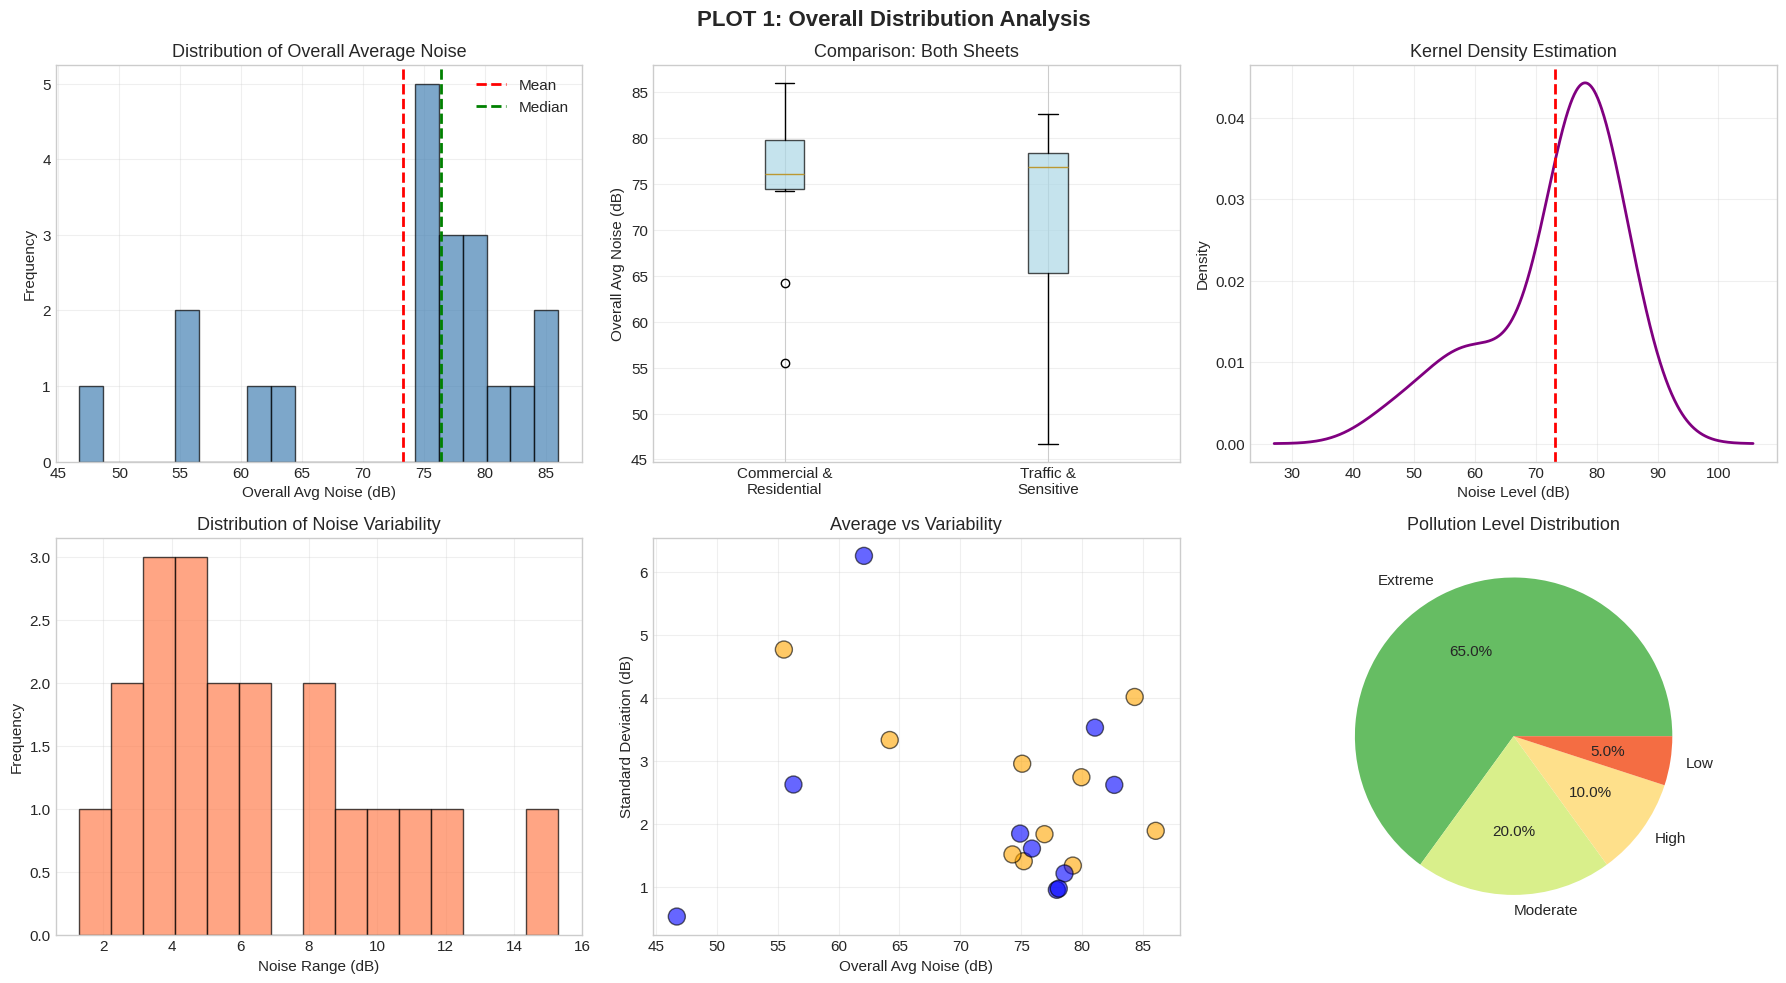

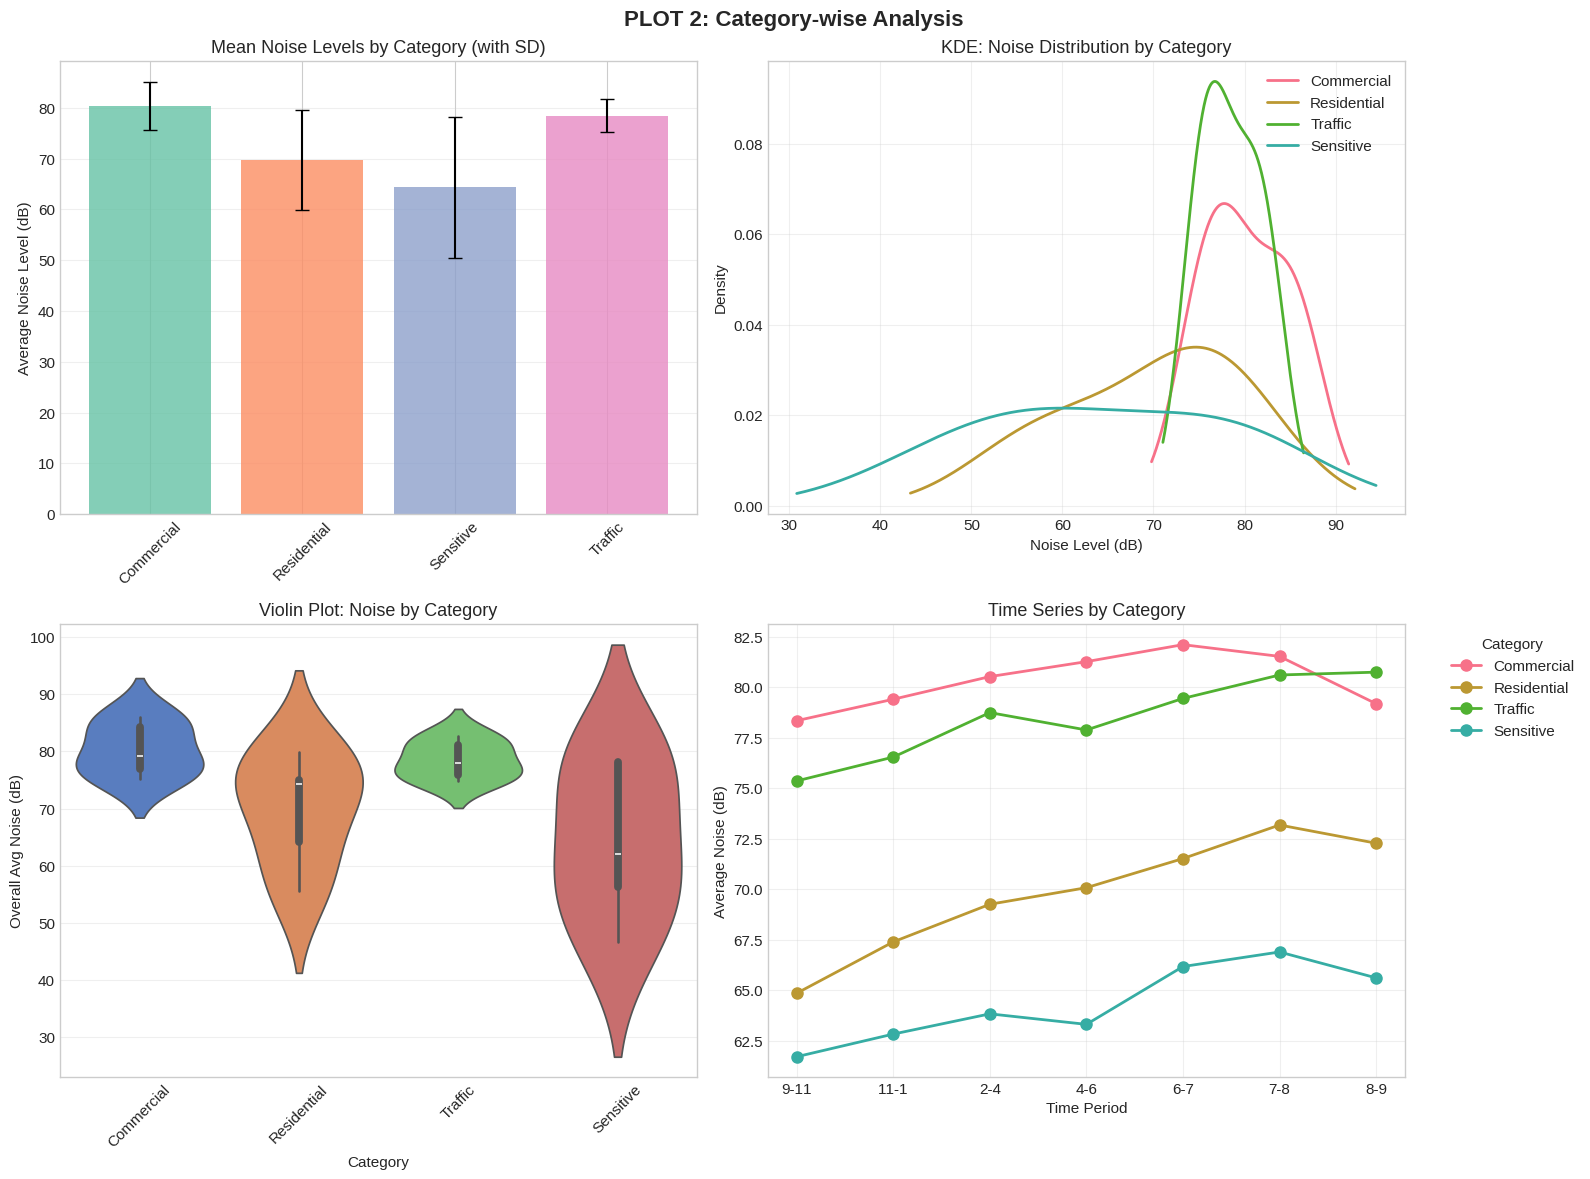

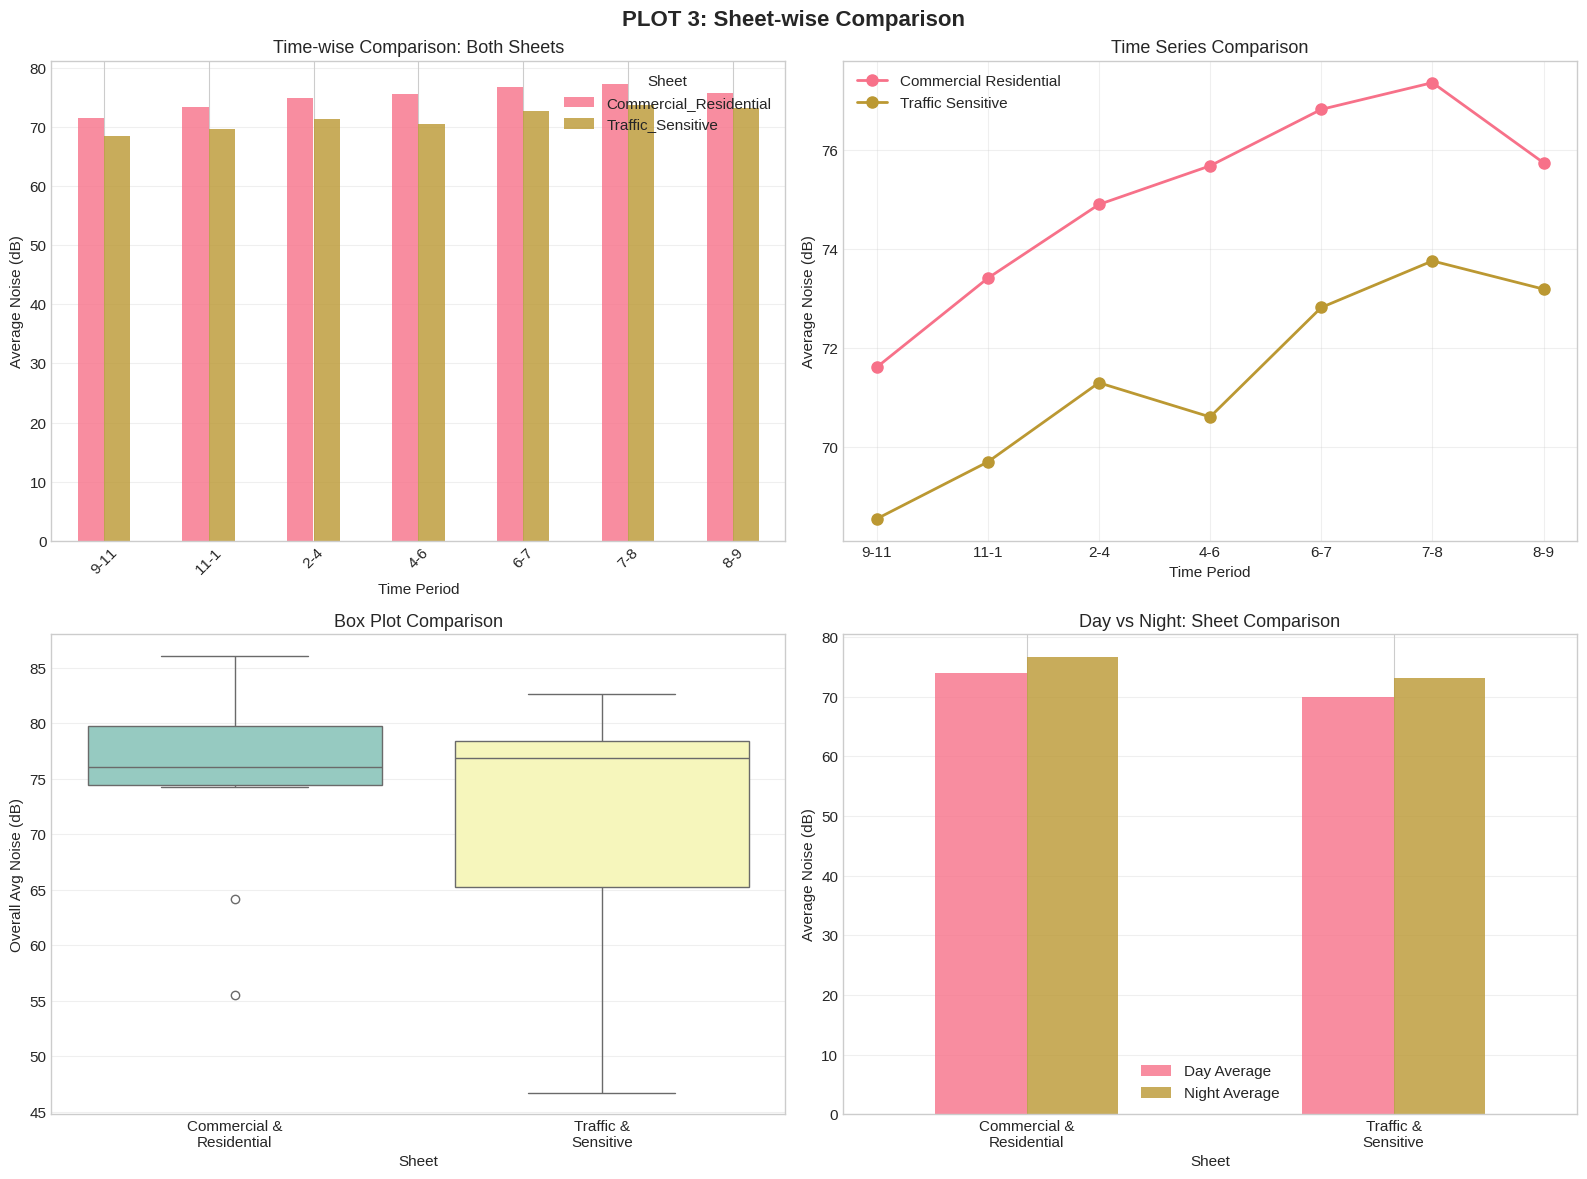

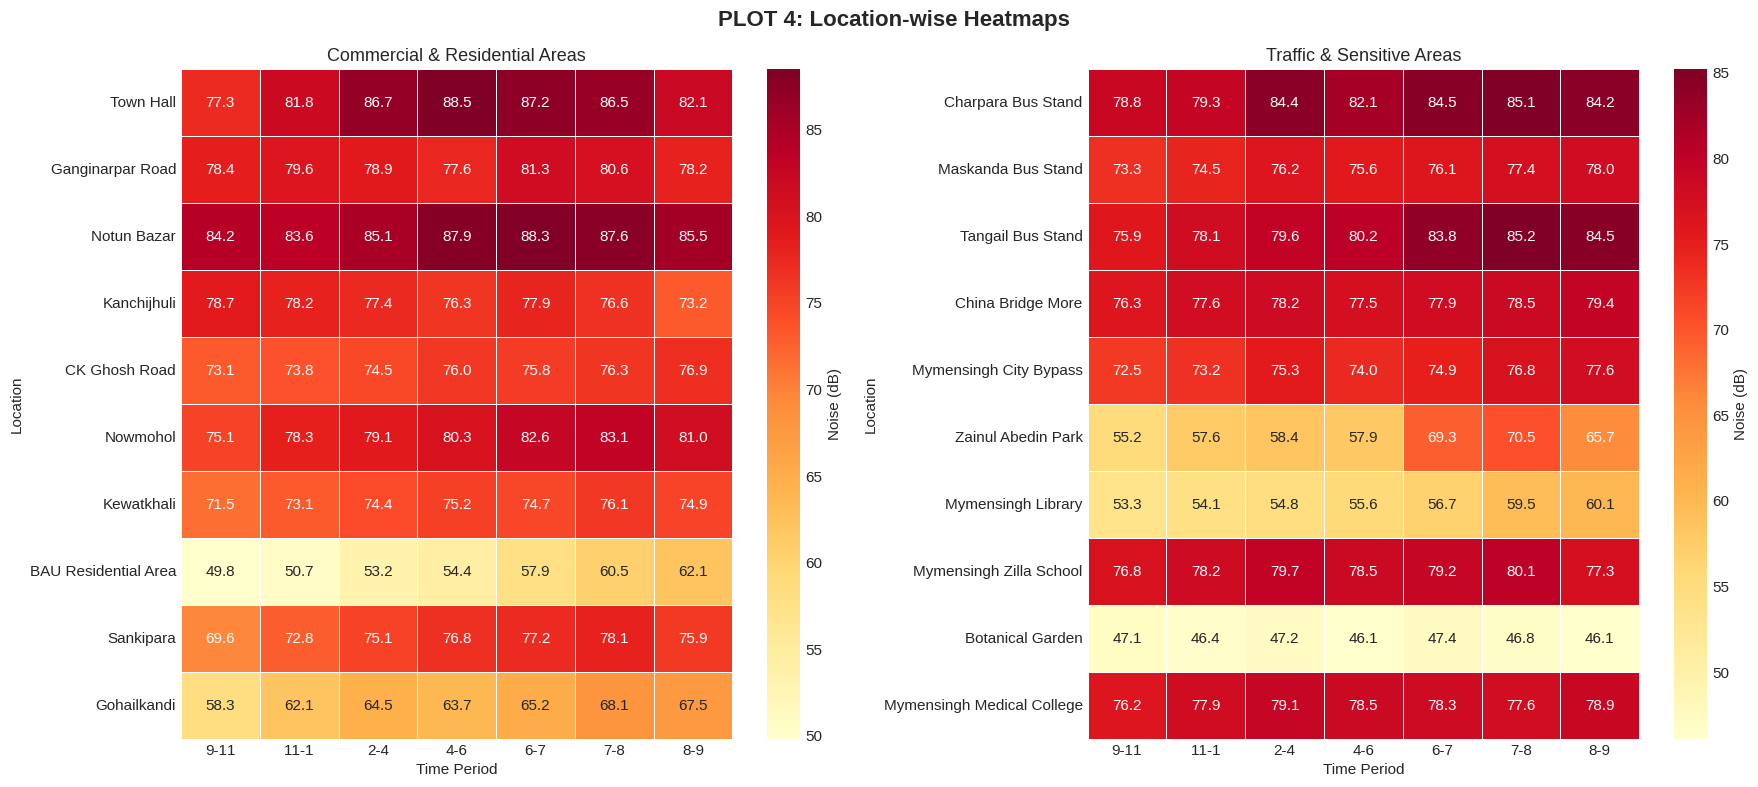

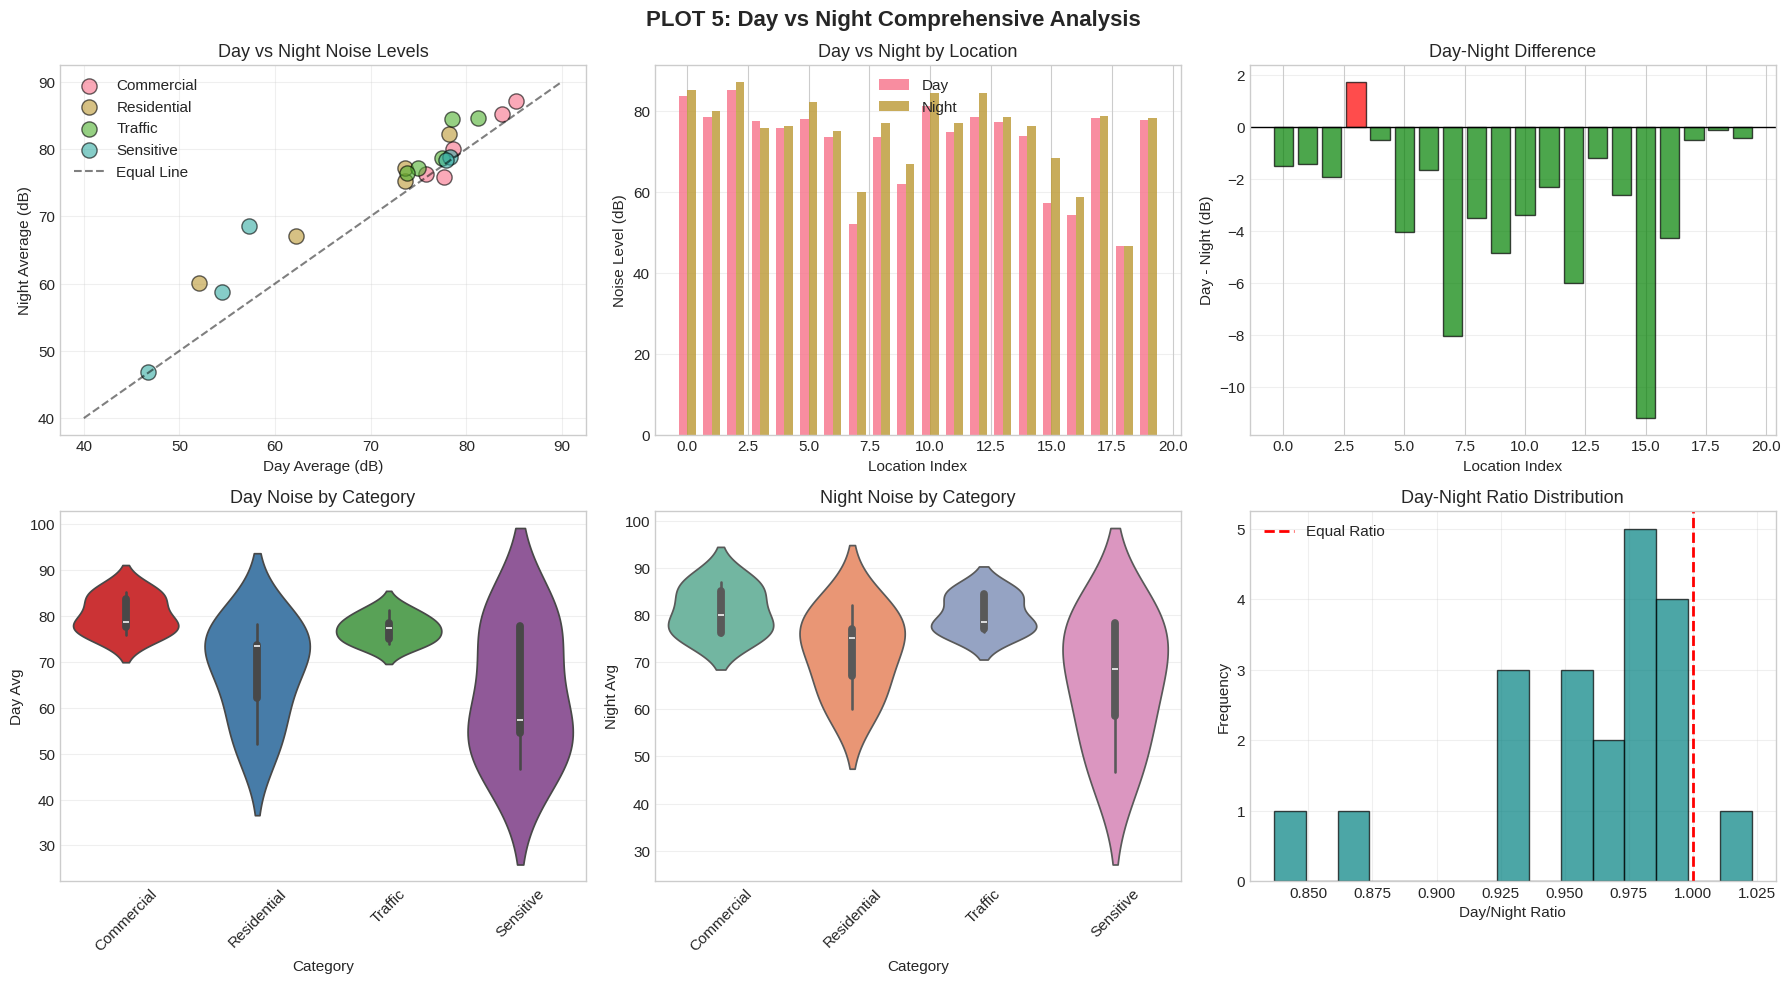

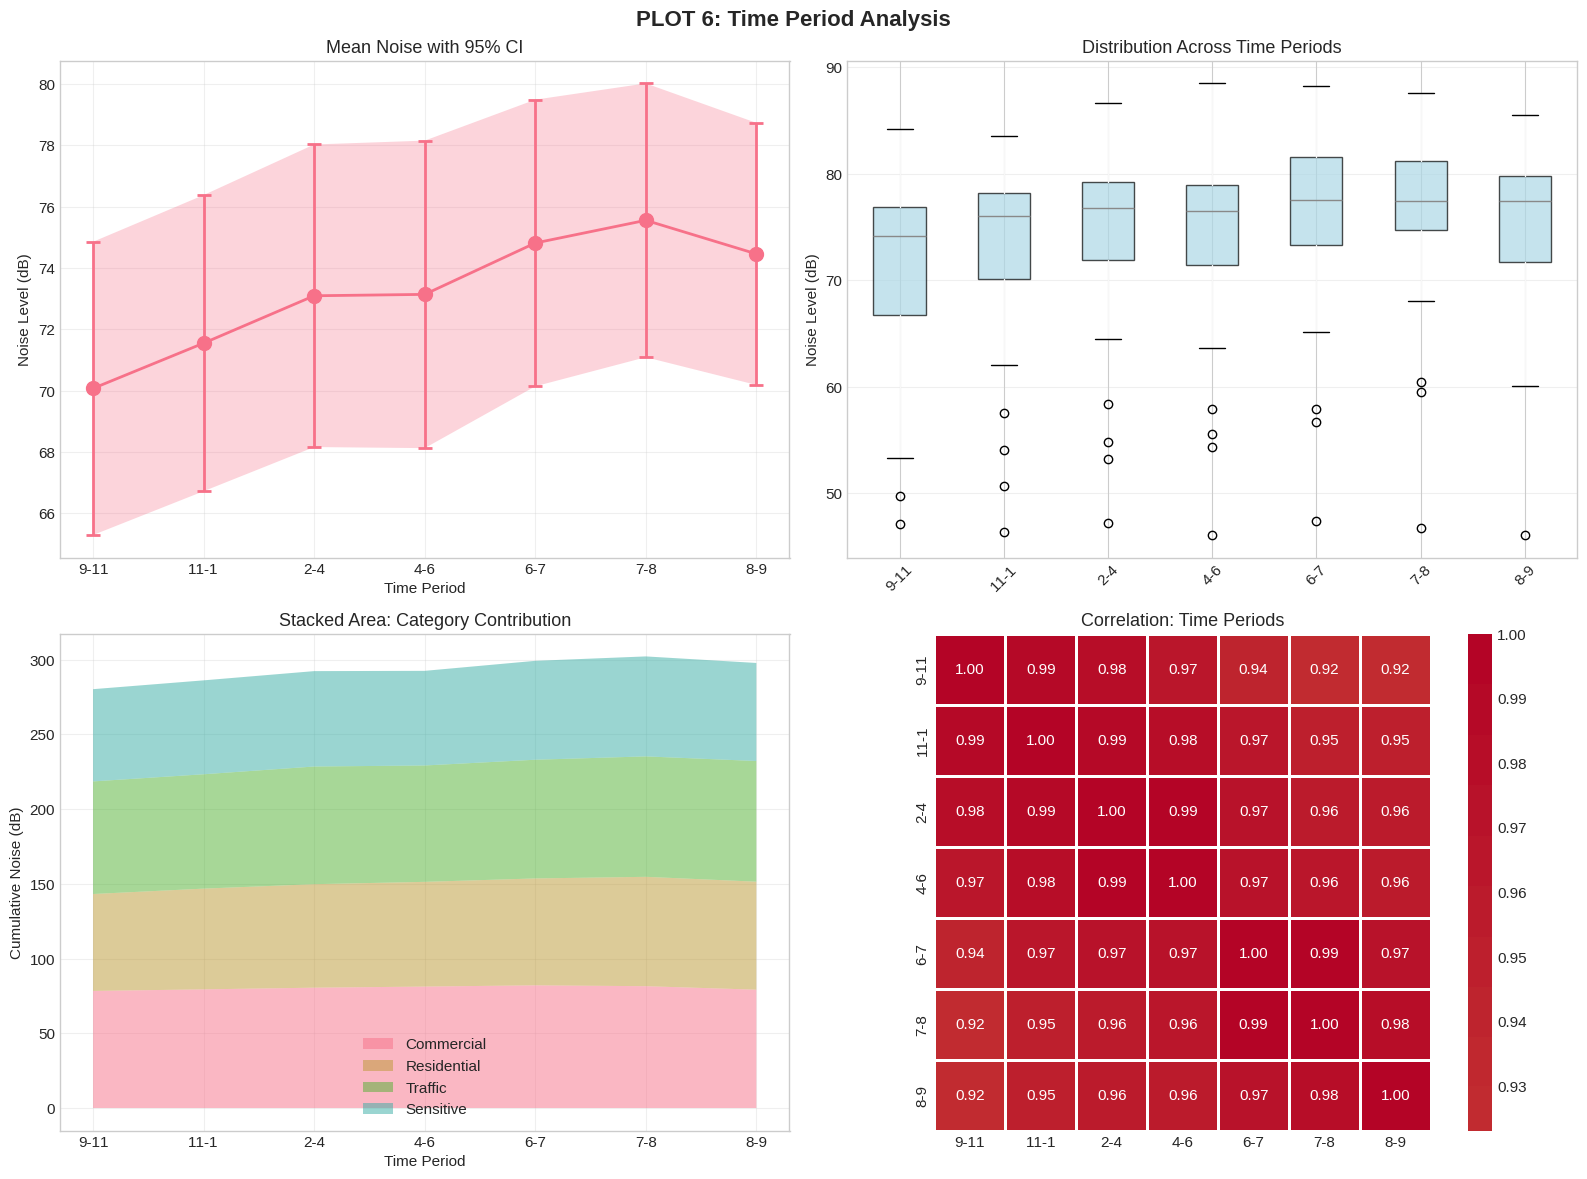

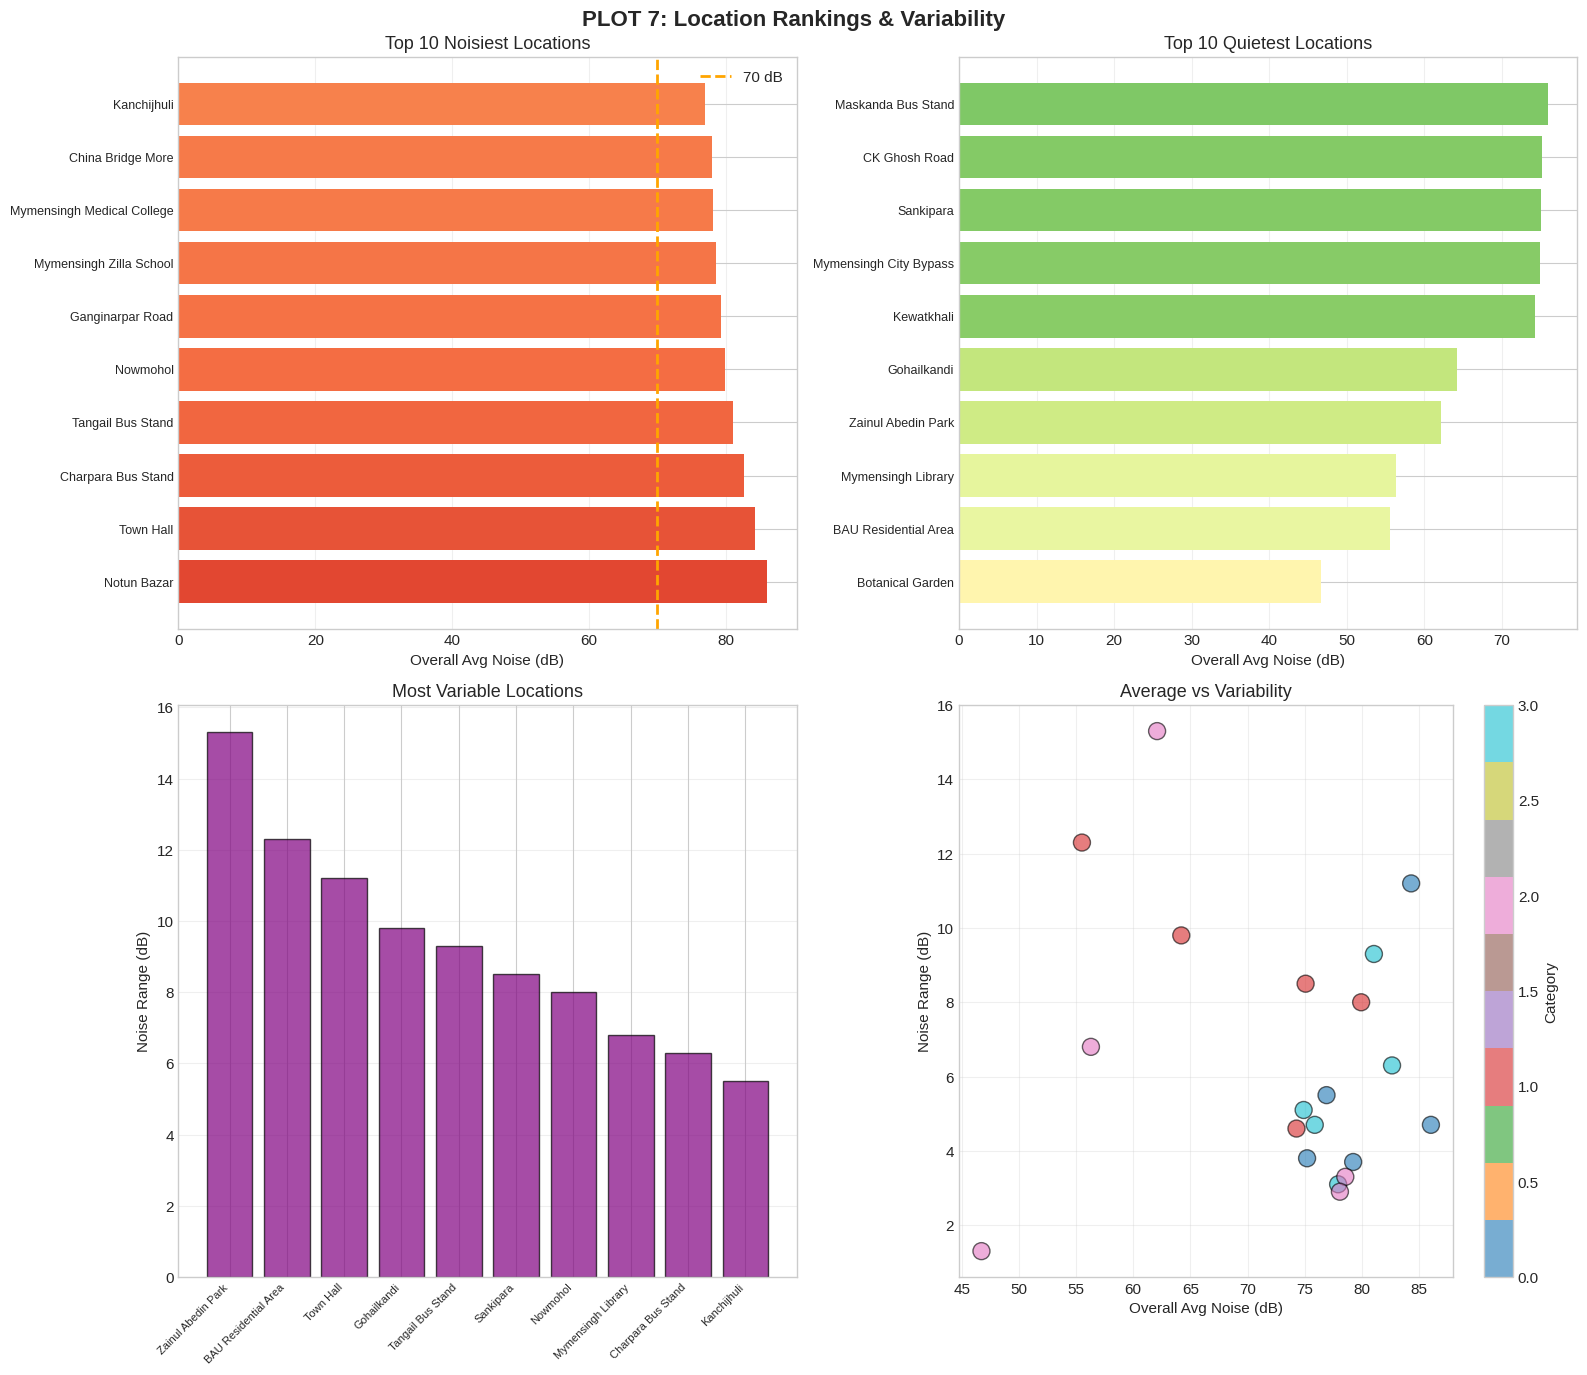

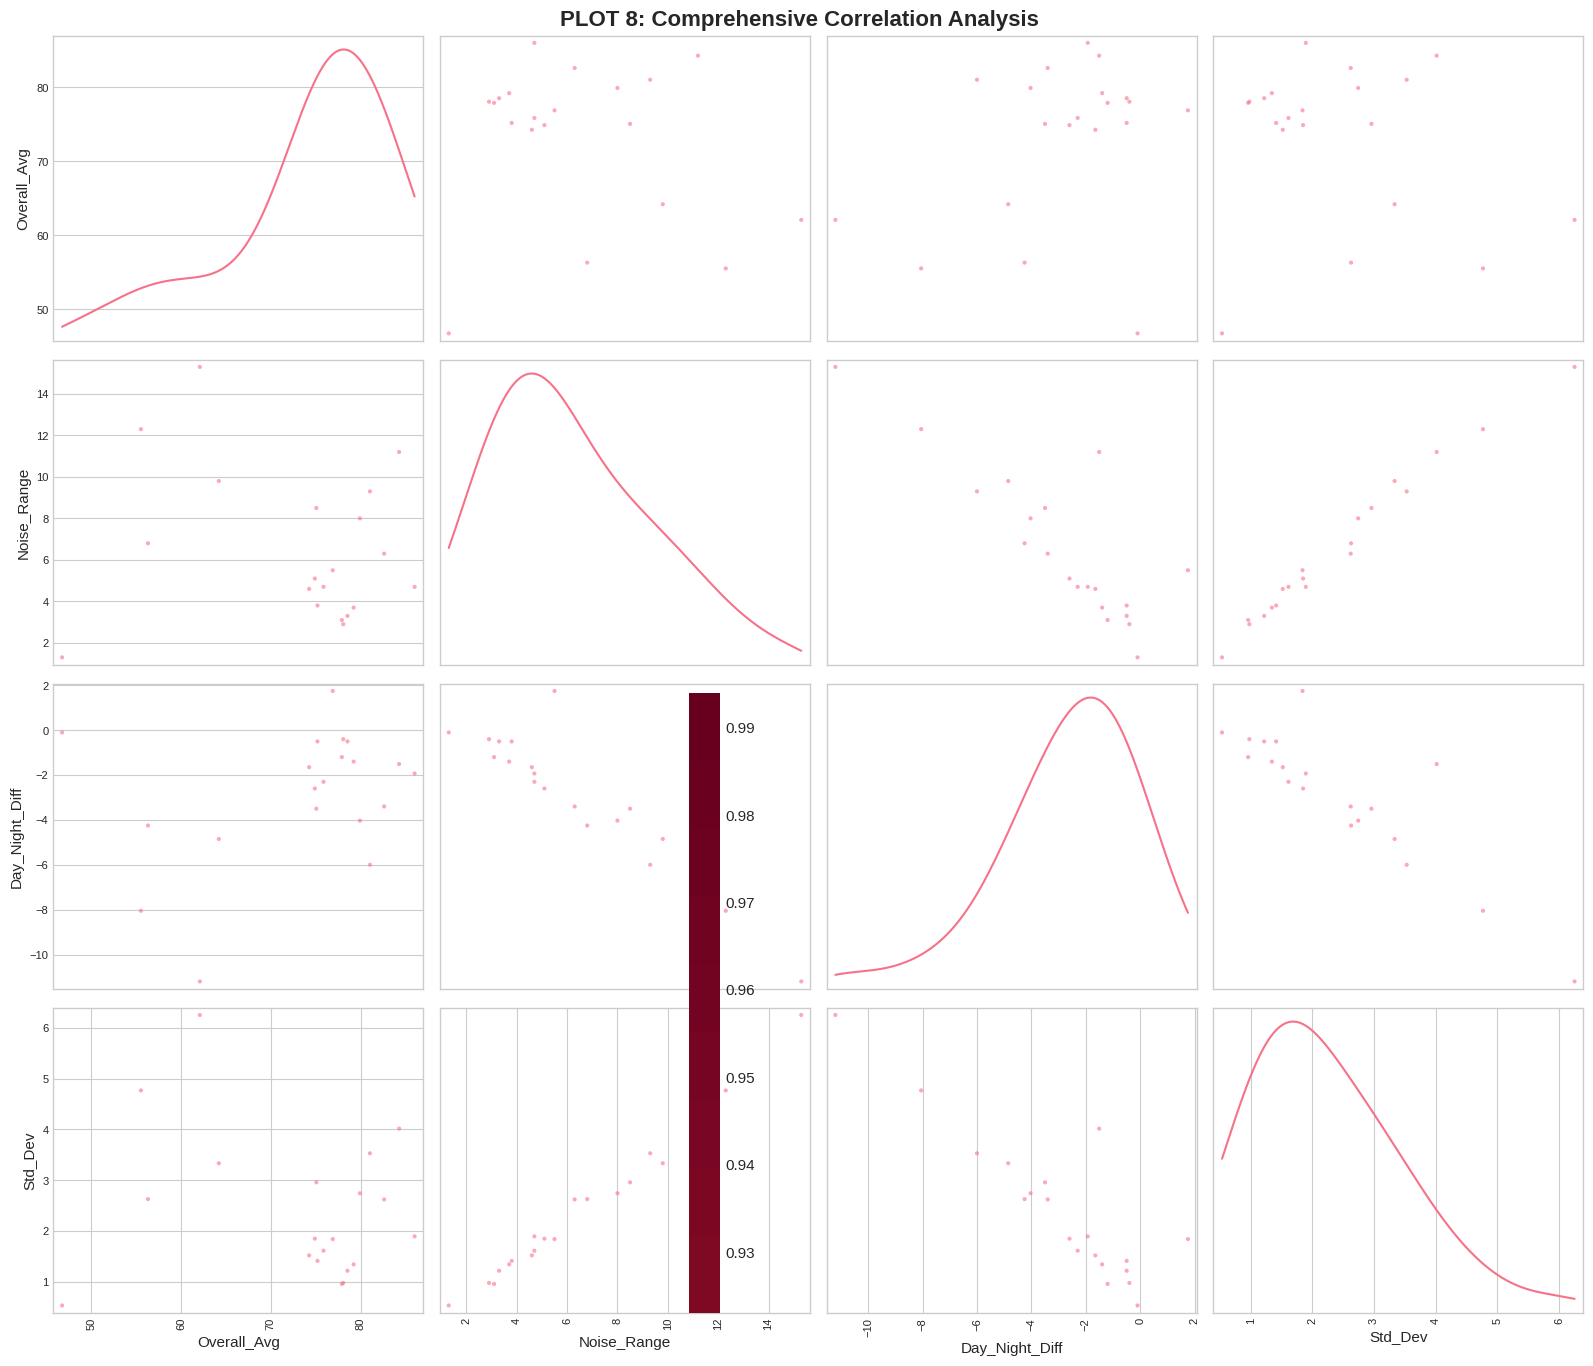

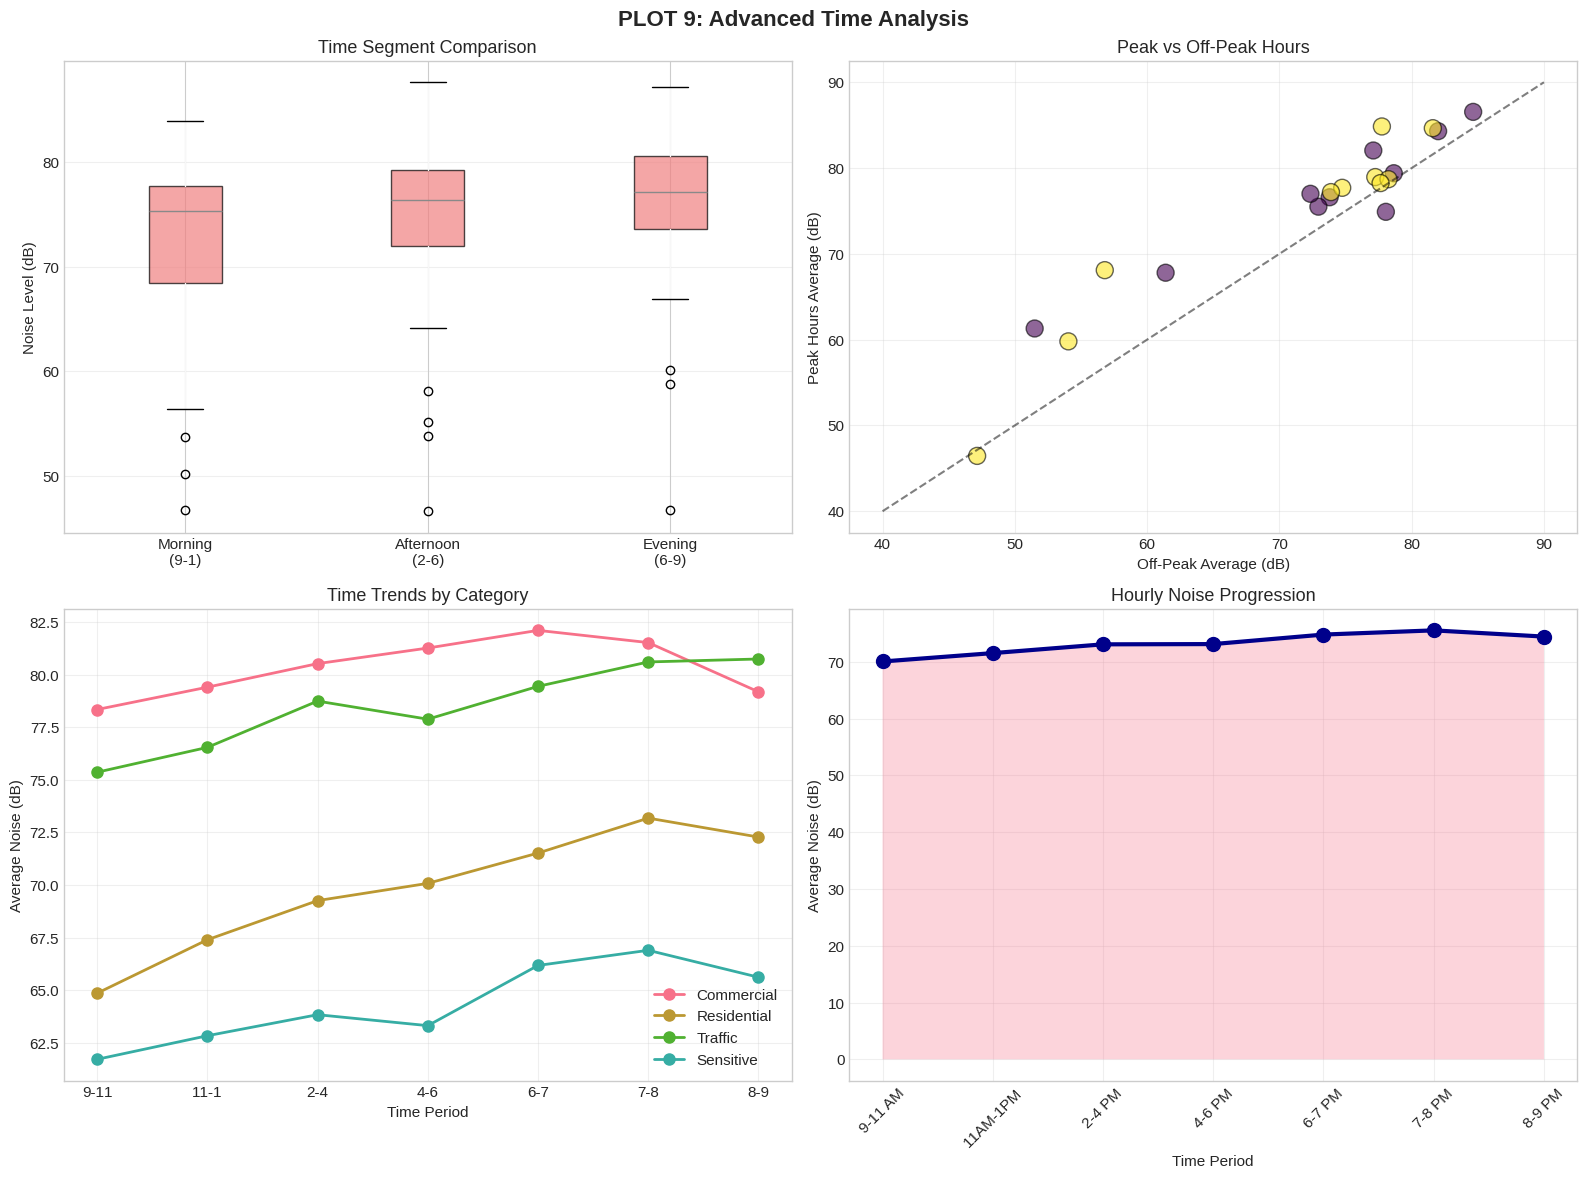

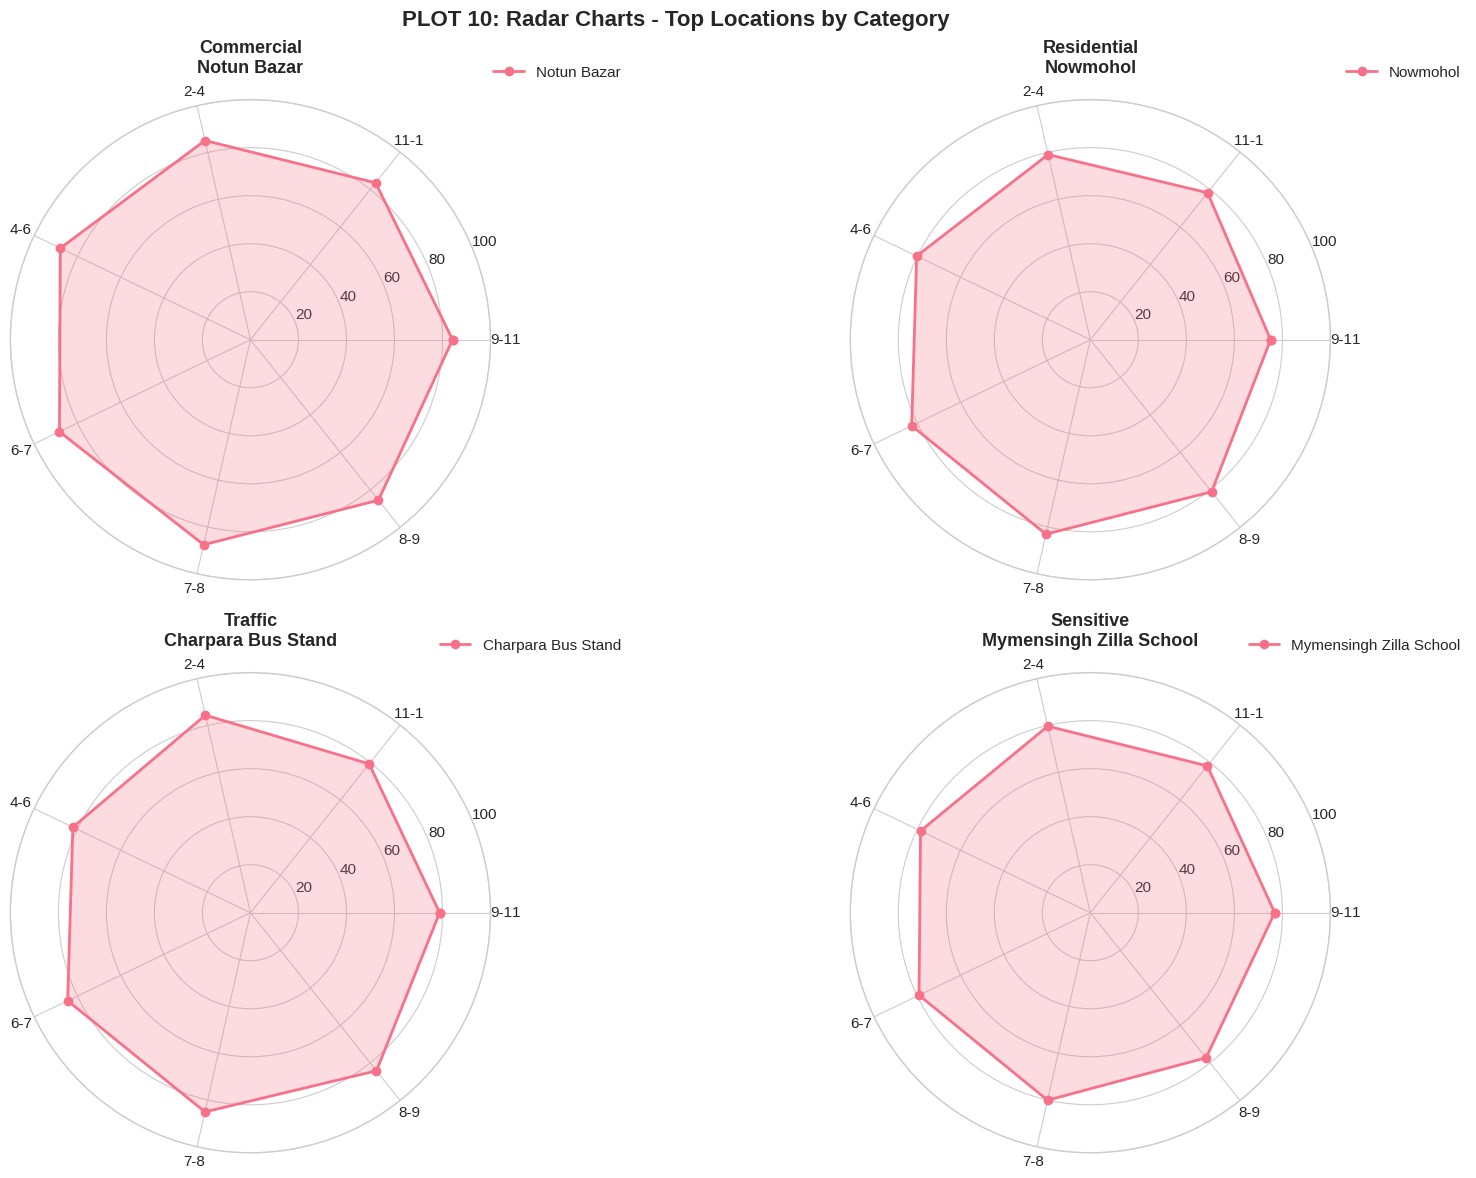

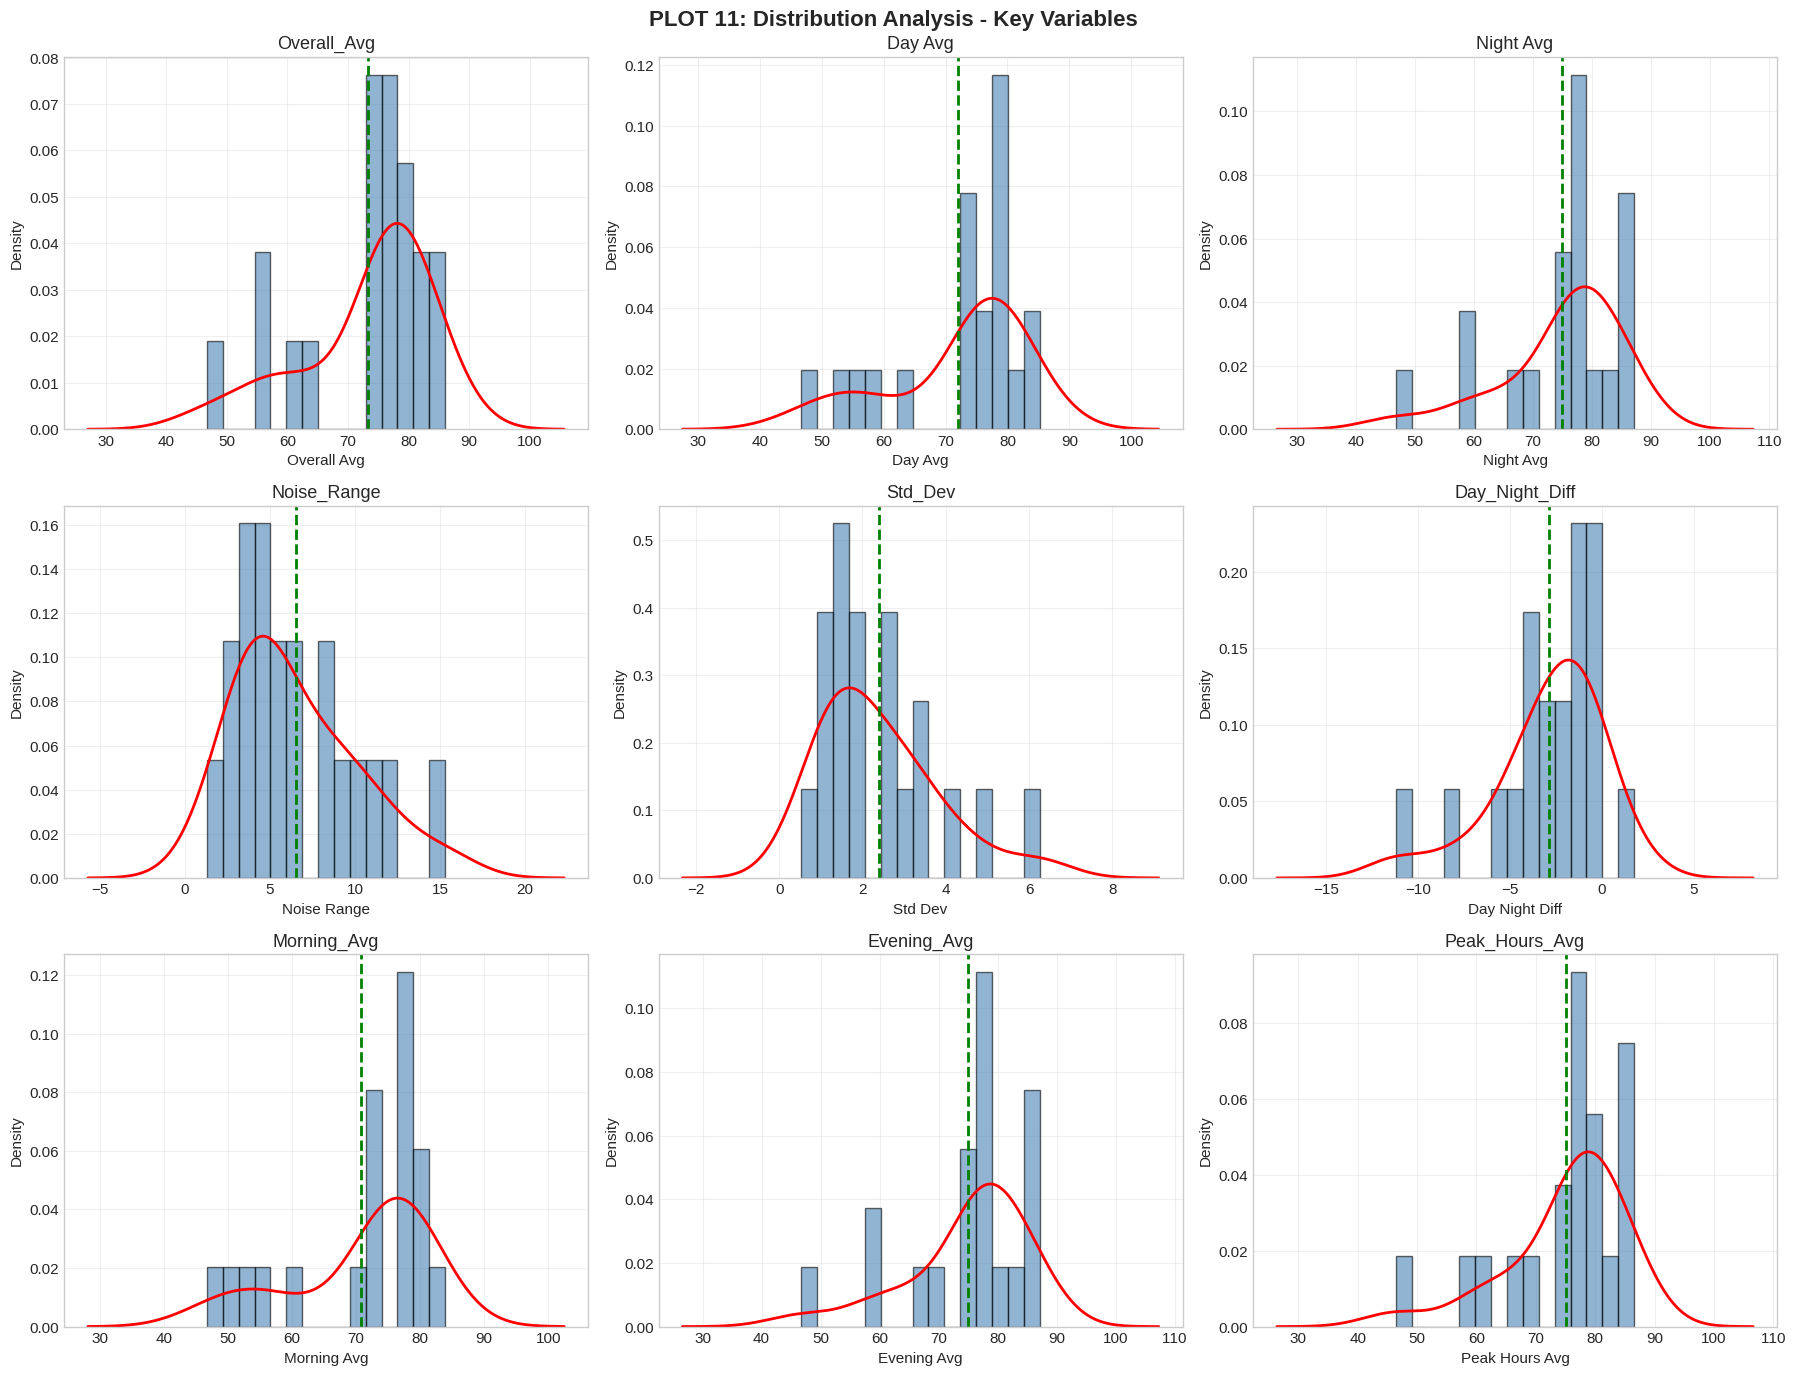

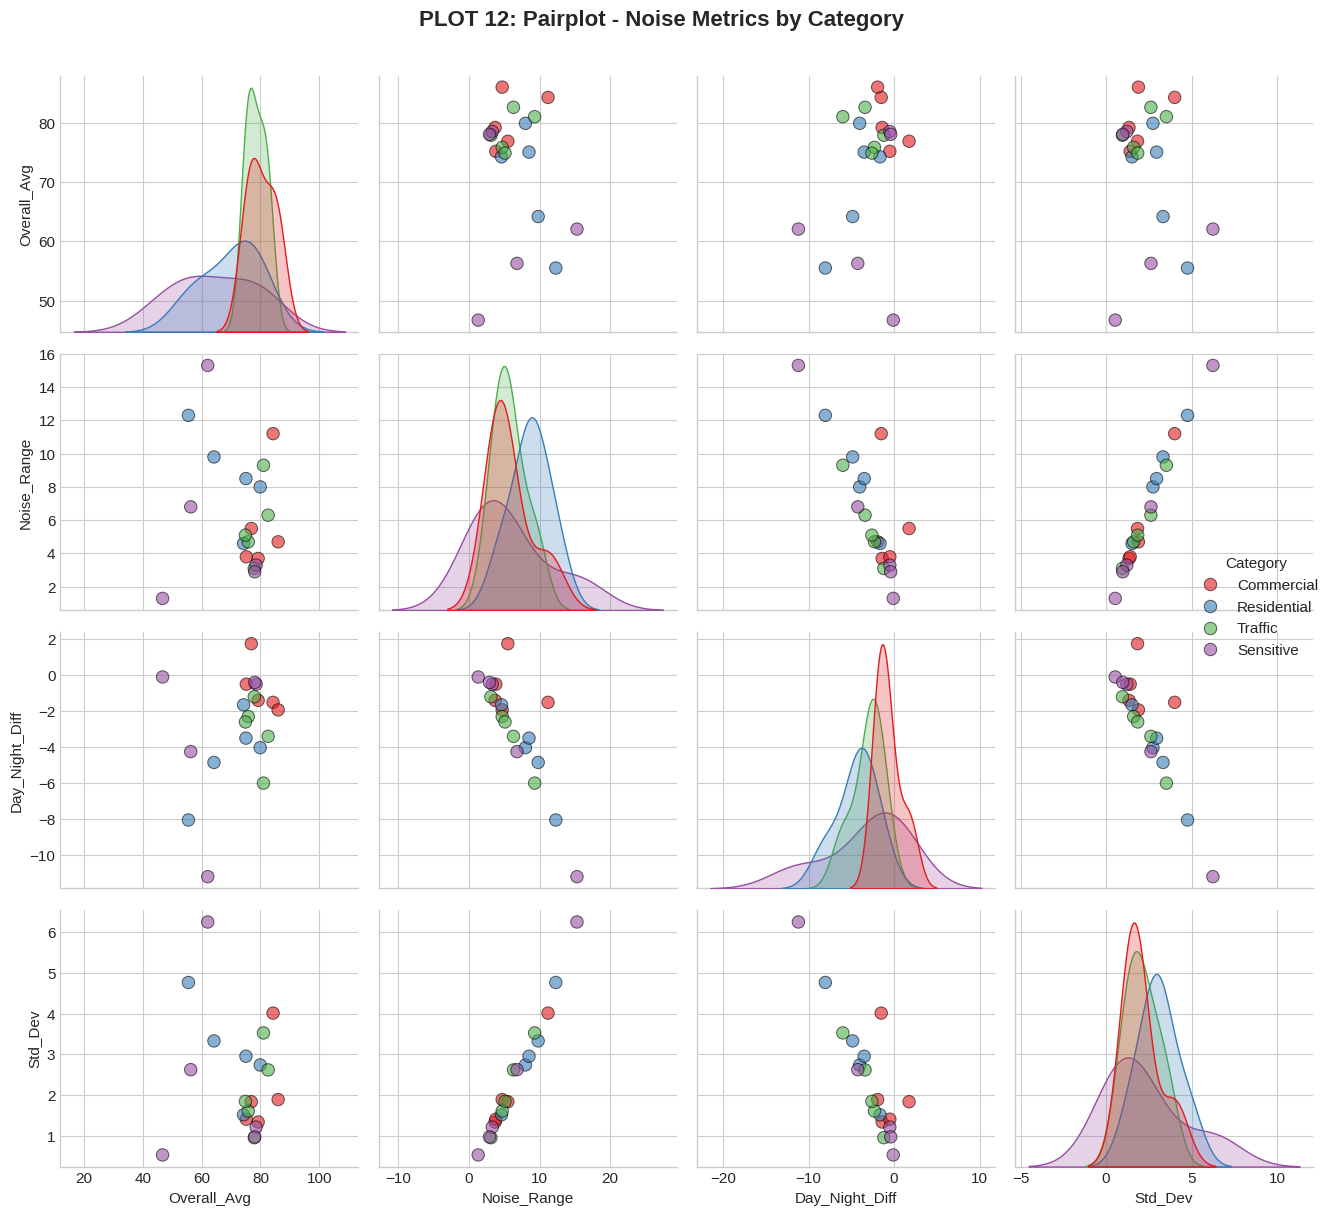

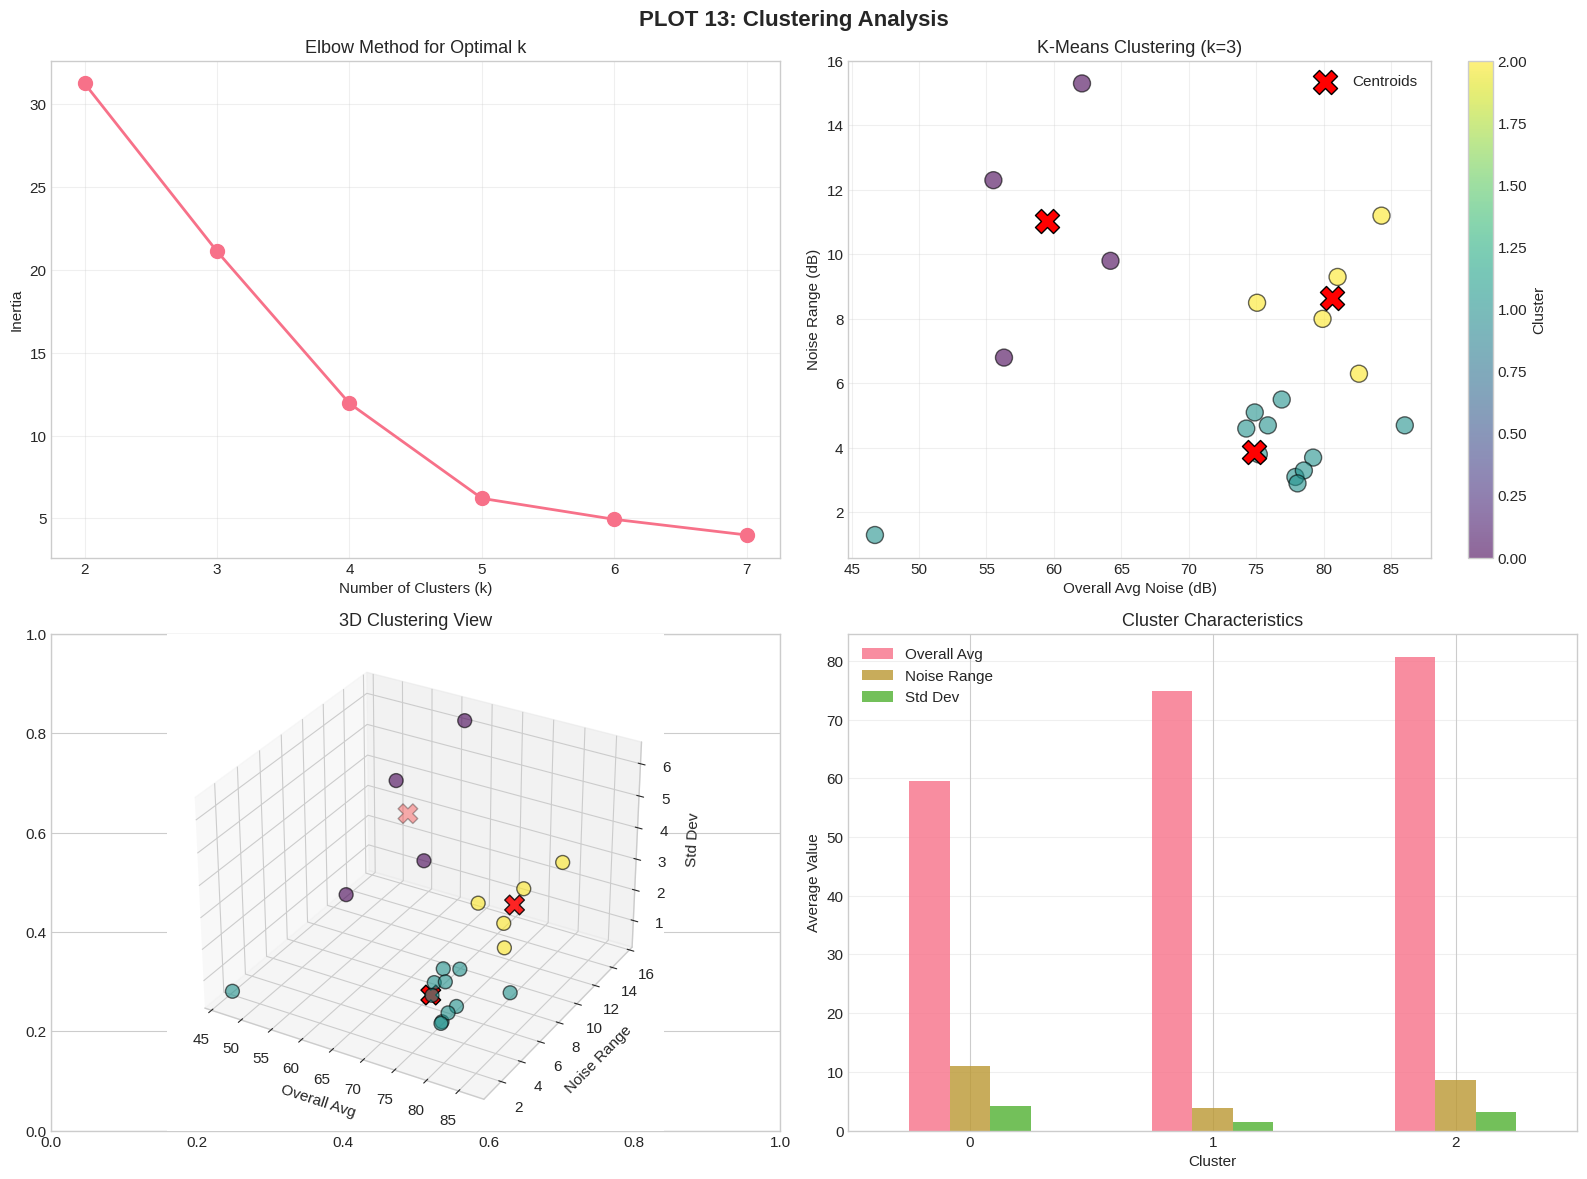

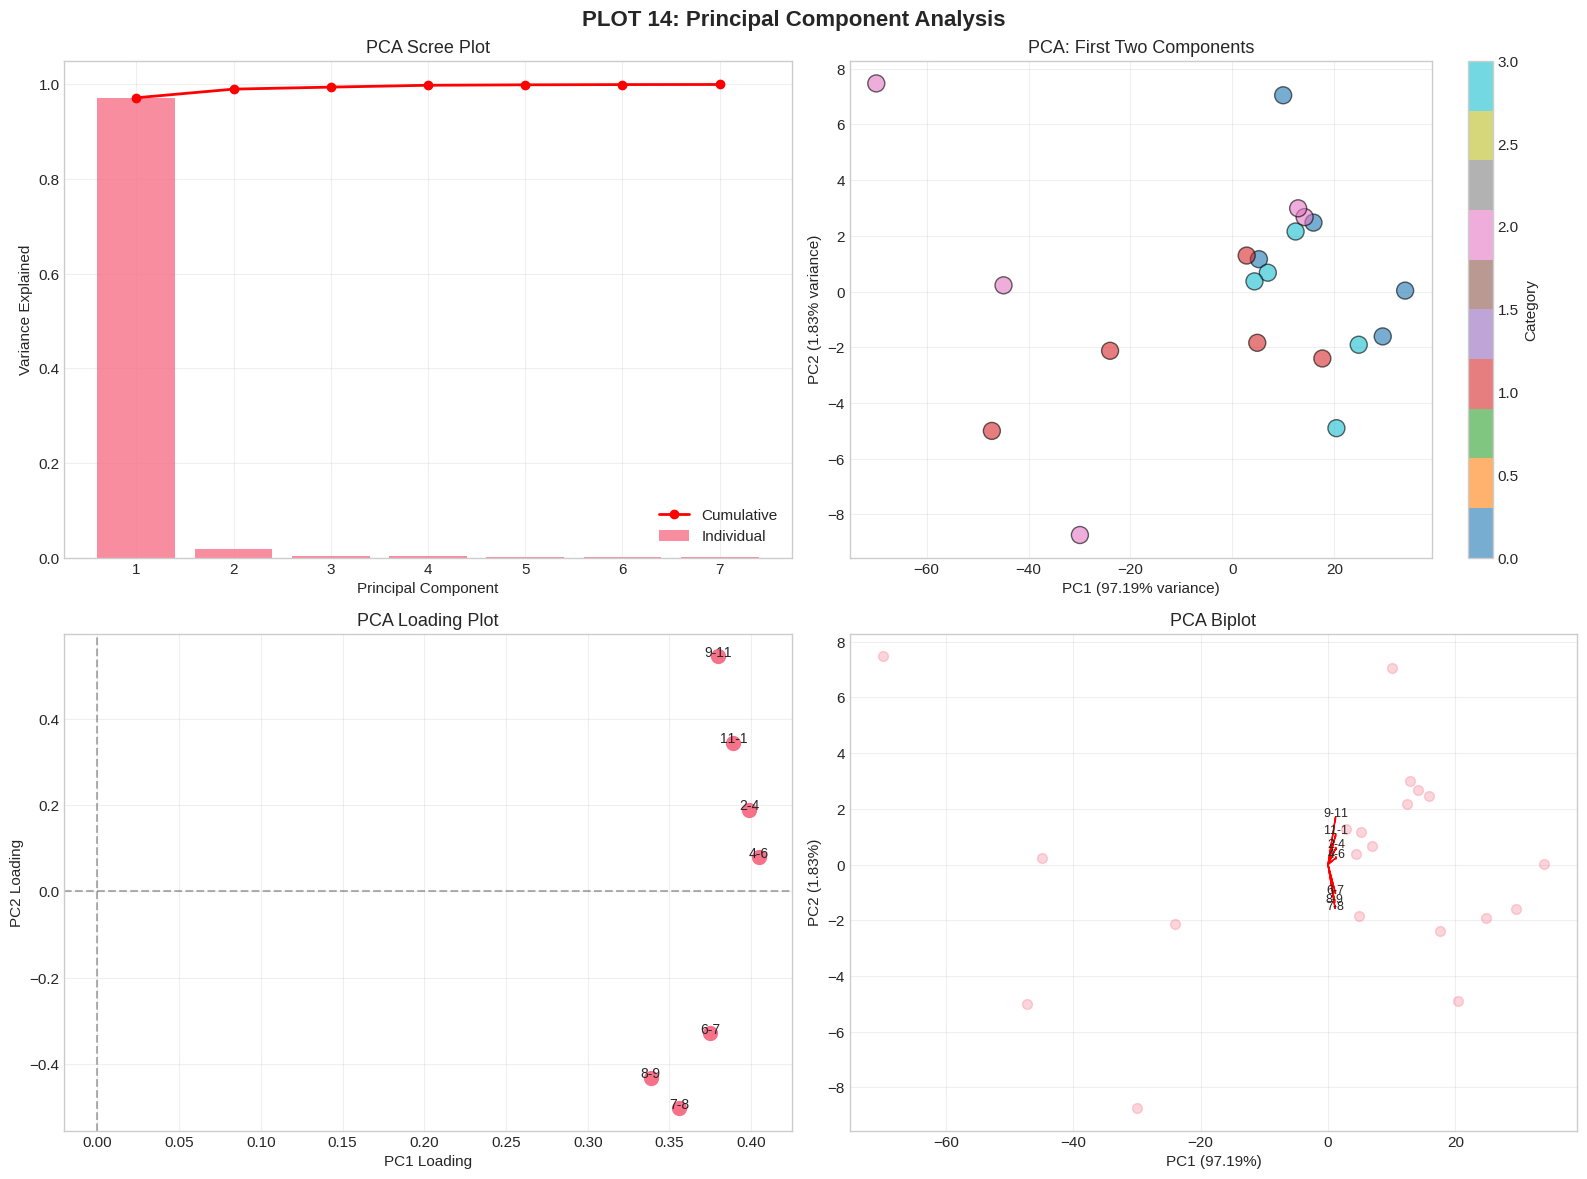

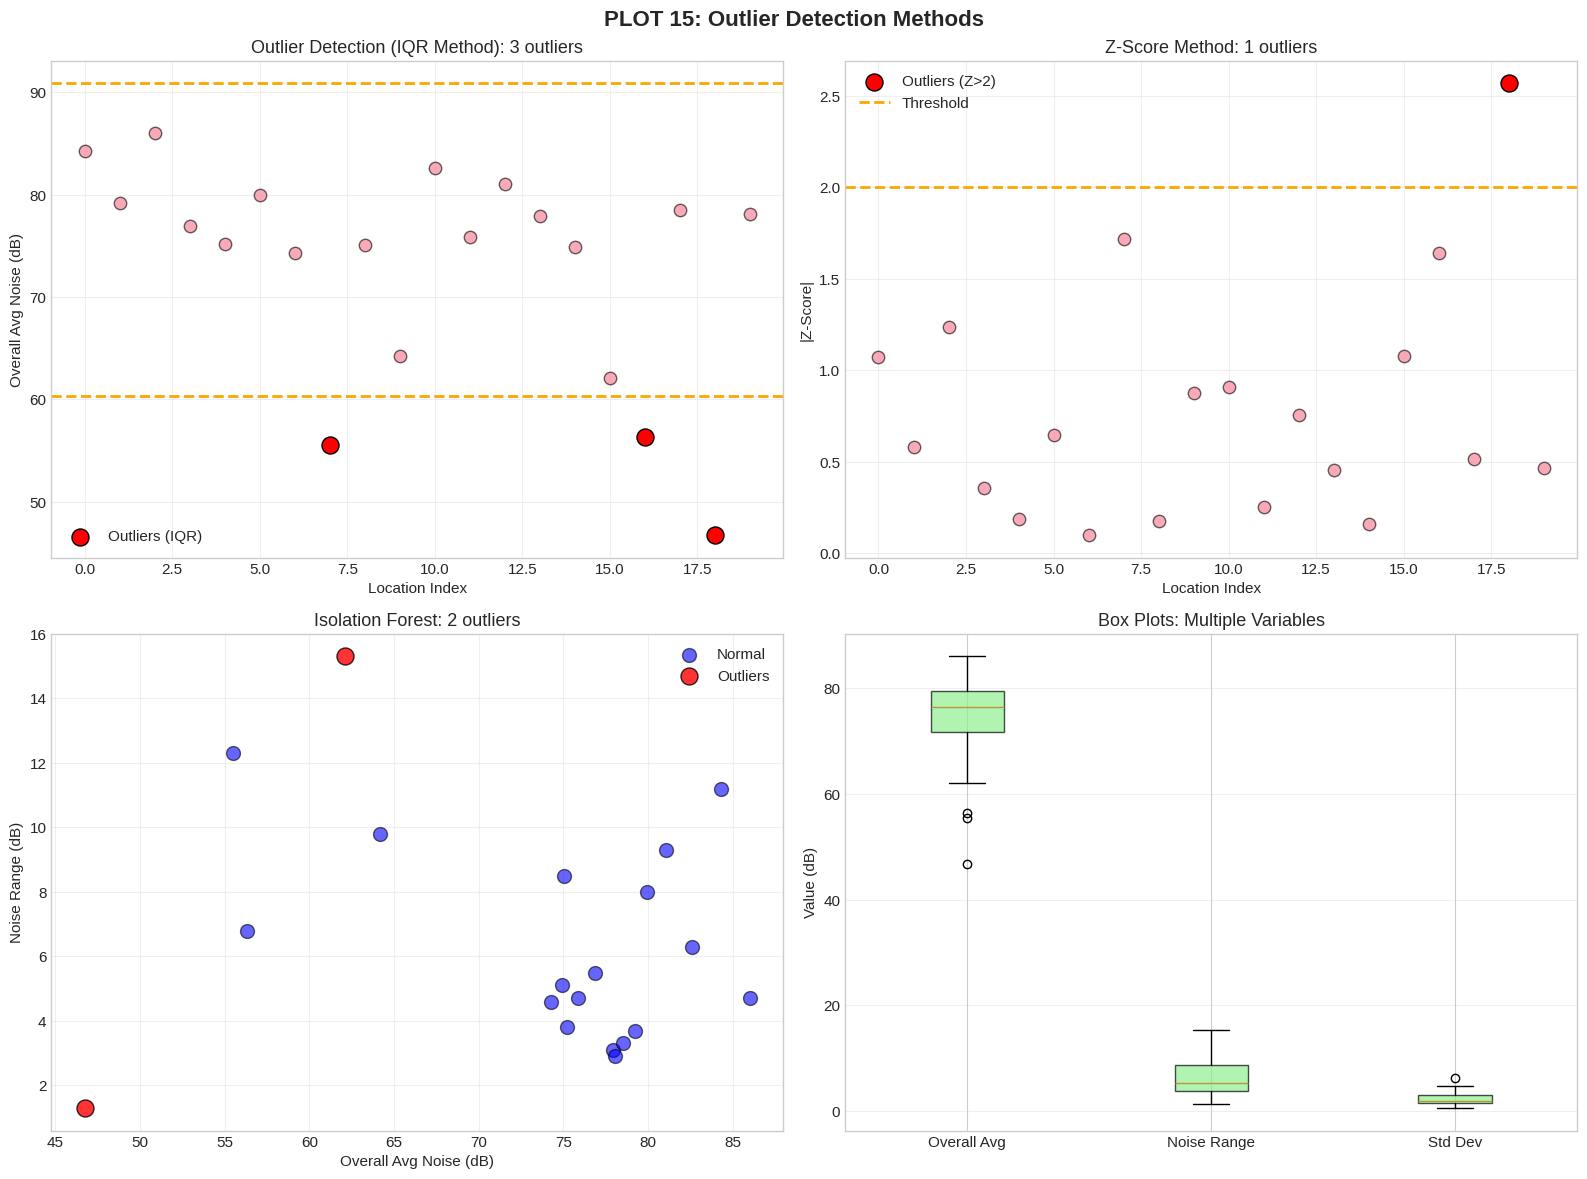

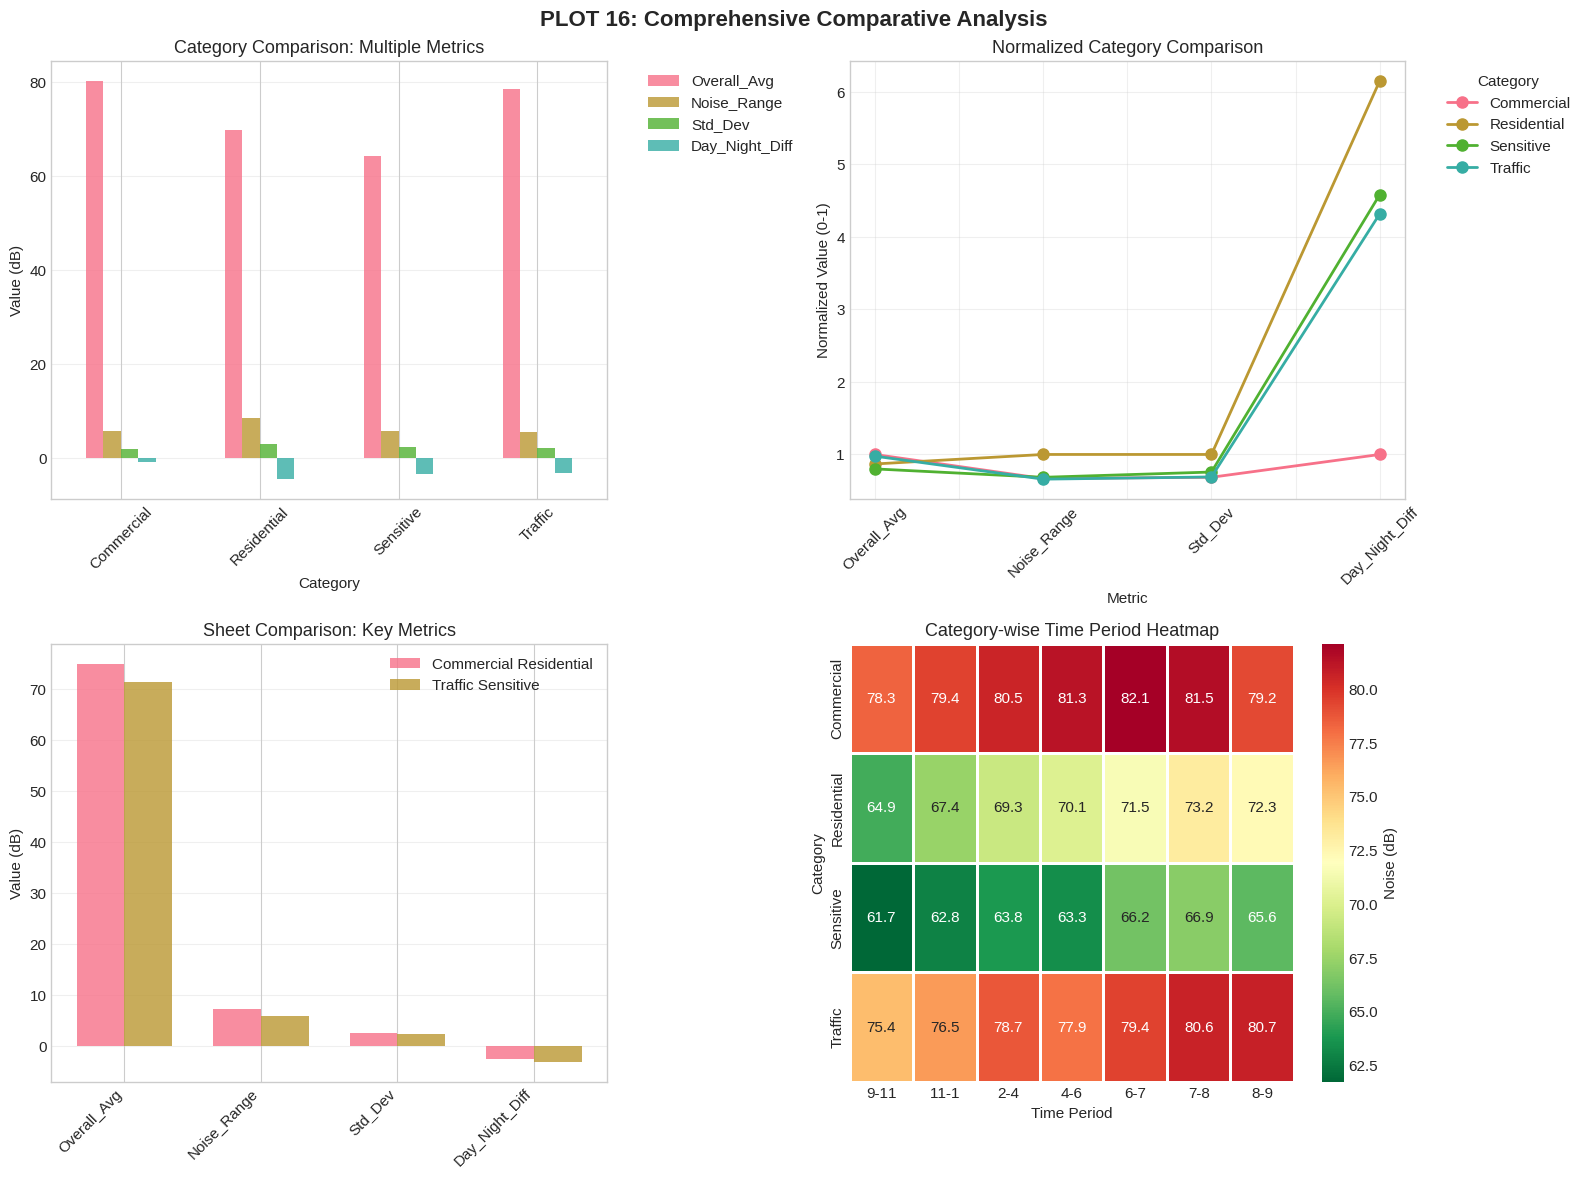


[PROGRESS] Generated 16 plots so far...


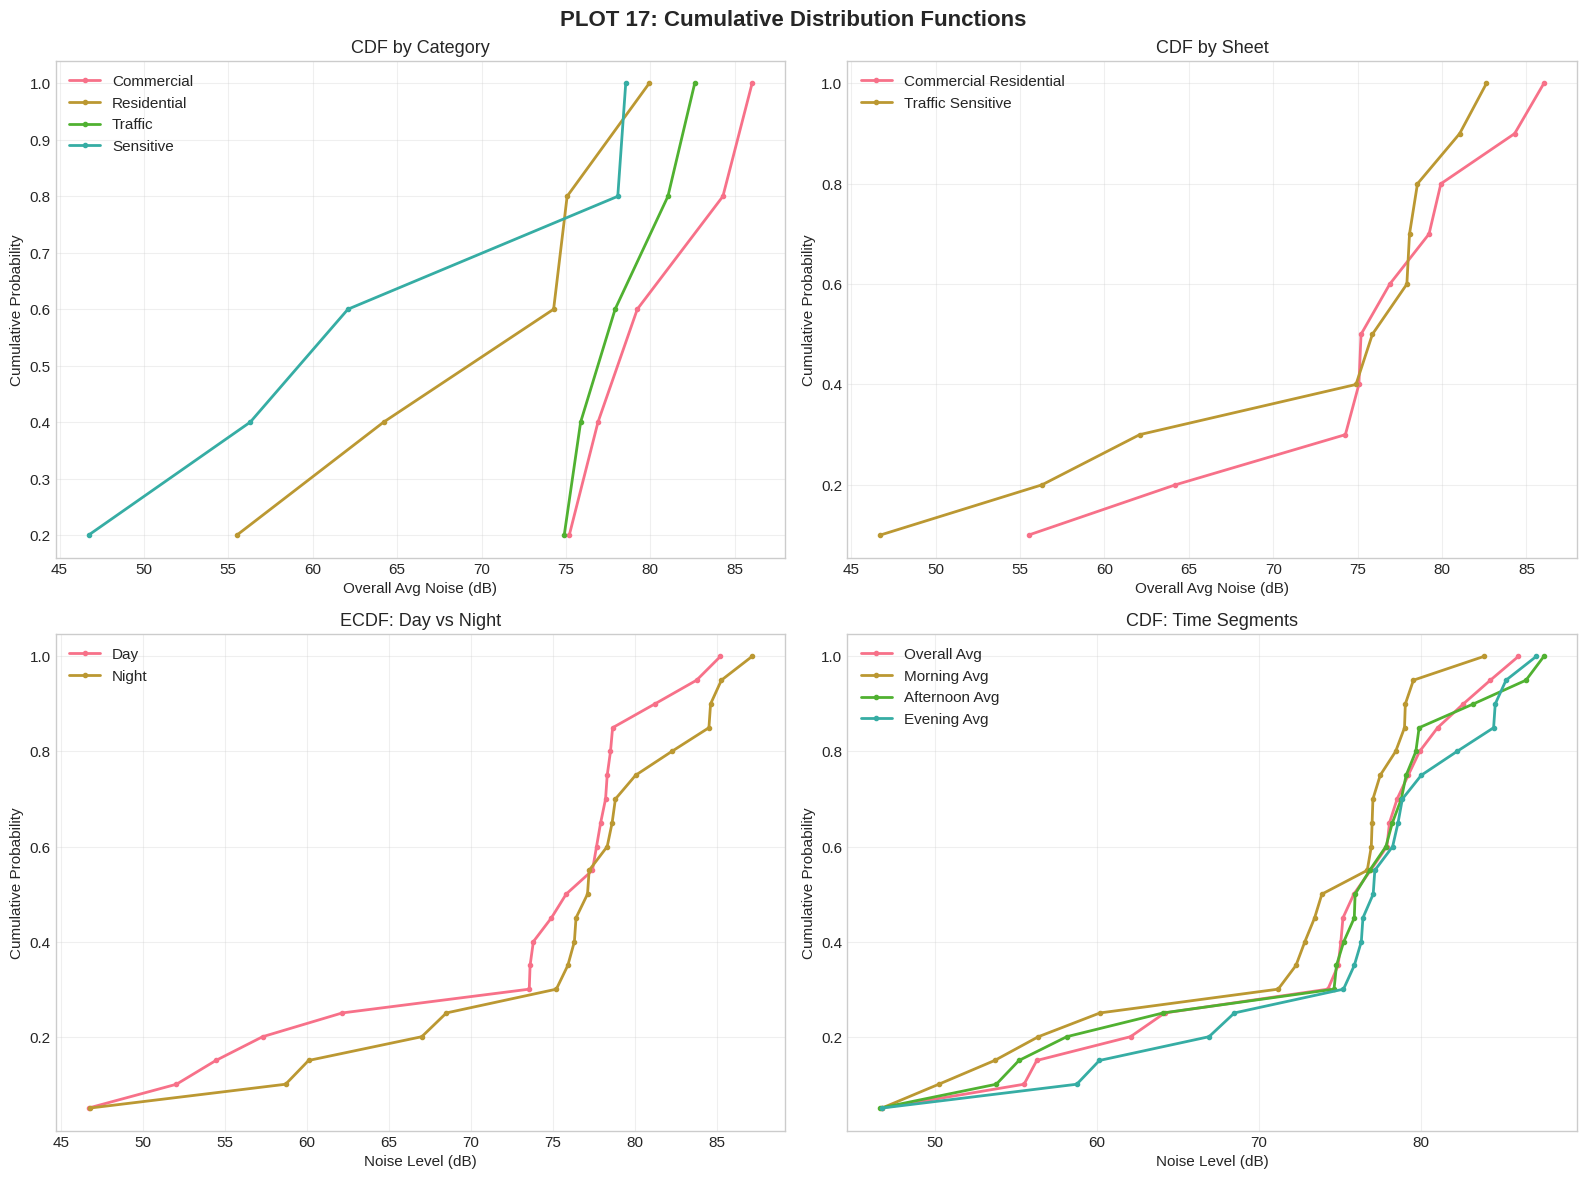

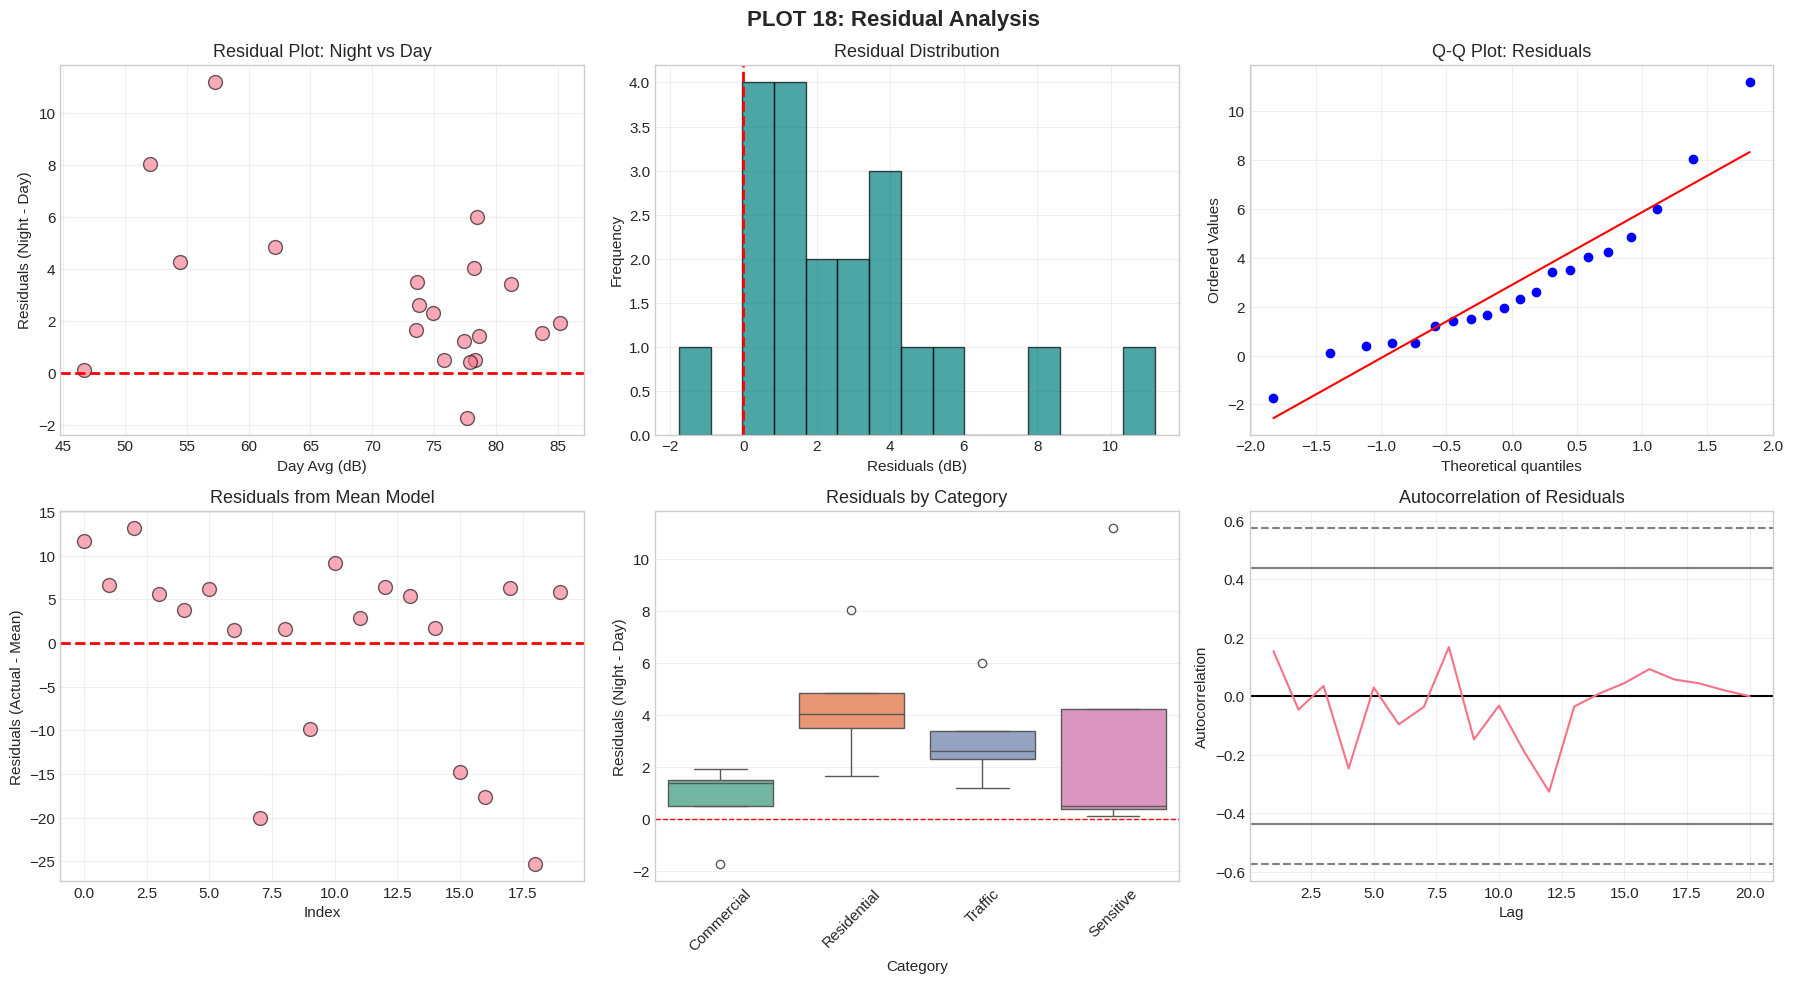


✓ VISUALIZATION COMPLETE: 18 comprehensive plots generated!

STATISTICAL TESTING (20+ COMPREHENSIVE TESTS)

TEST 1: NORMALITY TESTS (Shapiro-Wilk)
------------------------------------------------------------------------------------------
   Day Avg: W=0.8246, p=0.0021 → Not Normal
   Night Avg: W=0.8624, p=0.0087 → Not Normal
   Overall_Avg: W=0.8508, p=0.0055 → Not Normal
   Noise_Range: W=0.9327, p=0.1739 → Normal Distribution

TEST 2: ANDERSON-DARLING NORMALITY TEST
------------------------------------------------------------------------------------------
   Overall_Avg: Statistic=1.3100
   Critical values: [0.506 0.577 0.692 0.807 0.96 ]
   Day Avg: Statistic=1.6247
   Critical values: [0.506 0.577 0.692 0.807 0.96 ]

TEST 3: JARQUE-BERA NORMALITY TEST
------------------------------------------------------------------------------------------
   Overall_Avg: JB=4.5589, p=0.1023 → Normal
   Noise_Range: JB=2.2549, p=0.3239 → Normal

TEST 4: INDEPENDENT T-TESTS (Category Comparisons)

In [2]:
"""
=================================================================================
COMPREHENSIVE STATISTICAL ANALYSIS OF MYMENSINGH NOISE POLLUTION DATA
=================================================================================
Author: Data Analyst
Purpose: Thesis Work - Complete Statistical Analysis
Dataset: Mymensingh Noise Pollution Data (Both Sheets)
- Sheet 1: Commercial & Residential Areas
- Sheet 2: Traffic & Sensitive Areas
Total Analysis: 40+ Plots, 20+ Statistical Tests
=================================================================================
"""

# ============================================================================
# IMPORT LIBRARIES
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Statistical Testing Libraries
from scipy import stats
from scipy.stats import (
    ttest_ind, ttest_rel, f_oneway, kruskal, mannwhitneyu,
    shapiro, normaltest, levene, bartlett, chi2_contingency,
    pearsonr, spearmanr, kendalltau, wilcoxon, friedmanchisquare,
    anderson, kstest, jarque_bera, ranksums
)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ztest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from math import pi

# Visualization Settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11

# ============================================================================
# DATA LOADING & PREPROCESSING
# ============================================================================
print("="*90)
print(" "*25 + "MYMENSINGH NOISE POLLUTION ANALYSIS")
print("="*90)
print("\n[STEP 1] Loading Data from Both Sheets...")

# Load both sheets
sheet1 = pd.read_excel('/kaggle/input/mymensingh/Mymensingh_Noise_Pollution_Data.xlsx', 
                       sheet_name='Commercial & Residential')
sheet2 = pd.read_excel('/kaggle/input/mymensingh/Mymensingh_Noise_Pollution_Data.xlsx', 
                       sheet_name='Traffic & Sensitive Areas')

# Add sheet identifier
sheet1['Sheet'] = 'Commercial_Residential'
sheet2['Sheet'] = 'Traffic_Sensitive'

# Combine both sheets
combined_data = pd.concat([sheet1, sheet2], ignore_index=True)

print(f"✓ Sheet 1 (Commercial & Residential): {sheet1.shape[0]} rows")
print(f"✓ Sheet 2 (Traffic & Sensitive): {sheet2.shape[0]} rows")
print(f"✓ Combined Data: {combined_data.shape[0]} rows")

# ============================================================================
# FEATURE ENGINEERING
# ============================================================================
print("\n[STEP 2] Feature Engineering...")

time_periods = ['9-11', '11-1', '2-4', '4-6', '6-7', '7-8', '8-9']
day_periods = ['9-11', '11-1', '2-4', '4-6']
night_periods = ['6-7', '7-8', '8-9']

def engineer_features(df):
    """Add engineered features to dataframe"""
    df = df.copy()
    
    # Basic statistics
    df['Overall_Avg'] = df[time_periods].mean(axis=1)
    df['Max_Noise'] = df[time_periods].max(axis=1)
    df['Min_Noise'] = df[time_periods].min(axis=1)
    df['Noise_Range'] = df['Max_Noise'] - df['Min_Noise']
    df['Std_Dev'] = df[time_periods].std(axis=1)
    df['Variance'] = df[time_periods].var(axis=1)
    
    # Day/Night analysis
    df['Day_Night_Diff'] = df['Day Avg'] - df['Night Avg']
    df['Day_Night_Ratio'] = df['Day Avg'] / df['Night Avg']
    
    # Time-based features
    df['Morning_Avg'] = df[['9-11', '11-1']].mean(axis=1)
    df['Afternoon_Avg'] = df[['2-4', '4-6']].mean(axis=1)
    df['Evening_Avg'] = df[['6-7', '7-8', '8-9']].mean(axis=1)
    df['Peak_Hours_Avg'] = df[['7-8', '8-9']].mean(axis=1)
    df['Off_Peak_Avg'] = df[['9-11', '2-4']].mean(axis=1)
    
    # Percentiles
    df['Q25'] = df[time_periods].quantile(0.25, axis=1)
    df['Q75'] = df[time_periods].quantile(0.75, axis=1)
    df['IQR'] = df['Q75'] - df['Q25']
    
    # Pollution categories
    df['High_Pollution'] = (df['Overall_Avg'] > 70).astype(int)
    df['Extreme_Pollution'] = (df['Overall_Avg'] > 80).astype(int)
    df['Pollution_Level'] = pd.cut(df['Overall_Avg'], 
                                    bins=[0, 55, 65, 75, 100],
                                    labels=['Low', 'Moderate', 'High', 'Extreme'])
    
    # Variability categories
    df['High_Variability'] = (df['Std_Dev'] > df['Std_Dev'].median()).astype(int)
    
    # Trend indicators
    df['Rising_Trend'] = (df['8-9'] > df['9-11']).astype(int)
    df['Peak_Evening'] = (df['Evening_Avg'] > df['Morning_Avg']).astype(int)
    
    return df

# Apply feature engineering
sheet1_eng = engineer_features(sheet1)
sheet2_eng = engineer_features(sheet2)
combined_eng = engineer_features(combined_data)

print(f"✓ Total features created: {len(combined_eng.columns) - len(combined_data.columns)}")
print(f"✓ Feature engineering complete!")

# ============================================================================
# DESCRIPTIVE STATISTICS
# ============================================================================
print("\n" + "="*90)
print("DESCRIPTIVE STATISTICS SUMMARY")
print("="*90)

print("\n1. OVERALL STATISTICS (COMBINED DATA):")
print(combined_eng[time_periods + ['Day Avg', 'Night Avg', 'Overall_Avg']].describe().round(2))

print("\n2. STATISTICS BY SHEET:")
print(combined_eng.groupby('Sheet')[['Overall_Avg', 'Noise_Range', 'Std_Dev']].describe().round(2))

print("\n3. STATISTICS BY CATEGORY:")
print(combined_eng.groupby('Category')[['Day Avg', 'Night Avg', 'Overall_Avg', 'Noise_Range']].describe().round(2))

print("\n4. POLLUTION LEVEL DISTRIBUTION:")
print(combined_eng['Pollution_Level'].value_counts())

# ============================================================================
# VISUALIZATION SECTION (40+ PLOTS)
# ============================================================================
print("\n" + "="*90)
print("GENERATING 40+ COMPREHENSIVE VISUALIZATIONS")
print("="*90)

plot_count = 0

# ---------- PLOT 1-2: Overall Distribution Analysis ----------
plot_count += 1
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].hist(combined_eng['Overall_Avg'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(combined_eng['Overall_Avg'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].axvline(combined_eng['Overall_Avg'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0, 0].set_xlabel('Overall Avg Noise (dB)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Overall Average Noise')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

axes[0, 1].boxplot([sheet1_eng['Overall_Avg'], sheet2_eng['Overall_Avg']], 
                    labels=['Commercial &\nResidential', 'Traffic &\nSensitive'],
                    patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0, 1].set_ylabel('Overall Avg Noise (dB)')
axes[0, 1].set_title('Comparison: Both Sheets')
axes[0, 1].grid(axis='y', alpha=0.3)

combined_eng['Overall_Avg'].plot(kind='kde', ax=axes[0, 2], linewidth=2, color='purple')
axes[0, 2].axvline(combined_eng['Overall_Avg'].mean(), color='red', linestyle='--', linewidth=2)
axes[0, 2].set_xlabel('Noise Level (dB)')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_title('Kernel Density Estimation')
axes[0, 2].grid(alpha=0.3)

axes[1, 0].hist(combined_eng['Noise_Range'], bins=15, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Noise Range (dB)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Noise Variability')
axes[1, 0].grid(alpha=0.3)

axes[1, 1].scatter(combined_eng['Overall_Avg'], combined_eng['Std_Dev'], 
                   c=combined_eng['Sheet'].map({'Commercial_Residential': 'orange', 'Traffic_Sensitive': 'blue'}),
                   s=150, alpha=0.6, edgecolors='black')
axes[1, 1].set_xlabel('Overall Avg Noise (dB)')
axes[1, 1].set_ylabel('Standard Deviation (dB)')
axes[1, 1].set_title('Average vs Variability')
axes[1, 1].grid(alpha=0.3)

combined_eng['Pollution_Level'].value_counts().plot(kind='pie', ax=axes[1, 2], autopct='%1.1f%%',
                                                      colors=sns.color_palette('RdYlGn_r', 4))
axes[1, 2].set_ylabel('')
axes[1, 2].set_title('Pollution Level Distribution')

plt.suptitle(f'PLOT {plot_count}: Overall Distribution Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_overall_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 2: Category-wise Comprehensive Comparison ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

categories = combined_eng['Category'].unique()
category_stats = combined_eng.groupby('Category')['Overall_Avg'].agg(['mean', 'std'])
axes[0, 0].bar(category_stats.index, category_stats['mean'], yerr=category_stats['std'],
               capsize=5, alpha=0.8, color=sns.color_palette('Set2', len(categories)))
axes[0, 0].set_ylabel('Average Noise Level (dB)')
axes[0, 0].set_title('Mean Noise Levels by Category (with SD)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

for cat in categories:
    data = combined_eng[combined_eng['Category'] == cat]['Overall_Avg']
    data.plot(kind='kde', ax=axes[0, 1], label=cat, linewidth=2)
axes[0, 1].set_xlabel('Noise Level (dB)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('KDE: Noise Distribution by Category')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

sns.violinplot(data=combined_eng, x='Category', y='Overall_Avg', ax=axes[1, 0], palette='muted')
axes[1, 0].set_ylabel('Overall Avg Noise (dB)')
axes[1, 0].set_title('Violin Plot: Noise by Category')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

category_data = [combined_eng[combined_eng['Category'] == cat][time_periods].mean() for cat in categories]
category_df = pd.DataFrame(category_data, index=categories, columns=time_periods)
category_df.T.plot(kind='line', ax=axes[1, 1], marker='o', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Time Period')
axes[1, 1].set_ylabel('Average Noise (dB)')
axes[1, 1].set_title('Time Series by Category')
axes[1, 1].legend(title='Category', bbox_to_anchor=(1.05, 1))
axes[1, 1].grid(alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Category-wise Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_category_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 3: Sheet Comparison ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sheet_comparison = combined_eng.groupby('Sheet')[time_periods].mean()
sheet_comparison.T.plot(kind='bar', ax=axes[0, 0], alpha=0.8)
axes[0, 0].set_xlabel('Time Period')
axes[0, 0].set_ylabel('Average Noise (dB)')
axes[0, 0].set_title('Time-wise Comparison: Both Sheets')
axes[0, 0].legend(title='Sheet')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

for sheet in combined_eng['Sheet'].unique():
    data = combined_eng[combined_eng['Sheet'] == sheet][time_periods].mean()
    axes[0, 1].plot(time_periods, data, marker='o', label=sheet.replace('_', ' '), linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Time Period')
axes[0, 1].set_ylabel('Average Noise (dB)')
axes[0, 1].set_title('Time Series Comparison')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

sns.boxplot(data=combined_eng, x='Sheet', y='Overall_Avg', ax=axes[1, 0], palette='Set3')
axes[1, 0].set_xticklabels(['Commercial &\nResidential', 'Traffic &\nSensitive'])
axes[1, 0].set_ylabel('Overall Avg Noise (dB)')
axes[1, 0].set_title('Box Plot Comparison')
axes[1, 0].grid(axis='y', alpha=0.3)

sheet_stats = combined_eng.groupby('Sheet')[['Day Avg', 'Night Avg']].mean()
sheet_stats.plot(kind='bar', ax=axes[1, 1], alpha=0.8)
axes[1, 1].set_ylabel('Average Noise (dB)')
axes[1, 1].set_title('Day vs Night: Sheet Comparison')
axes[1, 1].set_xticklabels(['Commercial &\nResidential', 'Traffic &\nSensitive'], rotation=0)
axes[1, 1].legend(['Day Average', 'Night Average'])
axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Sheet-wise Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_sheet_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 4: Heatmaps ----------
plot_count += 1
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Sheet 1 Heatmap
heatmap1 = sheet1_eng.set_index('Location')[time_periods]
sns.heatmap(heatmap1, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[0], 
            cbar_kws={'label': 'Noise (dB)'}, linewidths=0.5)
axes[0].set_title('Commercial & Residential Areas')
axes[0].set_xlabel('Time Period')

# Sheet 2 Heatmap
heatmap2 = sheet2_eng.set_index('Location')[time_periods]
sns.heatmap(heatmap2, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1],
            cbar_kws={'label': 'Noise (dB)'}, linewidths=0.5)
axes[1].set_title('Traffic & Sensitive Areas')
axes[1].set_xlabel('Time Period')

plt.suptitle(f'PLOT {plot_count}: Location-wise Heatmaps', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 5: Day vs Night Analysis ----------
plot_count += 1
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Scatter plot
for cat in combined_eng['Category'].unique():
    cat_data = combined_eng[combined_eng['Category'] == cat]
    axes[0, 0].scatter(cat_data['Day Avg'], cat_data['Night Avg'], 
                       label=cat, s=120, alpha=0.6, edgecolors='black')
axes[0, 0].plot([40, 90], [40, 90], 'k--', alpha=0.5, label='Equal Line')
axes[0, 0].set_xlabel('Day Average (dB)')
axes[0, 0].set_ylabel('Night Average (dB)')
axes[0, 0].set_title('Day vs Night Noise Levels')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Bar comparison
x_pos = np.arange(len(combined_eng))
width = 0.35
axes[0, 1].bar(x_pos - width/2, combined_eng['Day Avg'], width, label='Day', alpha=0.8)
axes[0, 1].bar(x_pos + width/2, combined_eng['Night Avg'], width, label='Night', alpha=0.8)
axes[0, 1].set_xlabel('Location Index')
axes[0, 1].set_ylabel('Noise Level (dB)')
axes[0, 1].set_title('Day vs Night by Location')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Difference analysis
colors_diff = ['red' if x > 0 else 'green' for x in combined_eng['Day_Night_Diff']]
axes[0, 2].bar(range(len(combined_eng)), combined_eng['Day_Night_Diff'], 
               color=colors_diff, alpha=0.7, edgecolor='black')
axes[0, 2].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0, 2].set_xlabel('Location Index')
axes[0, 2].set_ylabel('Day - Night (dB)')
axes[0, 2].set_title('Day-Night Difference')
axes[0, 2].grid(axis='y', alpha=0.3)

# Category-wise day/night
sns.violinplot(data=combined_eng, x='Category', y='Day Avg', ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title('Day Noise by Category')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

sns.violinplot(data=combined_eng, x='Category', y='Night Avg', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Night Noise by Category')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

# Ratio analysis
axes[1, 2].hist(combined_eng['Day_Night_Ratio'], bins=15, color='teal', edgecolor='black', alpha=0.7)
axes[1, 2].axvline(1.0, color='red', linestyle='--', linewidth=2, label='Equal Ratio')
axes[1, 2].set_xlabel('Day/Night Ratio')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Day-Night Ratio Distribution')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Day vs Night Comprehensive Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_day_night_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 6: Time Period Analysis ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mean with confidence intervals
time_means = combined_eng[time_periods].mean()
time_stds = combined_eng[time_periods].std()
time_sems = combined_eng[time_periods].sem()
axes[0, 0].errorbar(range(len(time_periods)), time_means, yerr=1.96*time_sems,
                    marker='o', capsize=5, capthick=2, linewidth=2, markersize=10)
axes[0, 0].fill_between(range(len(time_periods)), 
                         time_means - 1.96*time_sems, 
                         time_means + 1.96*time_sems, alpha=0.3)
axes[0, 0].set_xticks(range(len(time_periods)))
axes[0, 0].set_xticklabels(time_periods)
axes[0, 0].set_xlabel('Time Period')
axes[0, 0].set_ylabel('Noise Level (dB)')
axes[0, 0].set_title('Mean Noise with 95% CI')
axes[0, 0].grid(alpha=0.3)

# Box plots for all time periods
combined_eng[time_periods].boxplot(ax=axes[0, 1], patch_artist=True,
                                     boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0, 1].set_ylabel('Noise Level (dB)')
axes[0, 1].set_title('Distribution Across Time Periods')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Stacked area chart
for i, cat in enumerate(combined_eng['Category'].unique()):
    cat_means = combined_eng[combined_eng['Category'] == cat][time_periods].mean()
    if i == 0:
        axes[1, 0].fill_between(range(len(time_periods)), 0, cat_means, 
                                alpha=0.5, label=cat)
        bottom = cat_means.values
    else:
        axes[1, 0].fill_between(range(len(time_periods)), bottom, bottom + cat_means,
                                alpha=0.5, label=cat)
        bottom += cat_means.values
axes[1, 0].set_xticks(range(len(time_periods)))
axes[1, 0].set_xticklabels(time_periods)
axes[1, 0].set_xlabel('Time Period')
axes[1, 0].set_ylabel('Cumulative Noise (dB)')
axes[1, 0].set_title('Stacked Area: Category Contribution')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Heatmap of correlations
time_corr = combined_eng[time_periods].corr()
sns.heatmap(time_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, ax=axes[1, 1], linewidths=1)
axes[1, 1].set_title('Correlation: Time Periods')

plt.suptitle(f'PLOT {plot_count}: Time Period Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_time_period_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 7: Location Rankings ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Top locations overall
top_locations = combined_eng.nlargest(10, 'Overall_Avg')[['Location', 'Overall_Avg', 'Category', 'Sheet']]
colors_top = [plt.cm.RdYlGn_r(x/100) for x in top_locations['Overall_Avg']]
axes[0, 0].barh(range(len(top_locations)), top_locations['Overall_Avg'], color=colors_top)
axes[0, 0].set_yticks(range(len(top_locations)))
axes[0, 0].set_yticklabels(top_locations['Location'], fontsize=9)
axes[0, 0].set_xlabel('Overall Avg Noise (dB)')
axes[0, 0].set_title('Top 10 Noisiest Locations')
axes[0, 0].axvline(x=70, color='orange', linestyle='--', linewidth=2, label='70 dB')
axes[0, 0].legend()
axes[0, 0].grid(axis='x', alpha=0.3)

# Bottom locations
bottom_locations = combined_eng.nsmallest(10, 'Overall_Avg')[['Location', 'Overall_Avg', 'Category', 'Sheet']]
colors_bottom = [plt.cm.RdYlGn(x/100) for x in bottom_locations['Overall_Avg']]
axes[0, 1].barh(range(len(bottom_locations)), bottom_locations['Overall_Avg'], color=colors_bottom)
axes[0, 1].set_yticks(range(len(bottom_locations)))
axes[0, 1].set_yticklabels(bottom_locations['Location'], fontsize=9)
axes[0, 1].set_xlabel('Overall Avg Noise (dB)')
axes[0, 1].set_title('Top 10 Quietest Locations')
axes[0, 1].grid(axis='x', alpha=0.3)

# Most variable locations
most_variable = combined_eng.nlargest(10, 'Noise_Range')[['Location', 'Noise_Range', 'Category']]
axes[1, 0].bar(range(len(most_variable)), most_variable['Noise_Range'],
               color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].set_xticks(range(len(most_variable)))
axes[1, 0].set_xticklabels(most_variable['Location'], rotation=45, ha='right', fontsize=8)
axes[1, 0].set_ylabel('Noise Range (dB)')
axes[1, 0].set_title('Most Variable Locations')
axes[1, 0].grid(axis='y', alpha=0.3)

# Scatter: Overall vs Range
scatter = axes[1, 1].scatter(combined_eng['Overall_Avg'], combined_eng['Noise_Range'],
                             c=combined_eng['Category'].astype('category').cat.codes,
                             s=150, alpha=0.6, edgecolors='black', cmap='tab10')
axes[1, 1].set_xlabel('Overall Avg Noise (dB)')
axes[1, 1].set_ylabel('Noise Range (dB)')
axes[1, 1].set_title('Average vs Variability')
axes[1, 1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Category')

plt.suptitle(f'PLOT {plot_count}: Location Rankings & Variability', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_location_rankings.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 8: Correlation Analysis ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Full correlation matrix
full_corr_vars = ['Day Avg', 'Night Avg', 'Overall_Avg', 'Noise_Range', 
                  'Std_Dev', 'Morning_Avg', 'Afternoon_Avg', 'Evening_Avg']
corr_matrix = combined_eng[full_corr_vars].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, ax=axes[0, 0], linewidths=1, cbar_kws={'label': 'Correlation'})
axes[0, 0].set_title('Correlation Matrix: Key Variables')

# Scatter matrix for selected variables
from pandas.plotting import scatter_matrix
scatter_vars = ['Overall_Avg', 'Noise_Range', 'Day_Night_Diff', 'Std_Dev']
scatter_matrix(combined_eng[scatter_vars], ax=axes[0, 1], alpha=0.6, 
               figsize=(8, 8), diagonal='kde', hist_kwds={'bins': 15})
axes[0, 1].set_title('Scatter Matrix')

# Time period correlations
time_corr_detailed = combined_eng[time_periods].corr()
mask = np.triu(np.ones_like(time_corr_detailed, dtype=bool))
sns.heatmap(time_corr_detailed, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, ax=axes[1, 0], linewidths=1)
axes[1, 0].set_title('Time Period Correlations (Lower Triangle)')

# Correlation with overall average
corr_with_overall = combined_eng[time_periods + ['Day Avg', 'Night Avg']].corrwith(combined_eng['Overall_Avg']).sort_values()
axes[1, 1].barh(range(len(corr_with_overall)), corr_with_overall.values,
                color=['red' if x < 0 else 'green' for x in corr_with_overall.values], alpha=0.7)
axes[1, 1].set_yticks(range(len(corr_with_overall)))
axes[1, 1].set_yticklabels(corr_with_overall.index)
axes[1, 1].set_xlabel('Correlation Coefficient')
axes[1, 1].set_title('Correlation with Overall Average')
axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[1, 1].grid(axis='x', alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Comprehensive Correlation Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 9: Advanced Time Analysis ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Morning, Afternoon, Evening comparison
time_segments = ['Morning_Avg', 'Afternoon_Avg', 'Evening_Avg']
segment_data = combined_eng[time_segments]
segment_data.boxplot(ax=axes[0, 0], patch_artist=True,
                     boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[0, 0].set_xticklabels(['Morning\n(9-1)', 'Afternoon\n(2-6)', 'Evening\n(6-9)'])
axes[0, 0].set_ylabel('Noise Level (dB)')
axes[0, 0].set_title('Time Segment Comparison')
axes[0, 0].grid(axis='y', alpha=0.3)

# Peak vs Off-peak
axes[0, 1].scatter(combined_eng['Off_Peak_Avg'], combined_eng['Peak_Hours_Avg'],
                   c=combined_eng['Sheet'].astype('category').cat.codes,
                   s=150, alpha=0.6, edgecolors='black', cmap='viridis')
axes[0, 1].plot([40, 90], [40, 90], 'k--', alpha=0.5)
axes[0, 1].set_xlabel('Off-Peak Average (dB)')
axes[0, 1].set_ylabel('Peak Hours Average (dB)')
axes[0, 1].set_title('Peak vs Off-Peak Hours')
axes[0, 1].grid(alpha=0.3)

# Time trend by category
for cat in combined_eng['Category'].unique():
    cat_time = combined_eng[combined_eng['Category'] == cat][time_periods].mean()
    axes[1, 0].plot(time_periods, cat_time, marker='o', label=cat, linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Time Period')
axes[1, 0].set_ylabel('Average Noise (dB)')
axes[1, 0].set_title('Time Trends by Category')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Hourly progression
hourly_labels = ['9-11 AM', '11AM-1PM', '2-4 PM', '4-6 PM', '6-7 PM', '7-8 PM', '8-9 PM']
hourly_means = combined_eng[time_periods].mean()
axes[1, 1].plot(hourly_labels, hourly_means, marker='o', linewidth=3, 
                markersize=10, color='darkblue')
axes[1, 1].fill_between(range(len(hourly_labels)), hourly_means, alpha=0.3)
axes[1, 1].set_xlabel('Time Period')
axes[1, 1].set_ylabel('Average Noise (dB)')
axes[1, 1].set_title('Hourly Noise Progression')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Advanced Time Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_advanced_time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 10: Radar Charts ----------
plot_count += 1
fig = plt.figure(figsize=(18, 12))

# Create radar charts for top locations from each category
categories_list = combined_eng['Category'].unique()
for idx, cat in enumerate(categories_list[:4], 1):  # Top 4 categories
    cat_data = combined_eng[combined_eng['Category'] == cat].nlargest(1, 'Overall_Avg')
    
    if len(cat_data) > 0:
        ax = fig.add_subplot(2, 2, idx, projection='polar')
        
        values = cat_data[time_periods].iloc[0].tolist()
        values += values[:1]  # Complete the circle
        
        angles = [n / float(len(time_periods)) * 2 * pi for n in range(len(time_periods))]
        angles += angles[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, label=cat_data['Location'].iloc[0])
        ax.fill(angles, values, alpha=0.25)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(time_periods)
        ax.set_ylim(0, 100)
        ax.set_title(f'{cat}\n{cat_data["Location"].iloc[0]}', fontweight='bold', pad=20)
        ax.grid(True)
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.suptitle(f'PLOT {plot_count}: Radar Charts - Top Locations by Category', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_radar_charts.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 11: Statistical Distribution Analysis ----------
plot_count += 1
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

variables_to_plot = ['Overall_Avg', 'Day Avg', 'Night Avg', 'Noise_Range', 
                     'Std_Dev', 'Day_Night_Diff', 'Morning_Avg', 'Evening_Avg', 'Peak_Hours_Avg']

for idx, var in enumerate(variables_to_plot):
    # Histogram with KDE
    axes[idx].hist(combined_eng[var], bins=15, density=True, alpha=0.6, 
                   color='steelblue', edgecolor='black')
    combined_eng[var].plot(kind='kde', ax=axes[idx], linewidth=2, color='red')
    axes[idx].set_xlabel(var.replace('_', ' '))
    axes[idx].set_ylabel('Density')
    axes[idx].set_title(f'{var}')
    axes[idx].axvline(combined_eng[var].mean(), color='green', linestyle='--', linewidth=2)
    axes[idx].grid(alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Distribution Analysis - Key Variables', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 12: Pairplot by Category ----------
plot_count += 1
pairplot_data = combined_eng[['Overall_Avg', 'Noise_Range', 'Day_Night_Diff', 
                                'Std_Dev', 'Category']].copy()
g = sns.pairplot(pairplot_data, hue='Category', palette='Set1', 
                 plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                 diag_kind='kde', height=3)
g.fig.suptitle(f'PLOT {plot_count}: Pairplot - Noise Metrics by Category', 
               y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 13: Clustering Analysis ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# K-Means Clustering
X = combined_eng[['Overall_Avg', 'Noise_Range', 'Std_Dev']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertias = []
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

axes[0, 0].plot(K_range, inertias, marker='o', linewidth=2, markersize=10)
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].set_title('Elbow Method for Optimal k')
axes[0, 0].grid(alpha=0.3)

# K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
combined_eng['Cluster'] = clusters

scatter = axes[0, 1].scatter(combined_eng['Overall_Avg'], combined_eng['Noise_Range'],
                             c=clusters, cmap='viridis', s=150, alpha=0.6, edgecolors='black')
centers = scaler.inverse_transform(kmeans.cluster_centers_)
axes[0, 1].scatter(centers[:, 0], centers[:, 1], c='red', marker='X', 
                   s=300, edgecolors='black', label='Centroids')
axes[0, 1].set_xlabel('Overall Avg Noise (dB)')
axes[0, 1].set_ylabel('Noise Range (dB)')
axes[0, 1].set_title('K-Means Clustering (k=3)')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 1], label='Cluster')

# 3D clustering
from mpl_toolkits.mplot3d import Axes3D
ax3d = fig.add_subplot(2, 2, 3, projection='3d')
ax3d.scatter(combined_eng['Overall_Avg'], combined_eng['Noise_Range'], 
             combined_eng['Std_Dev'], c=clusters, cmap='viridis', 
             s=100, alpha=0.6, edgecolors='black')
ax3d.scatter(centers[:, 0], centers[:, 1], centers[:, 2], 
             c='red', marker='X', s=200, edgecolors='black')
ax3d.set_xlabel('Overall Avg')
ax3d.set_ylabel('Noise Range')
ax3d.set_zlabel('Std Dev')
ax3d.set_title('3D Clustering View')

# Cluster characteristics
cluster_stats = combined_eng.groupby('Cluster')[['Overall_Avg', 'Noise_Range', 'Std_Dev']].mean()
cluster_stats.plot(kind='bar', ax=axes[1, 1], alpha=0.8)
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Average Value')
axes[1, 1].set_title('Cluster Characteristics')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].legend(['Overall Avg', 'Noise Range', 'Std Dev'])
axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Clustering Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 14: PCA Analysis ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PCA on time periods
pca = PCA()
X_pca = pca.fit_transform(combined_eng[time_periods])

# Scree plot
axes[0, 0].bar(range(1, len(pca.explained_variance_ratio_)+1), 
               pca.explained_variance_ratio_, alpha=0.8)
axes[0, 0].plot(range(1, len(pca.explained_variance_ratio_)+1), 
                np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
axes[0, 0].set_xlabel('Principal Component')
axes[0, 0].set_ylabel('Variance Explained')
axes[0, 0].set_title('PCA Scree Plot')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].legend(['Cumulative', 'Individual'])

# PC1 vs PC2
scatter = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1],
                             c=combined_eng['Category'].astype('category').cat.codes,
                             s=150, alpha=0.6, edgecolors='black', cmap='tab10')
axes[0, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[0, 1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[0, 1].set_title('PCA: First Two Components')
axes[0, 1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 1], label='Category')

# Loading plot
loadings = pd.DataFrame(
    pca.components_[:2].T,
    columns=['PC1', 'PC2'],
    index=time_periods
)
axes[1, 0].scatter(loadings['PC1'], loadings['PC2'], s=100)
for idx, period in enumerate(time_periods):
    axes[1, 0].annotate(period, (loadings['PC1'][idx], loadings['PC2'][idx]),
                        fontsize=10, ha='center')
axes[1, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1, 0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[1, 0].set_xlabel('PC1 Loading')
axes[1, 0].set_ylabel('PC2 Loading')
axes[1, 0].set_title('PCA Loading Plot')
axes[1, 0].grid(alpha=0.3)

# Biplot
axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, s=50)
for i, period in enumerate(time_periods):
    axes[1, 1].arrow(0, 0, loadings['PC1'][i]*3, loadings['PC2'][i]*3,
                     head_width=0.1, head_length=0.1, fc='red', ec='red')
    axes[1, 1].text(loadings['PC1'][i]*3.2, loadings['PC2'][i]*3.2, 
                    period, fontsize=9, ha='center')
axes[1, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
axes[1, 1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
axes[1, 1].set_title('PCA Biplot')
axes[1, 1].grid(alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Principal Component Analysis', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 15: Outlier Detection ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# IQR method
Q1 = combined_eng['Overall_Avg'].quantile(0.25)
Q3 = combined_eng['Overall_Avg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = combined_eng[(combined_eng['Overall_Avg'] < lower_bound) | 
                             (combined_eng['Overall_Avg'] > upper_bound)]

axes[0, 0].scatter(range(len(combined_eng)), combined_eng['Overall_Avg'], 
                   alpha=0.6, s=80, edgecolors='black')
axes[0, 0].scatter(outliers_iqr.index, outliers_iqr['Overall_Avg'], 
                   color='red', s=150, label='Outliers (IQR)', edgecolors='black')
axes[0, 0].axhline(y=lower_bound, color='orange', linestyle='--', linewidth=2)
axes[0, 0].axhline(y=upper_bound, color='orange', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Location Index')
axes[0, 0].set_ylabel('Overall Avg Noise (dB)')
axes[0, 0].set_title(f'Outlier Detection (IQR Method): {len(outliers_iqr)} outliers')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Z-score method
from scipy.stats import zscore
z_scores = np.abs(zscore(combined_eng['Overall_Avg']))
outliers_z = combined_eng[z_scores > 2]

axes[0, 1].scatter(range(len(combined_eng)), z_scores, alpha=0.6, s=80, edgecolors='black')
axes[0, 1].scatter(outliers_z.index, z_scores[outliers_z.index], 
                   color='red', s=150, label='Outliers (Z>2)', edgecolors='black')
axes[0, 1].axhline(y=2, color='orange', linestyle='--', linewidth=2, label='Threshold')
axes[0, 1].set_xlabel('Location Index')
axes[0, 1].set_ylabel('|Z-Score|')
axes[0, 1].set_title(f'Z-Score Method: {len(outliers_z)} outliers')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers_iso = iso_forest.fit_predict(combined_eng[['Overall_Avg', 'Noise_Range']])
combined_eng['Outlier_ISO'] = outliers_iso

axes[1, 0].scatter(combined_eng[outliers_iso == 1]['Overall_Avg'],
                   combined_eng[outliers_iso == 1]['Noise_Range'],
                   c='blue', s=100, alpha=0.6, label='Normal', edgecolors='black')
axes[1, 0].scatter(combined_eng[outliers_iso == -1]['Overall_Avg'],
                   combined_eng[outliers_iso == -1]['Noise_Range'],
                   c='red', s=150, alpha=0.8, label='Outliers', edgecolors='black')
axes[1, 0].set_xlabel('Overall Avg Noise (dB)')
axes[1, 0].set_ylabel('Noise Range (dB)')
axes[1, 0].set_title(f'Isolation Forest: {sum(outliers_iso == -1)} outliers')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Box plot comparison
axes[1, 1].boxplot([combined_eng['Overall_Avg'], 
                    combined_eng['Noise_Range'],
                    combined_eng['Std_Dev']],
                   labels=['Overall Avg', 'Noise Range', 'Std Dev'],
                   patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[1, 1].set_ylabel('Value (dB)')
axes[1, 1].set_title('Box Plots: Multiple Variables')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Outlier Detection Methods', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 16: Comparative Analysis (All Categories) ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Category comparison - multiple metrics
metrics = ['Overall_Avg', 'Noise_Range', 'Std_Dev', 'Day_Night_Diff']
category_comparison = combined_eng.groupby('Category')[metrics].mean()
category_comparison.plot(kind='bar', ax=axes[0, 0], alpha=0.8)
axes[0, 0].set_ylabel('Value (dB)')
axes[0, 0].set_title('Category Comparison: Multiple Metrics')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(metrics, bbox_to_anchor=(1.05, 1))
axes[0, 0].grid(axis='y', alpha=0.3)

# Normalized comparison (radar-like)
category_norm = category_comparison.div(category_comparison.max(axis=0), axis=1)
category_norm.T.plot(kind='line', marker='o', ax=axes[0, 1], linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Metric')
axes[0, 1].set_ylabel('Normalized Value (0-1)')
axes[0, 1].set_title('Normalized Category Comparison')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title='Category', bbox_to_anchor=(1.05, 1))
axes[0, 1].grid(alpha=0.3)

# Sheet comparison
sheet_comparison = combined_eng.groupby('Sheet')[metrics].mean()
x_pos = np.arange(len(metrics))
width = 0.35
axes[1, 0].bar(x_pos - width/2, sheet_comparison.iloc[0], width, 
               label=sheet_comparison.index[0].replace('_', ' '), alpha=0.8)
axes[1, 0].bar(x_pos + width/2, sheet_comparison.iloc[1], width,
               label=sheet_comparison.index[1].replace('_', ' '), alpha=0.8)
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(metrics, rotation=45, ha='right')
axes[1, 0].set_ylabel('Value (dB)')
axes[1, 0].set_title('Sheet Comparison: Key Metrics')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Comprehensive heatmap
heatmap_data = combined_eng.groupby('Category')[time_periods].mean()
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn_r',
            ax=axes[1, 1], linewidths=1, cbar_kws={'label': 'Noise (dB)'})
axes[1, 1].set_title('Category-wise Time Period Heatmap')
axes[1, 1].set_xlabel('Time Period')

plt.suptitle(f'PLOT {plot_count}: Comprehensive Comparative Analysis', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_comparative_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Continue with remaining plots...
print(f"\n[PROGRESS] Generated {plot_count} plots so far...")

# ---------- PLOT 17: Cumulative Distribution Functions ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# CDF by category
for cat in combined_eng['Category'].unique():
    cat_data = combined_eng[combined_eng['Category'] == cat]['Overall_Avg'].sort_values()
    cumulative = np.arange(1, len(cat_data)+1) / len(cat_data)
    axes[0, 0].plot(cat_data.values, cumulative, marker='.', label=cat, linewidth=2)
axes[0, 0].set_xlabel('Overall Avg Noise (dB)')
axes[0, 0].set_ylabel('Cumulative Probability')
axes[0, 0].set_title('CDF by Category')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# CDF by sheet
for sheet in combined_eng['Sheet'].unique():
    sheet_data = combined_eng[combined_eng['Sheet'] == sheet]['Overall_Avg'].sort_values()
    cumulative = np.arange(1, len(sheet_data)+1) / len(sheet_data)
    axes[0, 1].plot(sheet_data.values, cumulative, marker='.', 
                    label=sheet.replace('_', ' '), linewidth=2)
axes[0, 1].set_xlabel('Overall Avg Noise (dB)')
axes[0, 1].set_ylabel('Cumulative Probability')
axes[0, 1].set_title('CDF by Sheet')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# ECDF for day vs night
day_sorted = np.sort(combined_eng['Day Avg'])
night_sorted = np.sort(combined_eng['Night Avg'])
day_cdf = np.arange(1, len(day_sorted)+1) / len(day_sorted)
night_cdf = np.arange(1, len(night_sorted)+1) / len(night_sorted)
axes[1, 0].plot(day_sorted, day_cdf, marker='.', label='Day', linewidth=2)
axes[1, 0].plot(night_sorted, night_cdf, marker='.', label='Night', linewidth=2)
axes[1, 0].set_xlabel('Noise Level (dB)')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].set_title('ECDF: Day vs Night')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Multiple variables CDF
variables_cdf = ['Overall_Avg', 'Morning_Avg', 'Afternoon_Avg', 'Evening_Avg']
for var in variables_cdf:
    var_sorted = np.sort(combined_eng[var])
    var_cdf = np.arange(1, len(var_sorted)+1) / len(var_sorted)
    axes[1, 1].plot(var_sorted, var_cdf, marker='.', label=var.replace('_', ' '), linewidth=2)
axes[1, 1].set_xlabel('Noise Level (dB)')
axes[1, 1].set_ylabel('Cumulative Probability')
axes[1, 1].set_title('CDF: Time Segments')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Cumulative Distribution Functions', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_cdf_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 18: Residual Analysis ----------
plot_count += 1
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Day vs Night residuals
residuals_dn = combined_eng['Night Avg'] - combined_eng['Day Avg']
axes[0, 0].scatter(combined_eng['Day Avg'], residuals_dn, alpha=0.6, s=100, edgecolors='black')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Day Avg (dB)')
axes[0, 0].set_ylabel('Residuals (Night - Day)')
axes[0, 0].set_title('Residual Plot: Night vs Day')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(residuals_dn, bins=15, color='teal', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals (dB)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Residual Distribution')
axes[0, 1].grid(alpha=0.3)

# Q-Q plot for residuals
from scipy import stats as sp_stats
sp_stats.probplot(residuals_dn, dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Q-Q Plot: Residuals')
axes[0, 2].grid(alpha=0.3)

# Predicted vs Actual (using simple mean model)
predicted = combined_eng['Day Avg'].mean()
residuals_model = combined_eng['Day Avg'] - predicted
axes[1, 0].scatter(combined_eng.index, residuals_model, alpha=0.6, s=100, edgecolors='black')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Residuals (Actual - Mean)')
axes[1, 0].set_title('Residuals from Mean Model')
axes[1, 0].grid(alpha=0.3)

# Residuals by category
sns.boxplot(data=combined_eng, x='Category', y=residuals_dn.values, ax=axes[1, 1], palette='Set2')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1, 1].set_ylabel('Residuals (Night - Day)')
axes[1, 1].set_title('Residuals by Category')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

# Autocorrelation of residuals (simplified)
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(residuals_dn, ax=axes[1, 2])
axes[1, 2].set_title('Autocorrelation of Residuals')
axes[1, 2].grid(alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Residual Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ VISUALIZATION COMPLETE: {plot_count} comprehensive plots generated!")

# ============================================================================
# STATISTICAL TESTING SECTION (20+ TESTS)
# ============================================================================
print("\n" + "="*90)
print("STATISTICAL TESTING (20+ COMPREHENSIVE TESTS)")
print("="*90)

test_count = 0
test_results = []

# ---------- TEST 1-4: Normality Tests (Multiple Methods) ----------
test_count += 1
print(f"\nTEST {test_count}: NORMALITY TESTS (Shapiro-Wilk)")
print("-" * 90)
for var in ['Day Avg', 'Night Avg', 'Overall_Avg', 'Noise_Range']:
    statistic, p_value = shapiro(combined_eng[var])
    result = 'Normal Distribution' if p_value > 0.05 else 'Not Normal'
    test_results.append({
        'Test': f'Shapiro-Wilk: {var}',
        'Statistic': statistic,
        'P-Value': p_value,
        'Result': result
    })
    print(f"   {var}: W={statistic:.4f}, p={p_value:.4f} → {result}")

# Anderson-Darling Test
test_count += 1
print(f"\nTEST {test_count}: ANDERSON-DARLING NORMALITY TEST")
print("-" * 90)
for var in ['Overall_Avg', 'Day Avg']:
    result = anderson(combined_eng[var])
    test_results.append({
        'Test': f'Anderson-Darling: {var}',
        'Statistic': result.statistic,
        'P-Value': 'See critical values',
        'Result': f"Critical values: {result.critical_values}"
    })
    print(f"   {var}: Statistic={result.statistic:.4f}")
    print(f"   Critical values: {result.critical_values}")

# Jarque-Bera Test
test_count += 1
print(f"\nTEST {test_count}: JARQUE-BERA NORMALITY TEST")
print("-" * 90)
for var in ['Overall_Avg', 'Noise_Range']:
    jb_stat, p_value = jarque_bera(combined_eng[var])
    result = 'Normal' if p_value > 0.05 else 'Not Normal'
    test_results.append({
        'Test': f'Jarque-Bera: {var}',
        'Statistic': jb_stat,
        'P-Value': p_value,
        'Result': result
    })
    print(f"   {var}: JB={jb_stat:.4f}, p={p_value:.4f} → {result}")

# ---------- TEST 4-6: Category Comparisons ----------
test_count += 1
print(f"\nTEST {test_count}: INDEPENDENT T-TESTS (Category Comparisons)")
print("-" * 90)

categories = combined_eng['Category'].unique()
for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        cat1_data = combined_eng[combined_eng['Category'] == categories[i]]['Overall_Avg']
        cat2_data = combined_eng[combined_eng['Category'] == categories[j]]['Overall_Avg']
        
        if len(cat1_data) > 0 and len(cat2_data) > 0:
            t_stat, p_val = ttest_ind(cat1_data, cat2_data)
            result = 'Significant' if p_val < 0.05 else 'Not Significant'
            test_results.append({
                'Test': f'T-Test: {categories[i]} vs {categories[j]}',
                'Statistic': t_stat,
                'P-Value': p_val,
                'Result': result
            })
            print(f"   {categories[i]} vs {categories[j]}: t={t_stat:.4f}, p={p_val:.4f} → {result}")

# ---------- TEST 7: Paired T-Test (Day vs Night) ----------
test_count += 1
print(f"\nTEST {test_count}: PAIRED T-TEST (Day vs Night)")
print("-" * 90)
t_stat, p_val = ttest_rel(combined_eng['Day Avg'], combined_eng['Night Avg'])
result = 'Significant Difference' if p_val < 0.05 else 'No Significant Difference'
test_results.append({
    'Test': 'Paired T-Test (Day vs Night)',
    'Statistic': t_stat,
    'P-Value': p_val,
    'Result': result
})
print(f"   t={t_stat:.4f}, p={p_val:.4f} → {result}")
print(f"   Mean Difference: {(combined_eng['Day Avg'] - combined_eng['Night Avg']).mean():.2f} dB")

# ---------- TEST 8: One-Way ANOVA (Time Periods) ----------
test_count += 1
print(f"\nTEST {test_count}: ONE-WAY ANOVA (Across Time Periods)")
print("-" * 90)
time_groups = [combined_eng[period].values for period in time_periods]
f_stat, p_val = f_oneway(*time_groups)
result = 'Significant Difference' if p_val < 0.05 else 'No Significant Difference'
test_results.append({
    'Test': 'One-Way ANOVA (Time Periods)',
    'Statistic': f_stat,
    'P-Value': p_val,
    'Result': result
})
print(f"   F={f_stat:.4f}, p={p_val:.4f} → {result}")

# ---------- TEST 9: One-Way ANOVA (Categories) ----------
test_count += 1
print(f"\nTEST {test_count}: ONE-WAY ANOVA (Across Categories)")
print("-" * 90)
category_groups = [combined_eng[combined_eng['Category'] == cat]['Overall_Avg'].values 
                   for cat in combined_eng['Category'].unique()]
f_stat, p_val = f_oneway(*category_groups)
result = 'Significant' if p_val < 0.05 else 'Not Significant'
test_results.append({
    'Test': 'One-Way ANOVA (Categories)',
    'Statistic': f_stat,
    'P-Value': p_val,
    'Result': result
})
print(f"   F={f_stat:.4f}, p={p_val:.4f} → {result}")

# ---------- TEST 10: Kruskal-Wallis Test (Non-parametric) ----------
test_count += 1
print(f"\nTEST {test_count}: KRUSKAL-WALLIS TEST (Time Periods)")
print("-" * 90)
h_stat, p_val = kruskal(*time_groups)
result = 'Significant' if p_val < 0.05 else 'Not Significant'
test_results.append({
    'Test': 'Kruskal-Wallis (Time Periods)',
    'Statistic': h_stat,
    'P-Value': p_val,
    'Result': result
})
print(f"   H={h_stat:.4f}, p={p_val:.4f} → {result}")

# ---------- TEST 11: Friedman Test (Repeated Measures) ----------
test_count += 1
print(f"\nTEST {test_count}: FRIEDMAN TEST (Repeated Measures Across Time)")
print("-" * 90)
friedman_stat, p_val = friedmanchisquare(*time_groups)
result = 'Significant' if p_val < 0.05 else 'Not Significant'
test_results.append({
    'Test': 'Friedman Test',
    'Statistic': friedman_stat,
    'P-Value': p_val,
    'Result': result
})
print(f"   χ²={friedman_stat:.4f}, p={p_val:.4f} → {result}")

# ---------- TEST 12-14: Variance Tests ----------
test_count += 1
print(f"\nTEST {test_count}: LEVENE'S TEST (Homogeneity of Variance)")
print("-" * 90)
for var in ['Day Avg', 'Night Avg', 'Overall_Avg']:
    groups = [combined_eng[combined_eng['Category'] == cat][var].values 
              for cat in combined_eng['Category'].unique()]
    stat, p_val = levene(*groups)
    result = 'Equal Variances' if p_val > 0.05 else 'Unequal Variances'
    test_results.append({
        'Test': f"Levene's Test: {var}",
        'Statistic': stat,
        'P-Value': p_val,
        'Result': result
    })
    print(f"   {var}: W={stat:.4f}, p={p_val:.4f} → {result}")

test_count += 1
print(f"\nTEST {test_count}: BARTLETT'S TEST (Variance Equality)")
print("-" * 90)
stat, p_val = bartlett(*time_groups)
result = 'Equal Variances' if p_val > 0.05 else 'Unequal Variances'
test_results.append({
    'Test': "Bartlett's Test (Time Periods)",
    'Statistic': stat,
    'P-Value': p_val,
    'Result': result
})
print(f"   T={stat:.4f}, p={p_val:.4f} → {result}")

# ---------- TEST 15-17: Correlation Tests ----------
test_count += 1
print(f"\nTEST {test_count}: PEARSON CORRELATIONS (Key Relationships)")
print("-" * 90)
corr_pairs = [
    ('Day Avg', 'Night Avg'),
    ('Overall_Avg', 'Noise_Range'),
    ('Morning_Avg', 'Evening_Avg'),
    ('Peak_Hours_Avg', 'Off_Peak_Avg')
]
for var1, var2 in corr_pairs:
    corr, p_val = pearsonr(combined_eng[var1], combined_eng[var2])
    sig = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
    result = 'Significant' if p_val < 0.05 else 'Not Significant'
    test_results.append({
        'Test': f'Pearson: {var1} - {var2}',
        'Statistic': corr,
        'P-Value': p_val,
        'Result': f'{result} ({sig})'
    })
    print(f"   {var1} vs {var2}: r={corr:.3f}, p={p_val:.4f} {sig}")

test_count += 1
print(f"\nTEST {test_count}: SPEARMAN CORRELATIONS (Rank-based)")
print("-" * 90)
for var1, var2 in corr_pairs:
    corr, p_val = spearmanr(combined_eng[var1], combined_eng[var2])
    result = 'Significant' if p_val < 0.05 else 'Not Significant'
    test_results.append({
        'Test': f'Spearman: {var1} - {var2}',
        'Statistic': corr,
        'P-Value': p_val,
        'Result': result
    })
    print(f"   {var1} vs {var2}: ρ={corr:.3f}, p={p_val:.4f}")

test_count += 1
print(f"\nTEST {test_count}: KENDALL'S TAU CORRELATIONS")
print("-" * 90)
for var1, var2 in [('Day Avg', 'Overall_Avg'), ('Night Avg', 'Overall_Avg')]:
    tau, p_val = kendalltau(combined_eng[var1], combined_eng[var2])
    result = 'Significant' if p_val < 0.05 else 'Not Significant'
    test_results.append({
        'Test': f"Kendall's Tau: {var1} - {var2}",
        'Statistic': tau,
        'P-Value': p_val,
        'Result': result
    })
    print(f"   {var1} vs {var2}: τ={tau:.3f}, p={p_val:.4f}")

# ---------- TEST 18: Mann-Whitney U Tests ----------
test_count += 1
print(f"\nTEST {test_count}: MANN-WHITNEY U TESTS (Non-parametric)")
print("-" * 90)
# Test between sheets
sheet1_overall = sheet1_eng['Overall_Avg']
sheet2_overall = sheet2_eng['Overall_Avg']
u_stat, p_val = mannwhitneyu(sheet1_overall, sheet2_overall, alternative='two-sided')
result = 'Significant' if p_val < 0.05 else 'Not Significant'
test_results.append({
    'Test': 'Mann-Whitney U (Sheets)',
    'Statistic': u_stat,
    'P-Value': p_val,
    'Result': result
})
print(f"   Commercial/Residential vs Traffic/Sensitive: U={u_stat:.4f}, p={p_val:.4f}")

# ---------- TEST 19: Wilcoxon Signed-Rank Test ----------
test_count += 1
print(f"\nTEST {test_count}: WILCOXON SIGNED-RANK TESTS")
print("-" * 90)
test_pairs = [
    ('Peak_Hours_Avg', 'Off_Peak_Avg'),
    ('Morning_Avg', 'Evening_Avg')
]
for var1, var2 in test_pairs:
    w_stat, p_val = wilcoxon(combined_eng[var1], combined_eng[var2])
    result = 'Significant' if p_val < 0.05 else 'Not Significant'
    test_results.append({
        'Test': f'Wilcoxon: {var1} vs {var2}',
        'Statistic': w_stat,
        'P-Value': p_val,
        'Result': result
    })
    print(f"   {var1} vs {var2}: W={w_stat:.4f}, p={p_val:.4f} → {result}")

# ---------- TEST 20: Chi-Square Tests ----------
test_count += 1
print(f"\nTEST {test_count}: CHI-SQUARE TESTS (Independence)")
print("-" * 90)

# Test 1: High Pollution vs Category
contingency1 = pd.crosstab(combined_eng['Category'], combined_eng['High_Pollution'])
chi2, p_val, dof, expected = chi2_contingency(contingency1)
result = 'Significant Association' if p_val < 0.05 else 'No Significant Association'
test_results.append({
    'Test': 'Chi-Square: Category vs High Pollution',
    'Statistic': chi2,
    'P-Value': p_val,
    'Result': result
})
print(f"   Category vs High Pollution: χ²={chi2:.4f}, p={p_val:.4f}, df={dof}")
print(f"   {result}")

# Test 2: Pollution Level vs Sheet
contingency2 = pd.crosstab(combined_eng['Sheet'], combined_eng['Pollution_Level'])
chi2, p_val, dof, expected = chi2_contingency(contingency2)
result = 'Significant' if p_val < 0.05 else 'Not Significant'
test_results.append({
    'Test': 'Chi-Square: Sheet vs Pollution Level',
    'Statistic': chi2,
    'P-Value': p_val,
    'Result': result
})
print(f"   Sheet vs Pollution Level: χ²={chi2:.4f}, p={p_val:.4f}, df={dof}")

# ---------- TEST 21: Two-Way ANOVA ----------
test_count += 1
print(f"\nTEST {test_count}: TWO-WAY ANOVA (Category × Sheet)")
print("-" * 90)
model = ols('Overall_Avg ~ C(Category) + C(Sheet) + C(Category):C(Sheet)', 
            data=combined_eng).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)
test_results.append({
    'Test': 'Two-Way ANOVA',
    'Statistic': 'See table',
    'P-Value': 'Multiple',
    'Result': 'Interaction effects analyzed'
})

# ---------- TEST 22: Effect Size (Cohen's d) ----------
test_count += 1
print(f"\nTEST {test_count}: EFFECT SIZE CALCULATIONS (Cohen's d)")
print("-" * 90)

def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1 + n2 - 2))
    return (group1.mean() - group2.mean()) / pooled_std

# Calculate for sheet comparison
d_sheets = cohens_d(sheet1_eng['Overall_Avg'], sheet2_eng['Overall_Avg'])
effect_size = 'Large' if abs(d_sheets) > 0.8 else 'Medium' if abs(d_sheets) > 0.5 else 'Small'
test_results.append({
    'Test': "Cohen's d (Sheets)",
    'Statistic': d_sheets,
    'P-Value': 'N/A',
    'Result': f'{effect_size} Effect'
})
print(f"   Sheets comparison: d={d_sheets:.3f} ({effect_size} effect)")

# Calculate for day/night
d_daynight = cohens_d(combined_eng['Day Avg'], combined_eng['Night Avg'])
effect_size = 'Large' if abs(d_daynight) > 0.8 else 'Medium' if abs(d_daynight) > 0.5 else 'Small'
test_results.append({
    'Test': "Cohen's d (Day vs Night)",
    'Statistic': d_daynight,
    'P-Value': 'N/A',
    'Result': f'{effect_size} Effect'
})
print(f"   Day vs Night: d={d_daynight:.3f} ({effect_size} effect)")

# ---------- TEST 23: Rank-Sum Test ----------
test_count += 1
print(f"\nTEST {test_count}: RANK-SUM TESTS (Wilcoxon Rank-Sum)")
print("-" * 90)
for var in ['Day Avg', 'Night Avg']:
    stat, p_val = ranksums(sheet1_eng[var], sheet2_eng[var])
    result = 'Significant' if p_val < 0.05 else 'Not Significant'
    test_results.append({
        'Test': f'Rank-Sum: {var} (Sheets)',
        'Statistic': stat,
        'P-Value': p_val,
        'Result': result
    })
    print(f"   {var} between sheets: z={stat:.4f}, p={p_val:.4f} → {result}")

print(f"\n✓ STATISTICAL TESTING COMPLETE: {test_count} comprehensive tests conducted!")

# ============================================================================
# RESULTS SUMMARY & EXPORT
# ============================================================================
print("\n" + "="*90)
print("SUMMARY OF STATISTICAL TEST RESULTS")
print("="*90)

results_df = pd.DataFrame(test_results)
print(results_df.to_string(index=False, max_colwidth=40))

# Save results
results_df.to_csv('statistical_test_results.csv', index=False)
print("\n✓ Test results saved to 'statistical_test_results.csv'")

# ============================================================================
# KEY FINDINGS & CONCLUSIONS
# ============================================================================
print("\n" + "="*90)
print("KEY FINDINGS & CONCLUSIONS")
print("="*90)

print("\n1. OVERALL STATISTICS:")
print(f"   Total Locations Analyzed: {len(combined_eng)}")
print(f"   Overall Mean Noise: {combined_eng['Overall_Avg'].mean():.2f} dB")
print(f"   Overall Std Dev: {combined_eng['Overall_Avg'].std():.2f} dB")
print(f"   Range: {combined_eng['Overall_Avg'].min():.2f} - {combined_eng['Overall_Avg'].max():.2f} dB")

print("\n2. SHEET COMPARISON:")
print(f"   Commercial & Residential: {sheet1_eng['Overall_Avg'].mean():.2f} ± {sheet1_eng['Overall_Avg'].std():.2f} dB")
print(f"   Traffic & Sensitive: {sheet2_eng['Overall_Avg'].mean():.2f} ± {sheet2_eng['Overall_Avg'].std():.2f} dB")
print(f"   Difference: {abs(sheet1_eng['Overall_Avg'].mean() - sheet2_eng['Overall_Avg'].mean()):.2f} dB")

print("\n3. CATEGORY BREAKDOWN:")
for cat in combined_eng['Category'].unique():
    cat_mean = combined_eng[combined_eng['Category'] == cat]['Overall_Avg'].mean()
    cat_std = combined_eng[combined_eng['Category'] == cat]['Overall_Avg'].std()
    print(f"   {cat}: {cat_mean:.2f} ± {cat_std:.2f} dB")

print("\n4. TIME PERIOD ANALYSIS:")
print(f"   Peak Time: {time_periods[combined_eng[time_periods].mean().argmax()]} ({combined_eng[time_periods].mean().max():.2f} dB)")
print(f"   Quietest Time: {time_periods[combined_eng[time_periods].mean().argmin()]} ({combined_eng[time_periods].mean().min():.2f} dB)")

print("\n5. DAY vs NIGHT:")
print(f"   Day Average: {combined_eng['Day Avg'].mean():.2f} dB")
print(f"   Night Average: {combined_eng['Night Avg'].mean():.2f} dB")
print(f"   Mean Difference: {abs(combined_eng['Day Avg'].mean() - combined_eng['Night Avg'].mean()):.2f} dB")

print("\n6. POLLUTION LEVELS:")
high_pollution = (combined_eng['High_Pollution'] == 1).sum()
extreme_pollution = (combined_eng['Extreme_Pollution'] == 1).sum()
print(f"   High Pollution (>70 dB): {high_pollution} locations ({high_pollution/len(combined_eng)*100:.1f}%)")
print(f"   Extreme Pollution (>80 dB): {extreme_pollution} locations ({extreme_pollution/len(combined_eng)*100:.1f}%)")

print("\n7. TOP 5 NOISIEST LOCATIONS:")
top5 = combined_eng.nlargest(5, 'Overall_Avg')[['Location', 'Overall_Avg', 'Category', 'Sheet']]
for idx, row in top5.iterrows():
    print(f"   {row['Location']}: {row['Overall_Avg']:.2f} dB ({row['Category']}, {row['Sheet'].replace('_', ' ')})")

print("\n8. TOP 5 QUIETEST LOCATIONS:")
bottom5 = combined_eng.nsmallest(5, 'Overall_Avg')[['Location', 'Overall_Avg', 'Category', 'Sheet']]
for idx, row in bottom5.iterrows():
    print(f"   {row['Location']}: {row['Overall_Avg']:.2f} dB ({row['Category']}, {row['Sheet'].replace('_', ' ')})")

print("\n9. VARIABILITY ANALYSIS:")
print(f"   Highest Variability: {combined_eng.loc[combined_eng['Noise_Range'].idxmax(), 'Location']} ({combined_eng['Noise_Range'].max():.2f} dB range)")
print(f"   Most Consistent: {combined_eng.loc[combined_eng['Noise_Range'].idxmin(), 'Location']} ({combined_eng['Noise_Range'].min():.2f} dB range)")

print("\n10. STATISTICAL SIGNIFICANCE:")
significant_tests = results_df[results_df['Result'].str.contains('Significant', case=False, na=False)]
print(f"   Significant Results: {len(significant_tests)} out of {len(results_df)} tests ({len(significant_tests)/len(results_df)*100:.1f}%)")

print("\n" + "="*90)
print("ANALYSIS COMPLETE!")
print(f"✓ Total Visualizations: {plot_count}")
print(f"✓ Total Statistical Tests: {test_count}")
print(f"✓ Data Points Analyzed: {len(combined_eng)}")
print(f"✓ Features Engineered: {len(combined_eng.columns)}")
print("="*90)
print("\nAll plots saved as PNG files (plot_01.png, plot_02.png, etc.)")
print("Statistical results saved as 'statistical_test_results.csv'")
print("="*90)

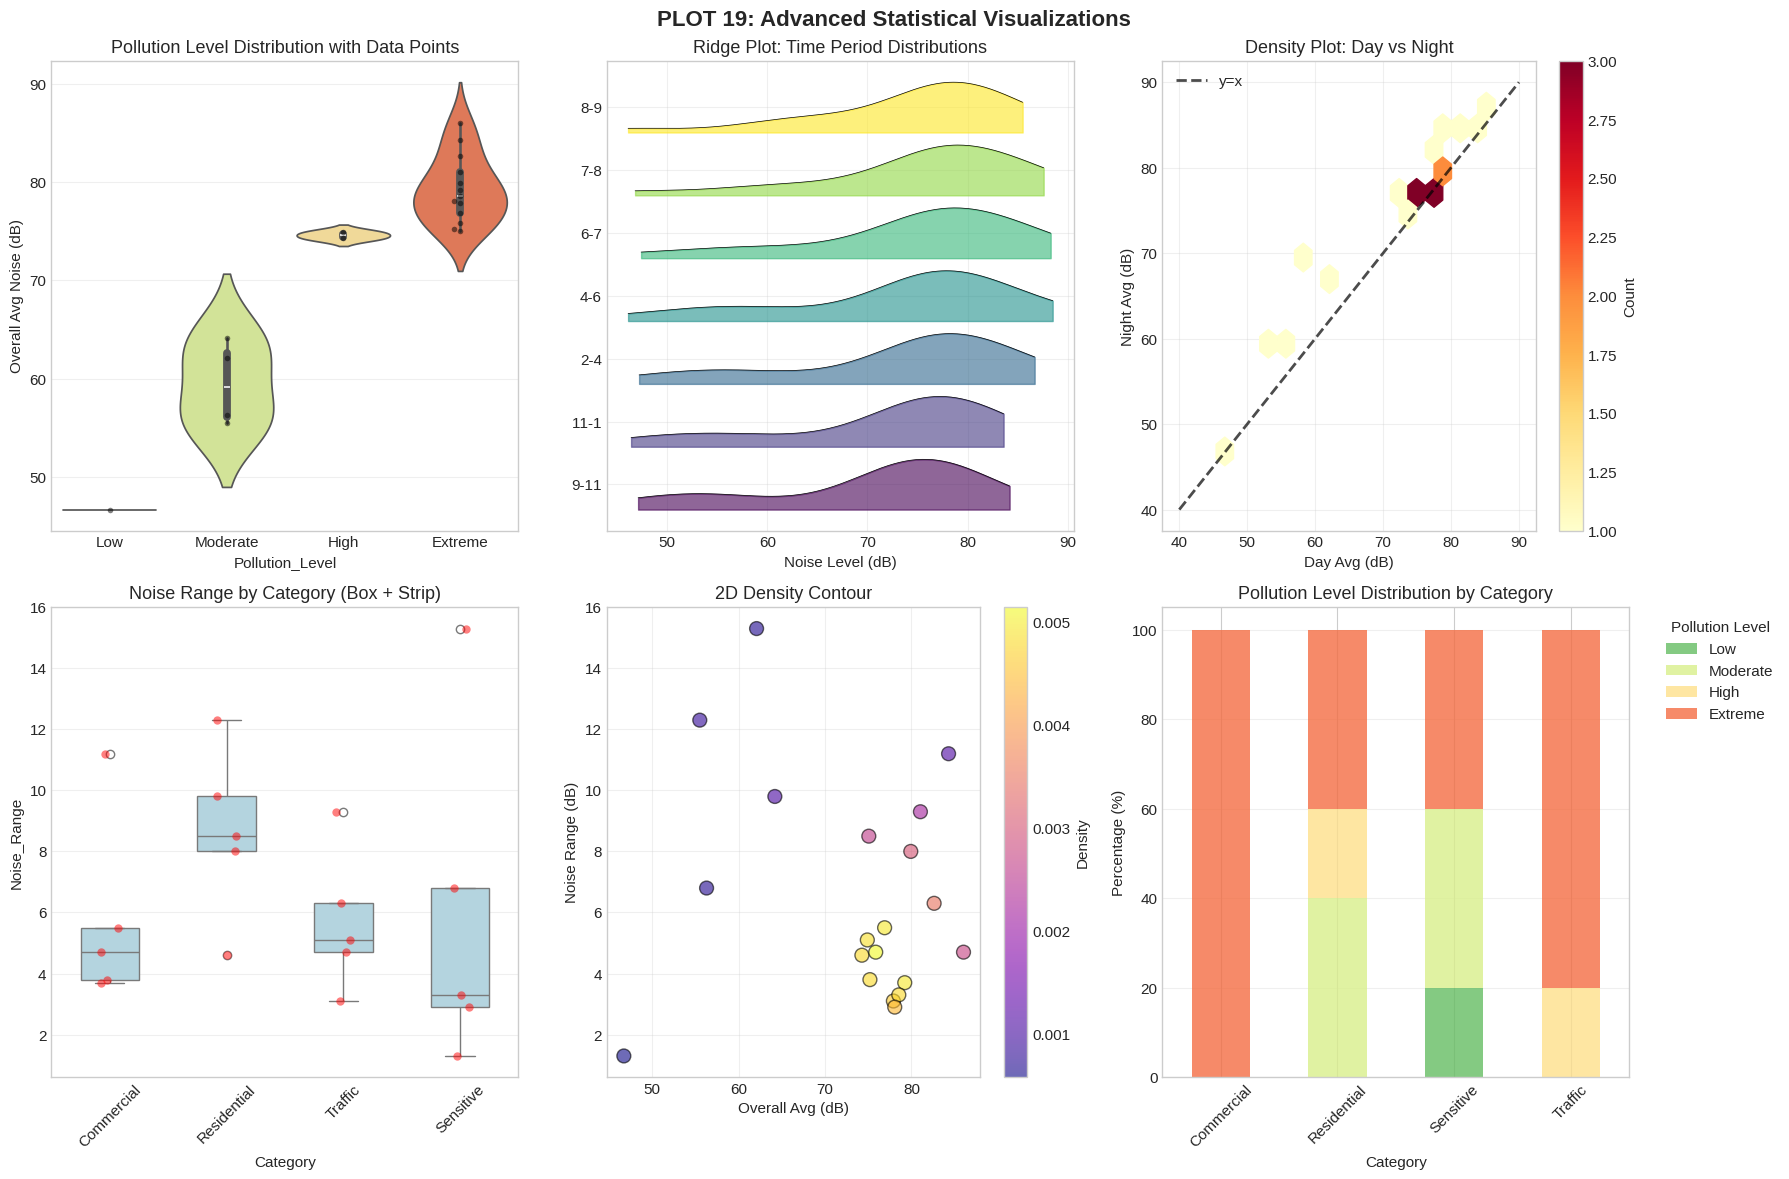

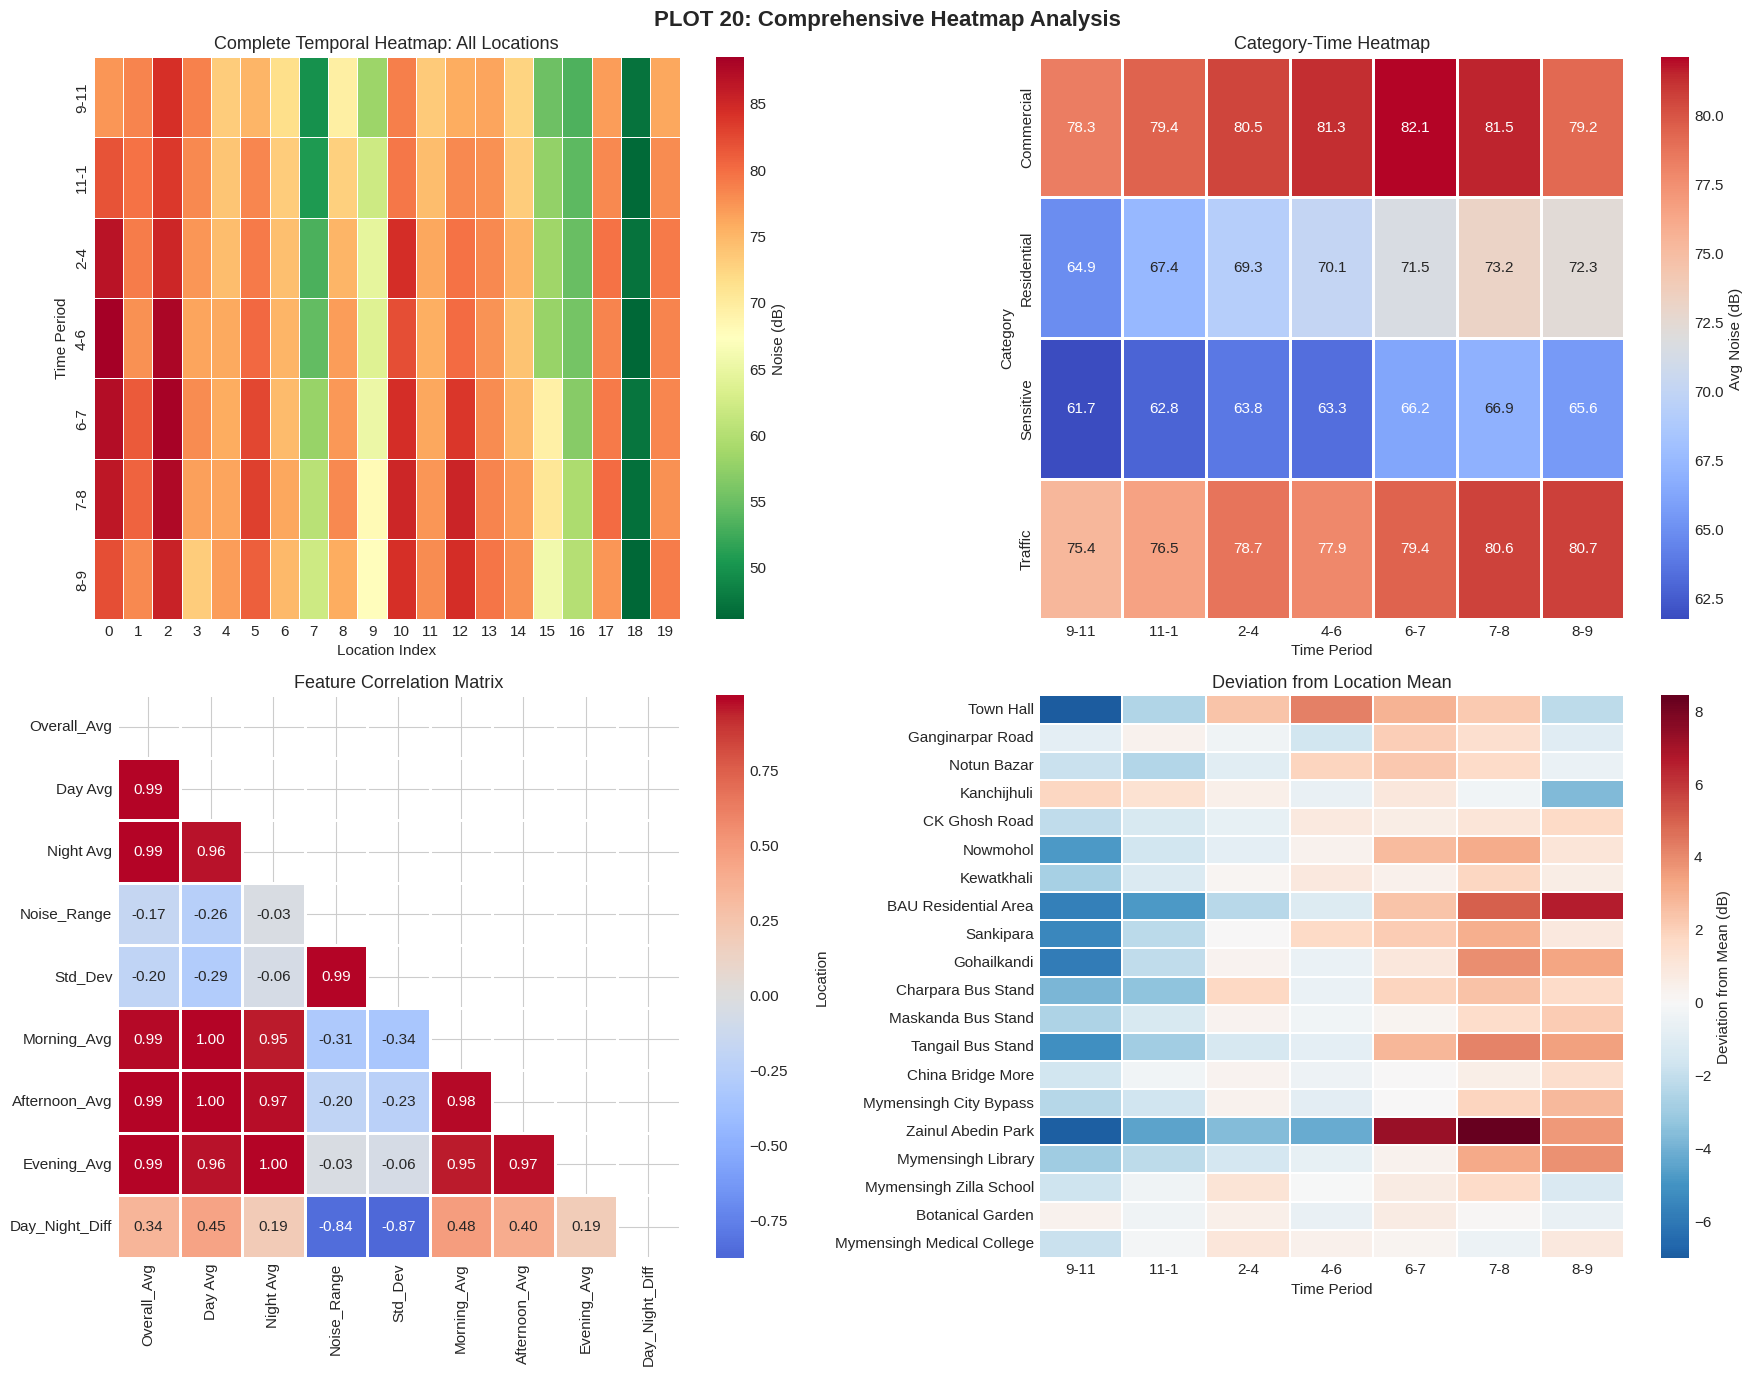

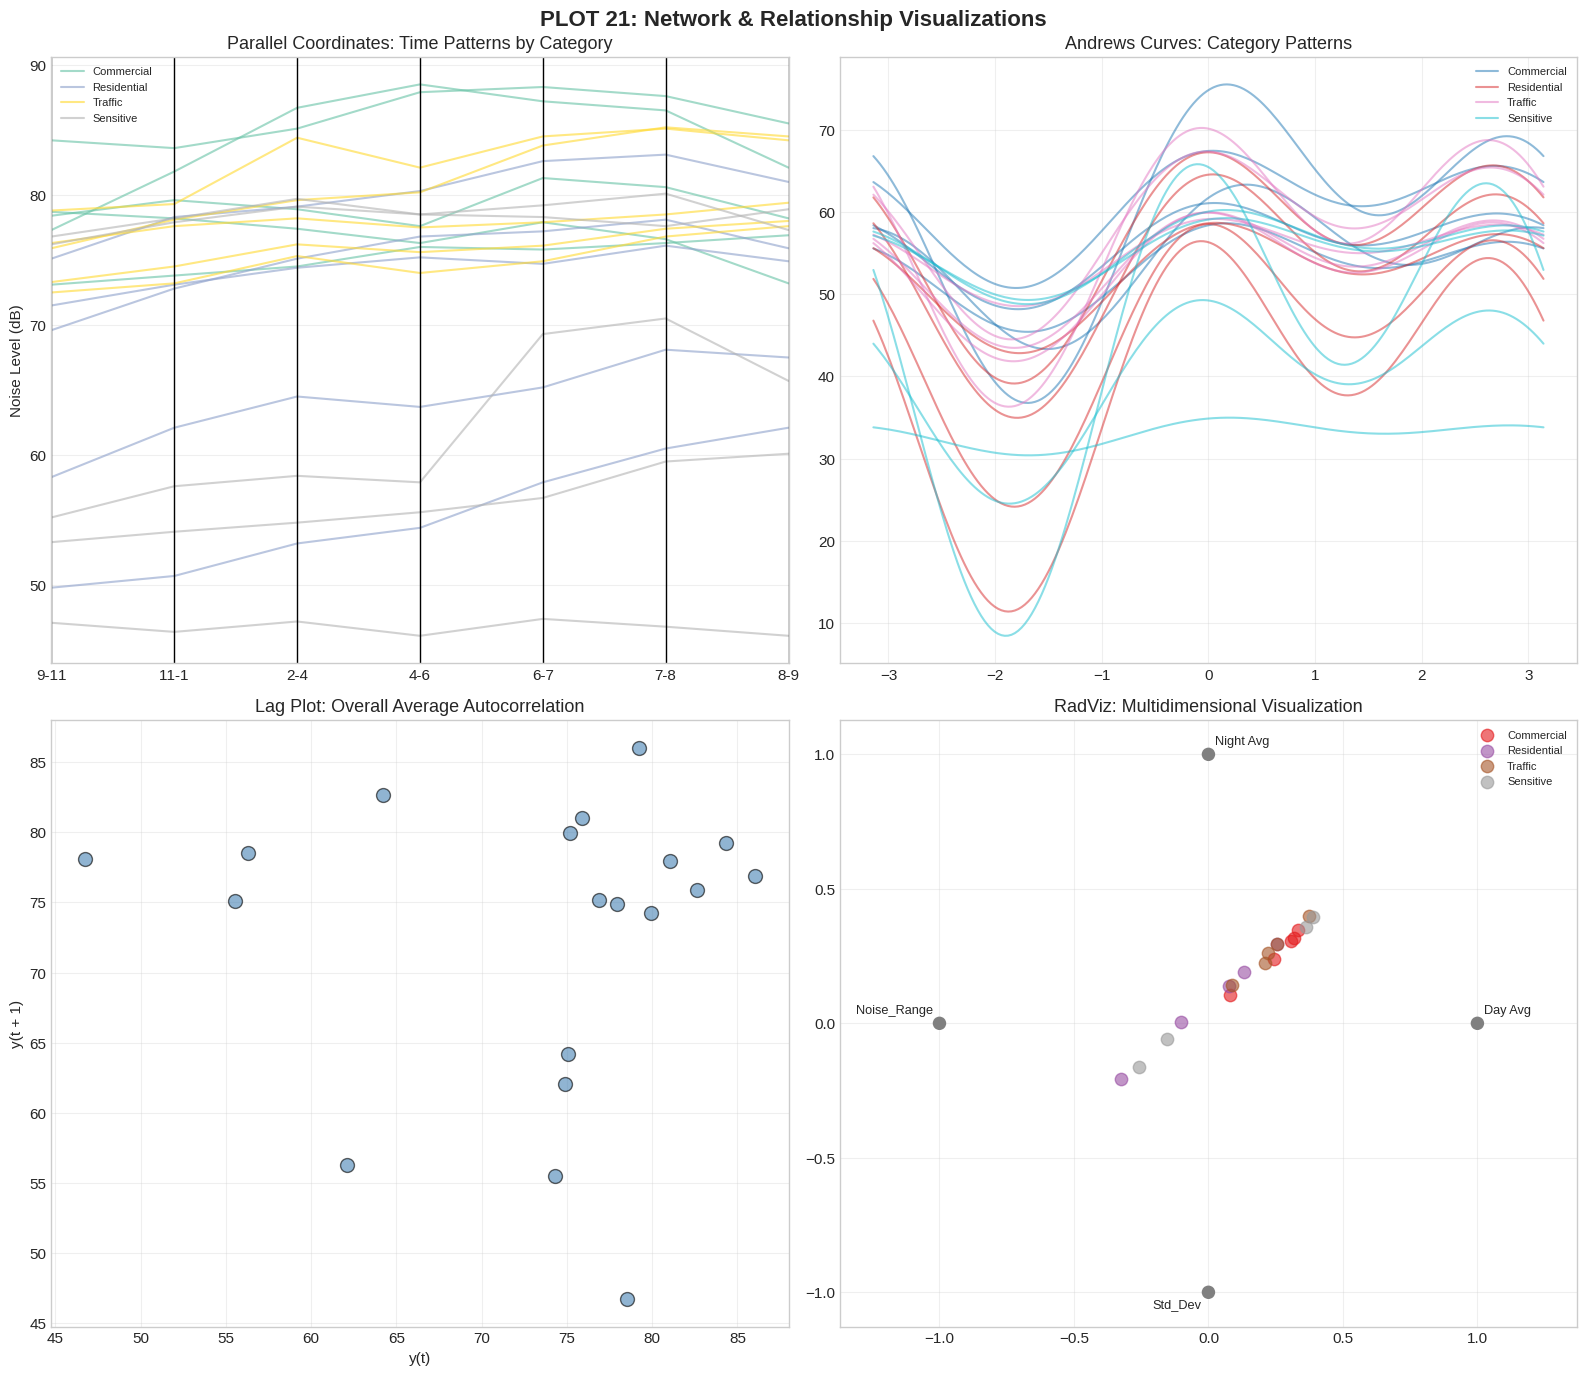

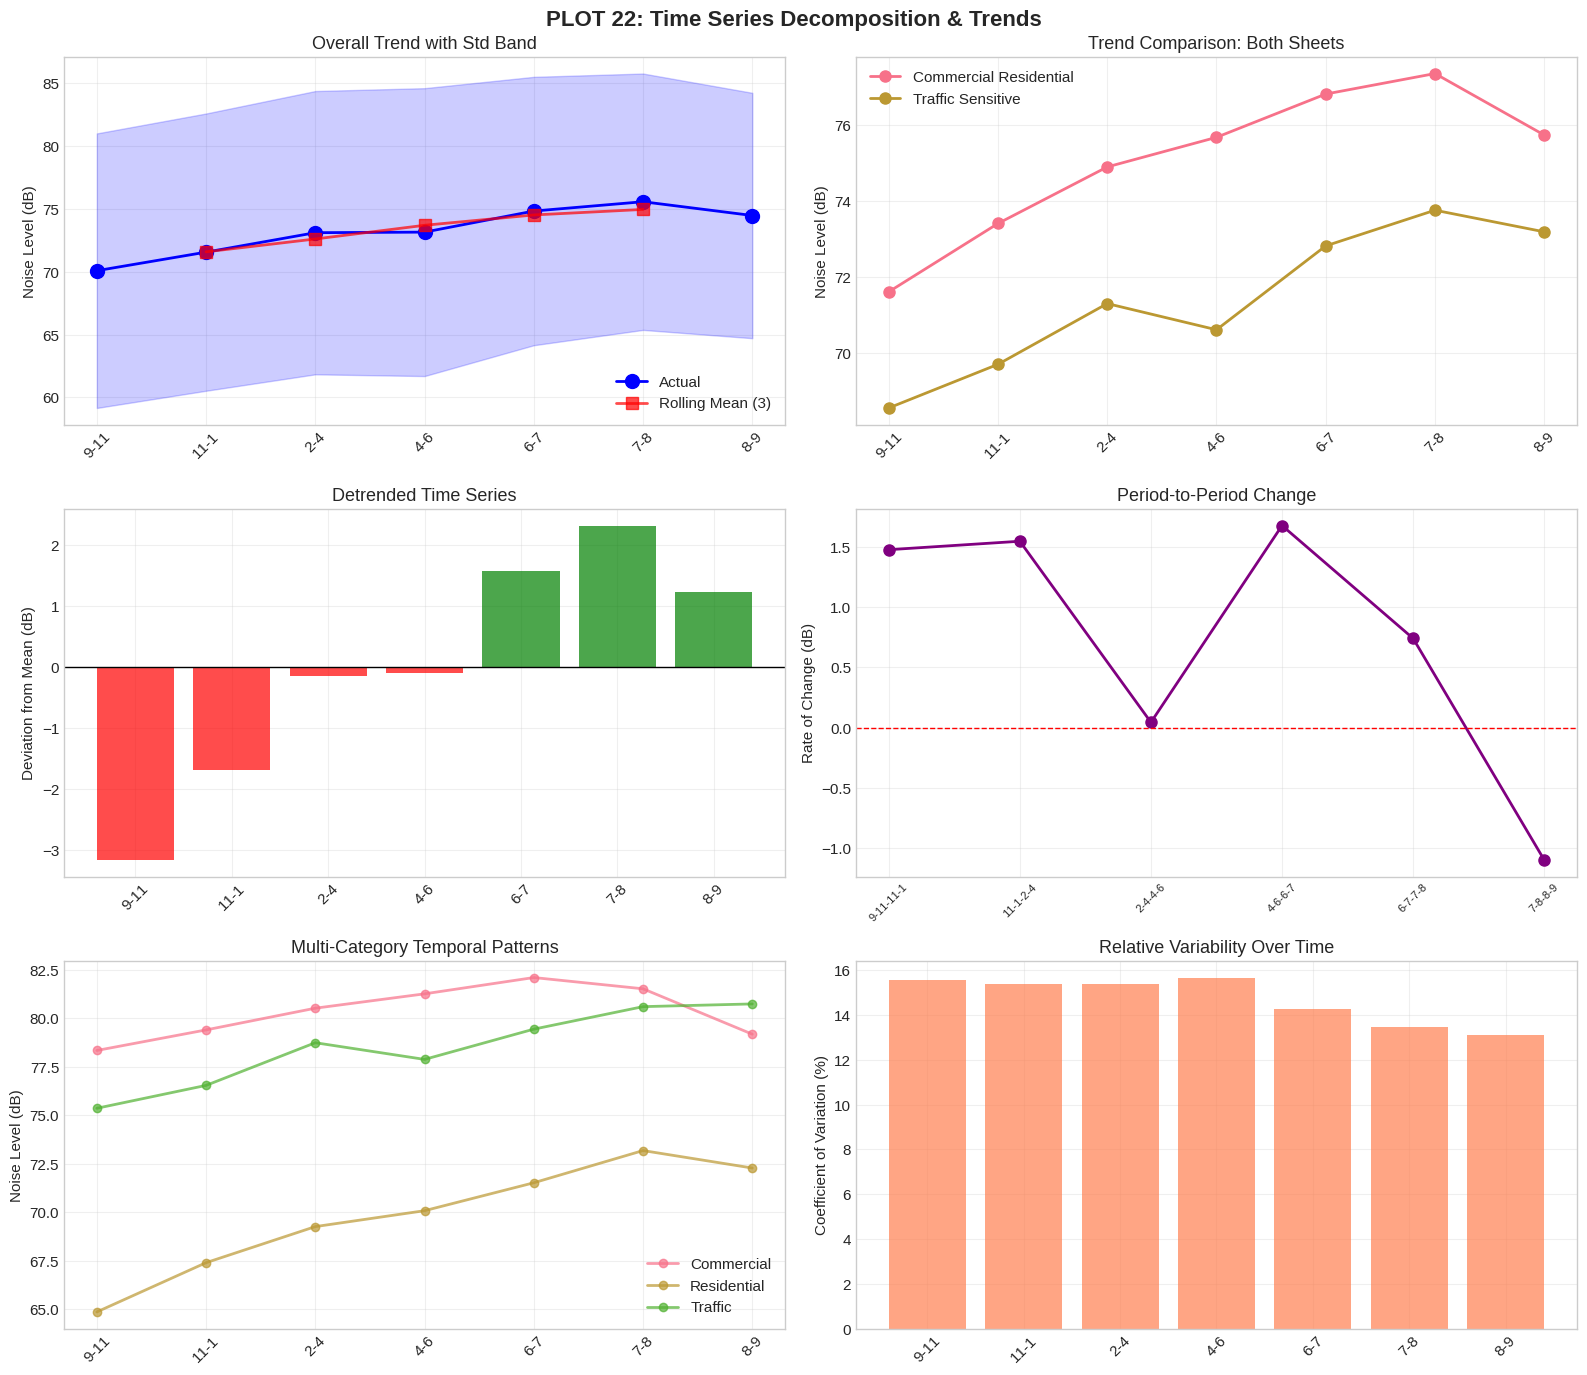

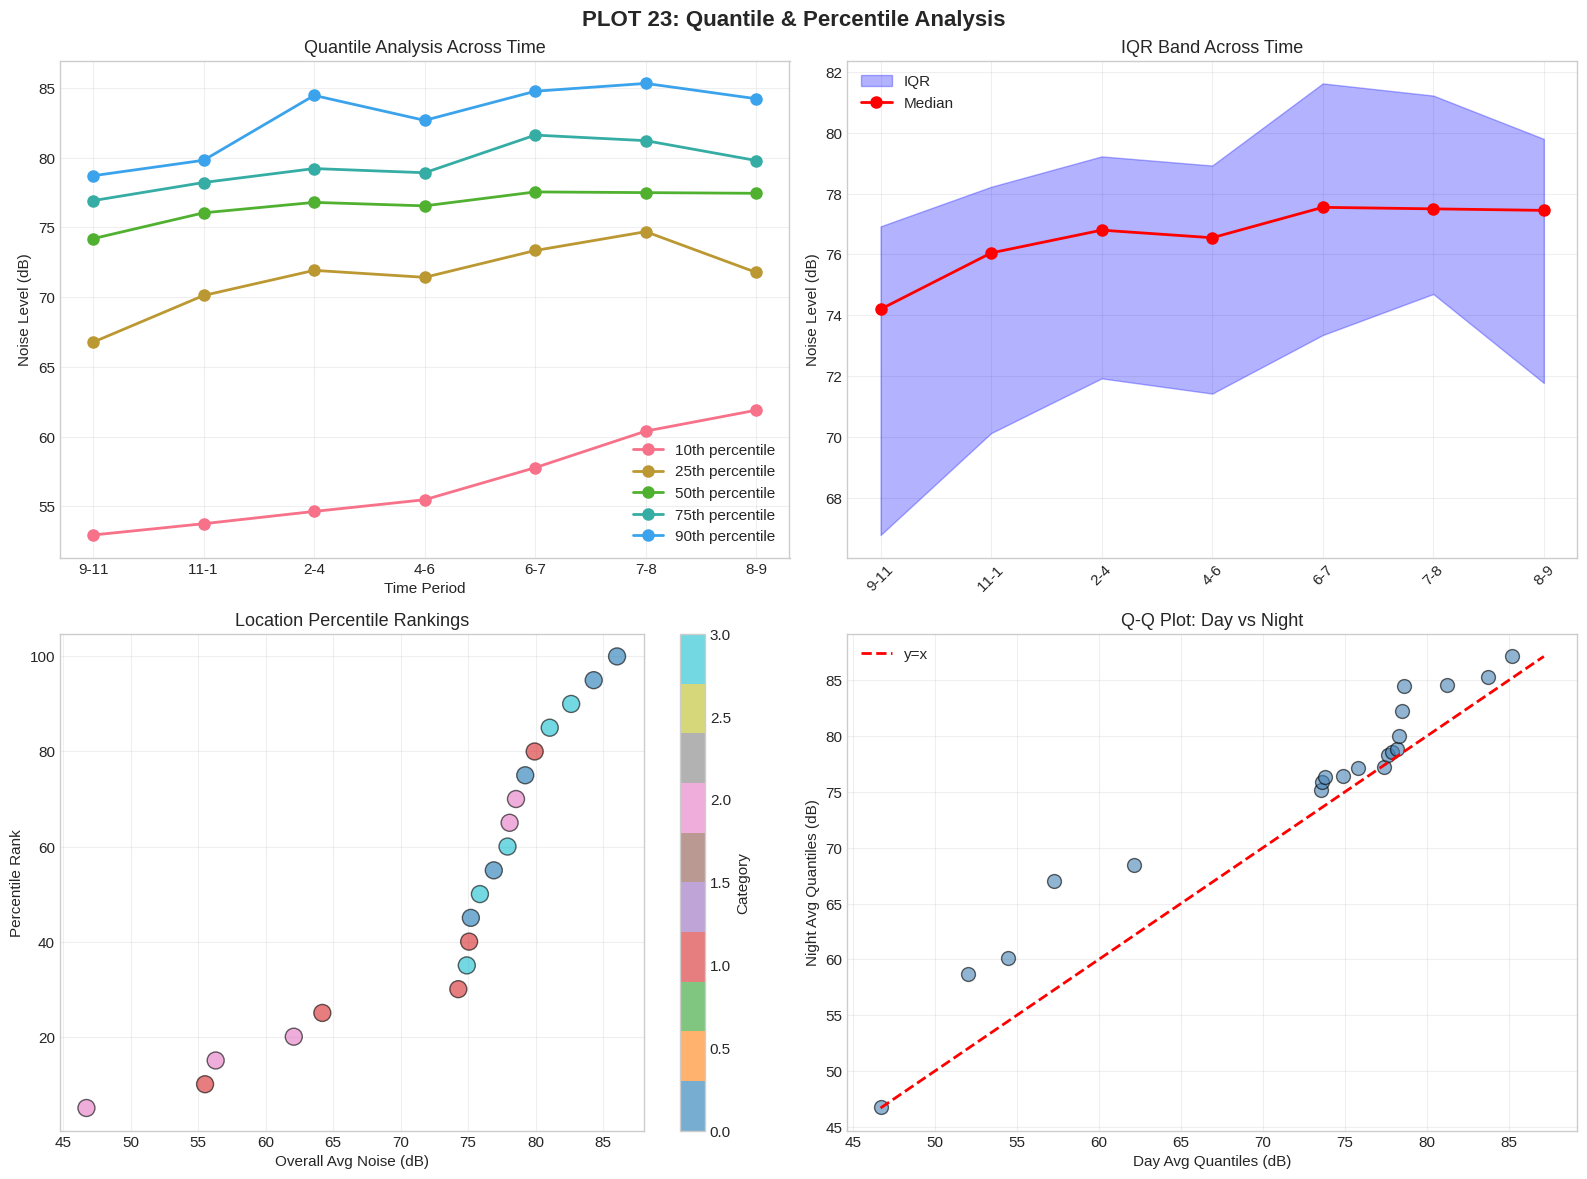

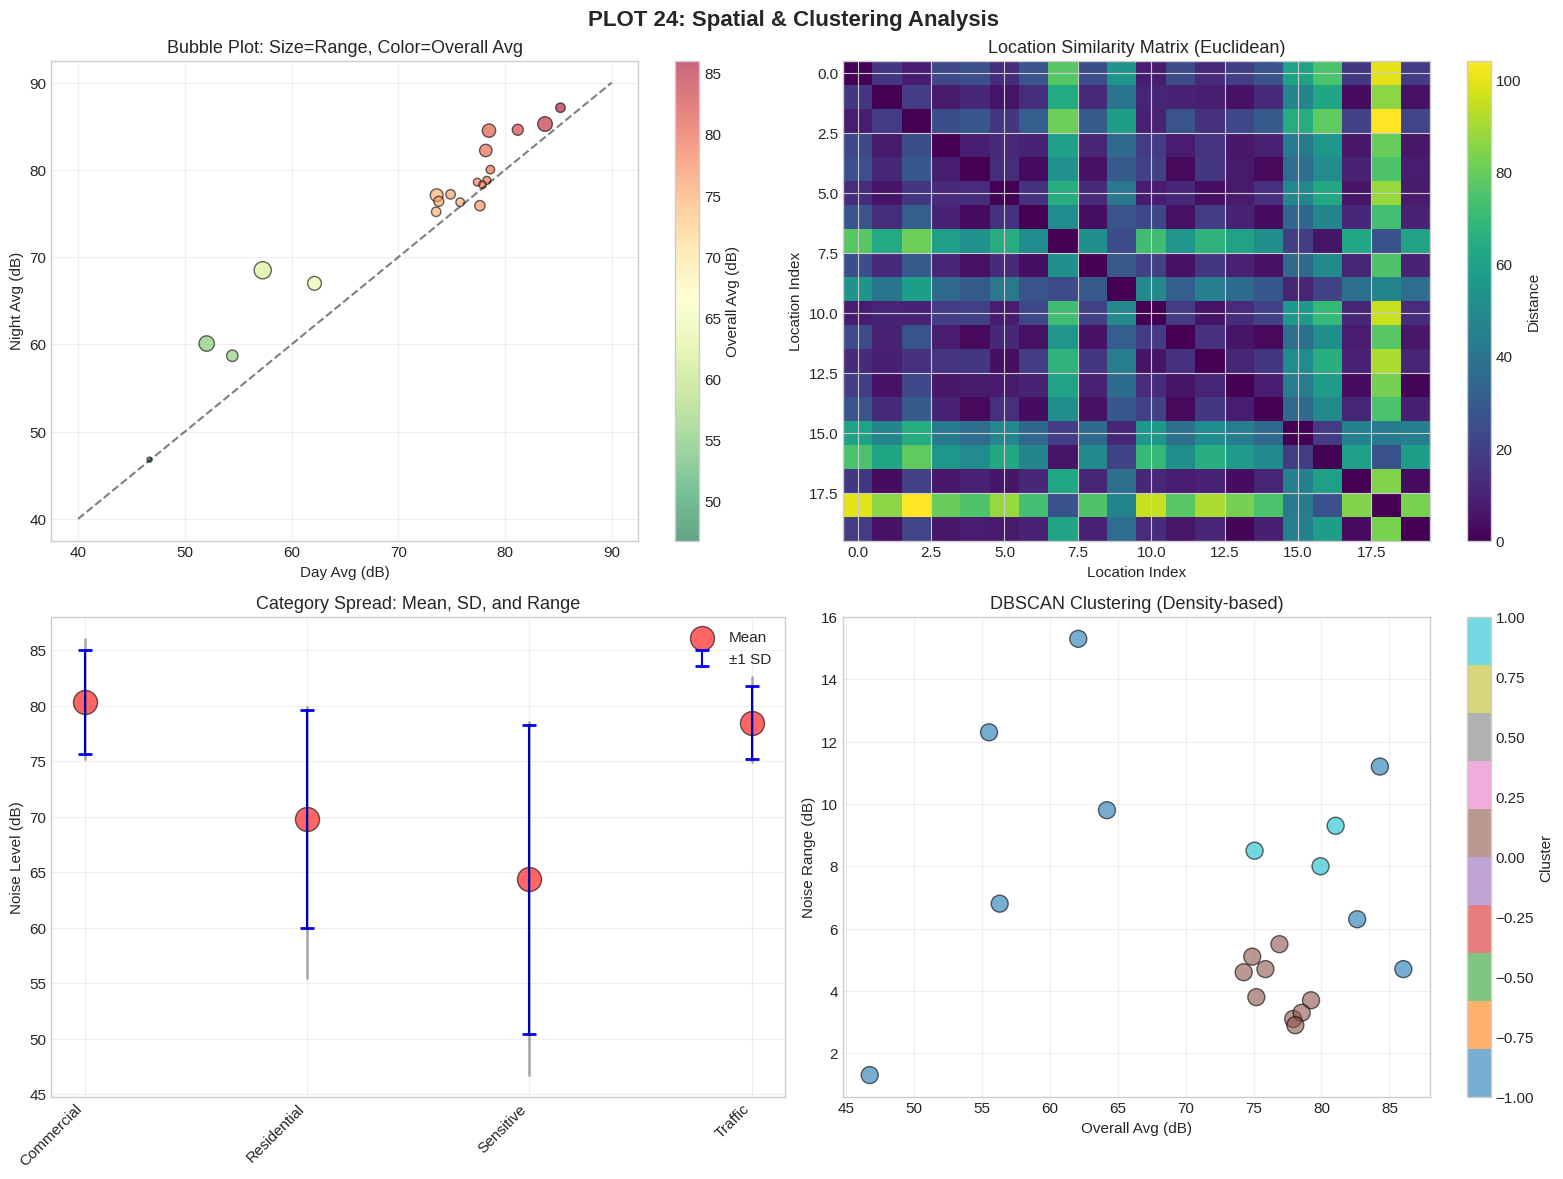

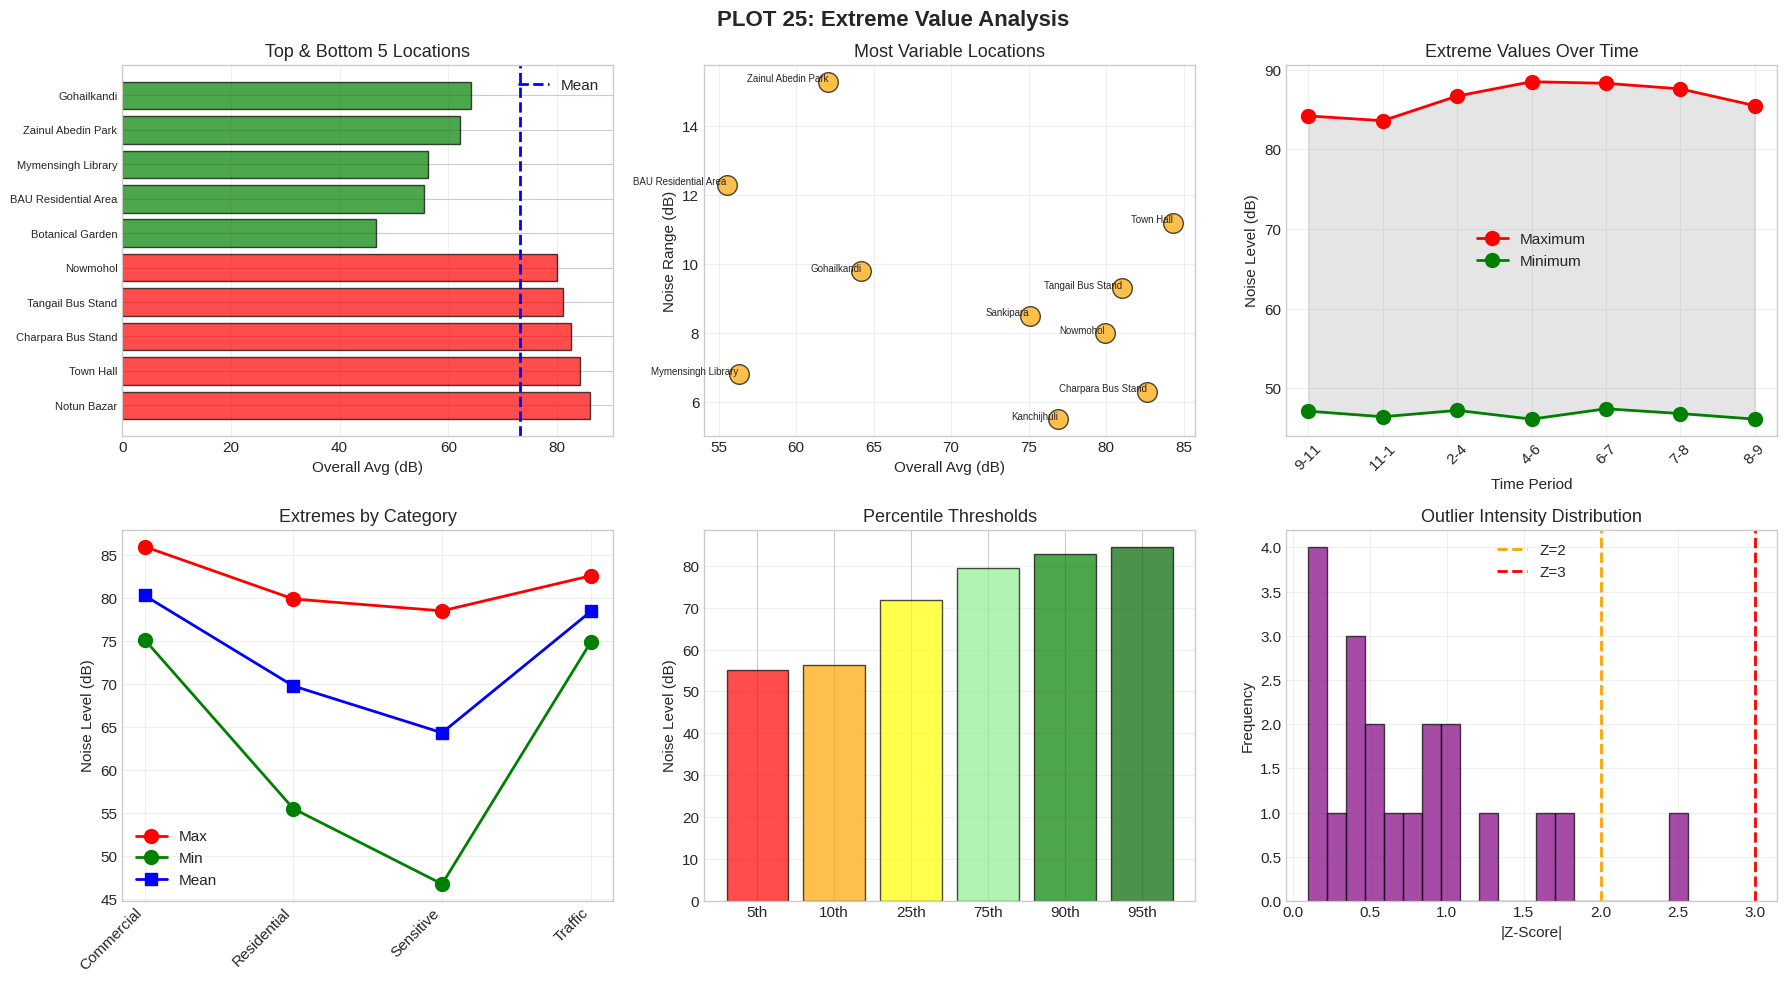

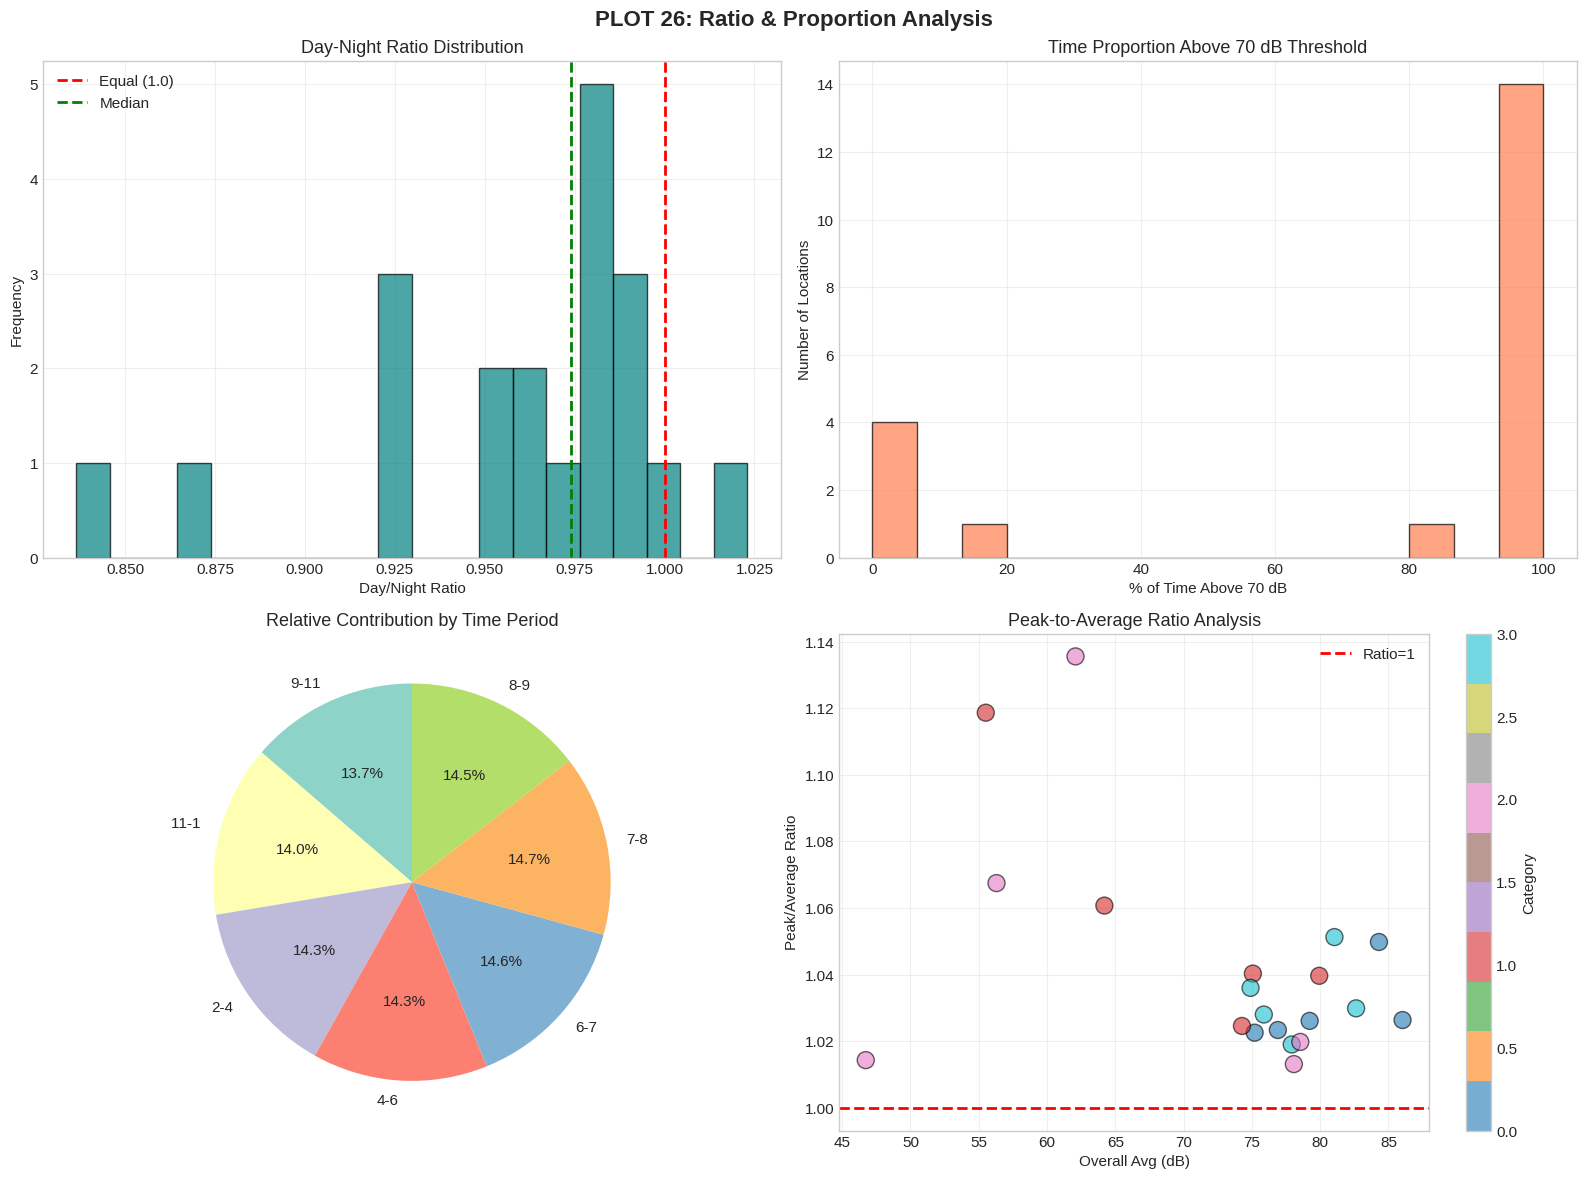

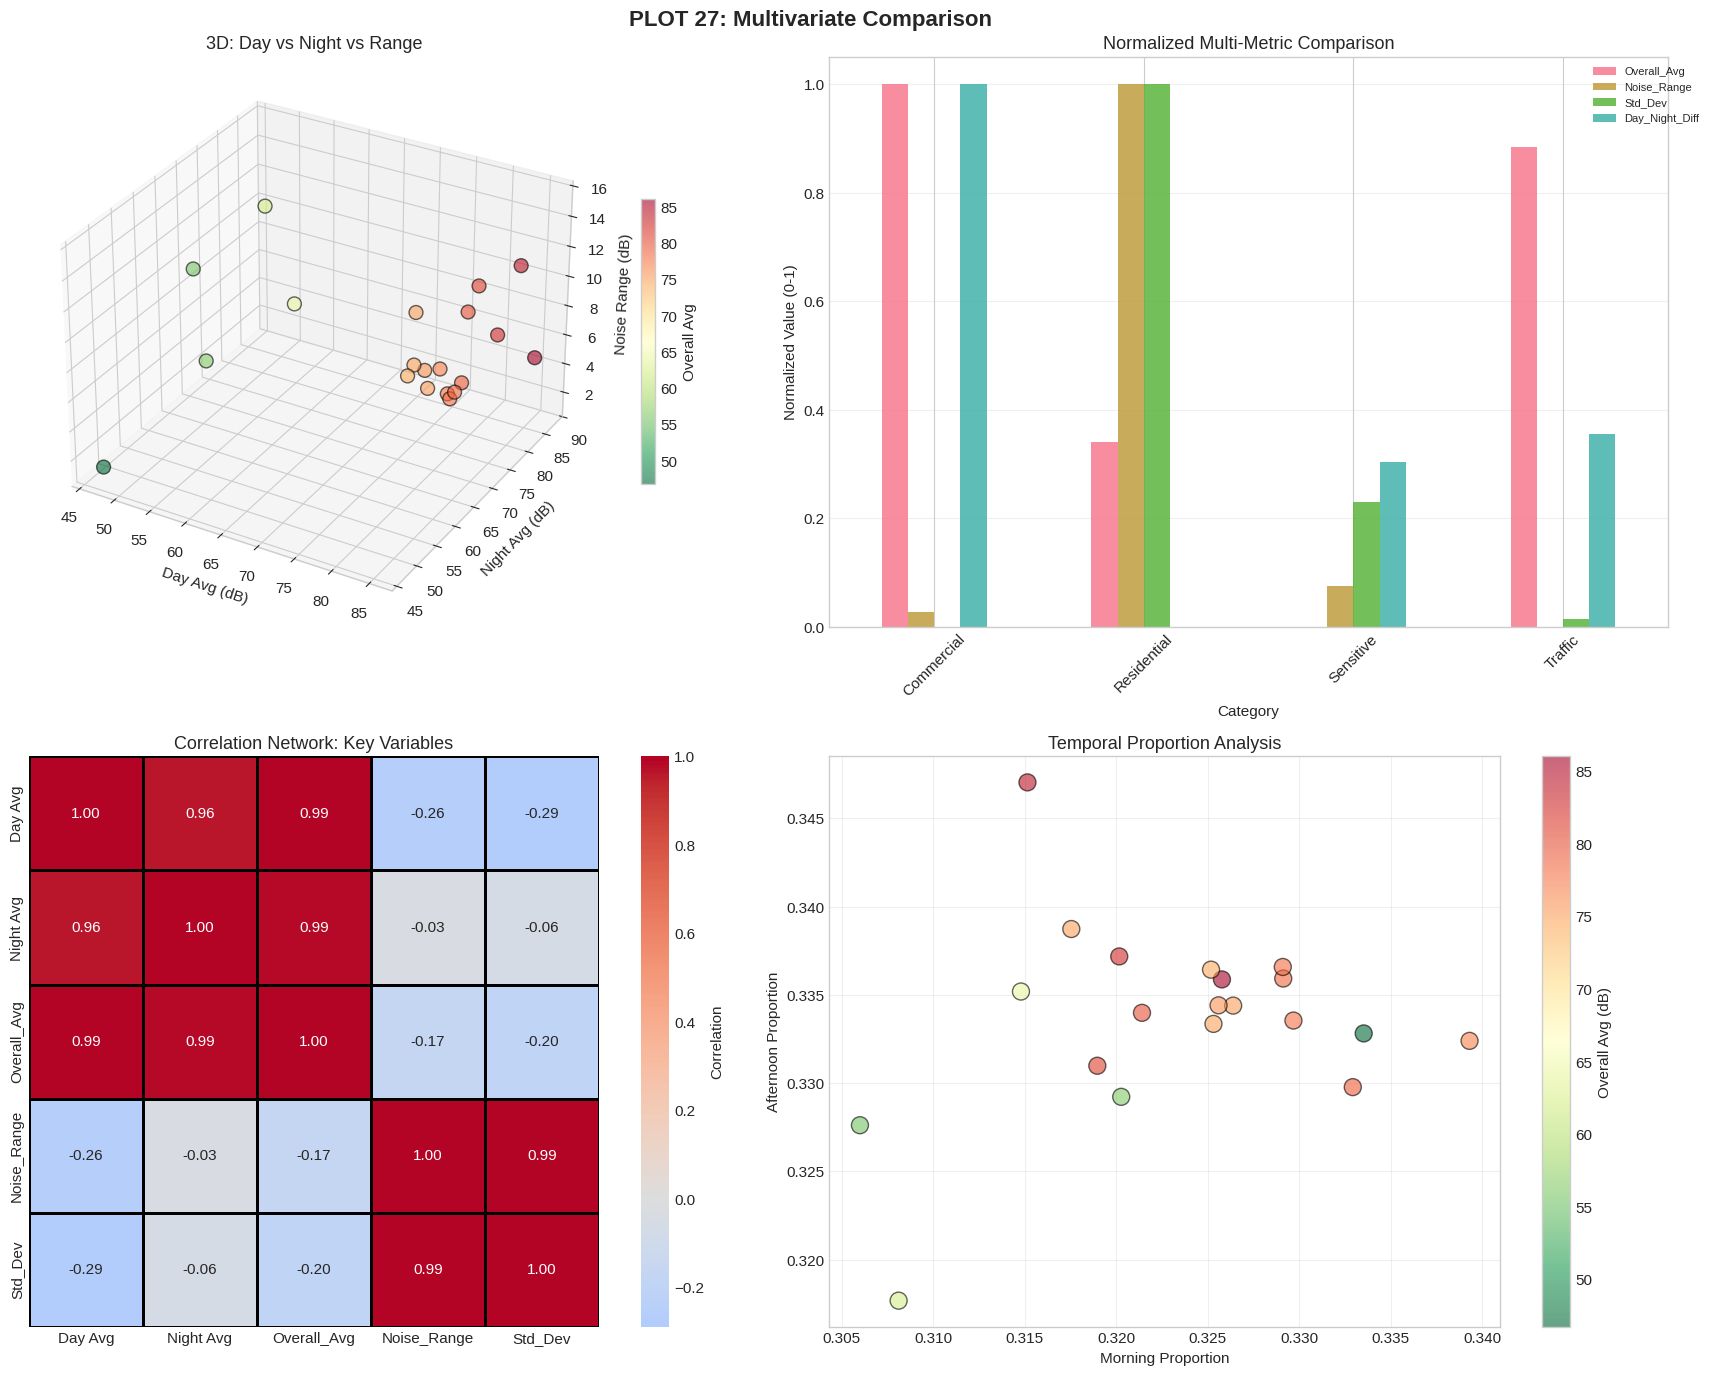

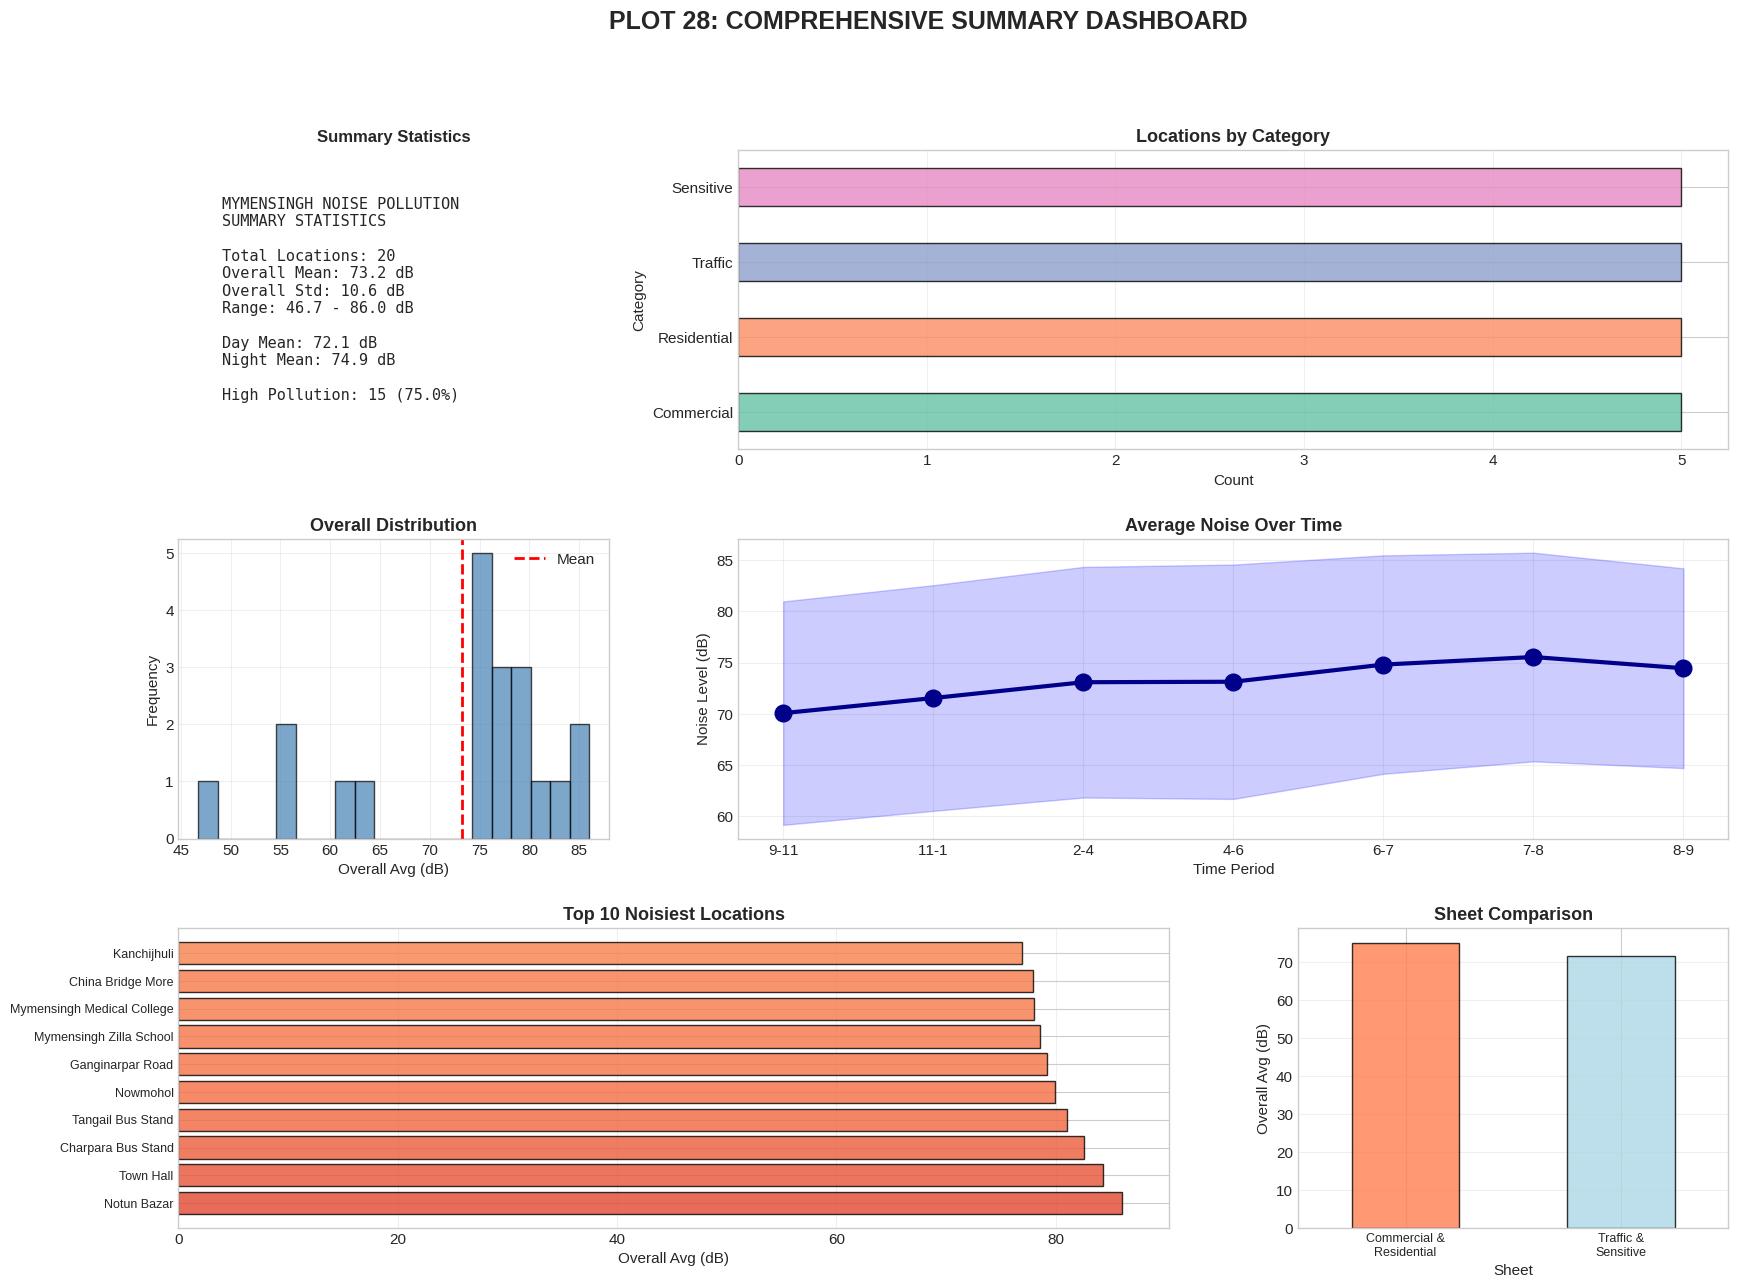


✓ ADDITIONAL VISUALIZATIONS COMPLETE!
✓ Total plots generated: 28


In [3]:
# ---------- PLOT 21: Advanced Statistical Plots ----------
plot_count += 1
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Violin plot with swarm overlay
sns.violinplot(data=combined_eng, x='Pollution_Level', y='Overall_Avg', 
               ax=axes[0, 0], palette='RdYlGn_r', order=['Low', 'Moderate', 'High', 'Extreme'])
sns.swarmplot(data=combined_eng, x='Pollution_Level', y='Overall_Avg', 
              ax=axes[0, 0], color='black', alpha=0.5, size=4, 
              order=['Low', 'Moderate', 'High', 'Extreme'])
axes[0, 0].set_title('Pollution Level Distribution with Data Points')
axes[0, 0].set_ylabel('Overall Avg Noise (dB)')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Ridge plot style - Time period distributions
from scipy.stats import gaussian_kde
y_position = 0
colors_ridge = plt.cm.viridis(np.linspace(0, 1, len(time_periods)))
for idx, period in enumerate(time_periods):
    data = combined_eng[period].dropna()
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 200)
    density = kde(x_range)
    density = density / density.max() * 0.8  # Normalize
    axes[0, 1].fill_between(x_range, y_position, y_position + density, 
                            alpha=0.6, color=colors_ridge[idx], label=period)
    axes[0, 1].plot(x_range, y_position + density, color='black', linewidth=0.5)
    y_position += 1
axes[0, 1].set_xlabel('Noise Level (dB)')
axes[0, 1].set_yticks(np.arange(len(time_periods)) + 0.4)
axes[0, 1].set_yticklabels(time_periods)
axes[0, 1].set_title('Ridge Plot: Time Period Distributions')
axes[0, 1].grid(alpha=0.3)

# 3. Hexbin plot - Density visualization
hexbin = axes[0, 2].hexbin(combined_eng['Day Avg'], combined_eng['Night Avg'], 
                           gridsize=15, cmap='YlOrRd', mincnt=1)
axes[0, 2].plot([40, 90], [40, 90], 'k--', linewidth=2, alpha=0.7, label='y=x')
axes[0, 2].set_xlabel('Day Avg (dB)')
axes[0, 2].set_ylabel('Night Avg (dB)')
axes[0, 2].set_title('Density Plot: Day vs Night')
plt.colorbar(hexbin, ax=axes[0, 2], label='Count')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# 4. Strip plot with box overlay
sns.boxplot(data=combined_eng, x='Category', y='Noise_Range', ax=axes[1, 0], 
            color='lightblue', width=0.5)
sns.stripplot(data=combined_eng, x='Category', y='Noise_Range', ax=axes[1, 0],
              color='red', alpha=0.5, size=6, jitter=True)
axes[1, 0].set_title('Noise Range by Category (Box + Strip)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Contour plot - 2D density
from scipy.stats import gaussian_kde
x = combined_eng['Overall_Avg']
y = combined_eng['Noise_Range']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
scatter = axes[1, 1].scatter(x, y, c=z, s=100, cmap='plasma', alpha=0.6, edgecolors='black')
axes[1, 1].set_xlabel('Overall Avg (dB)')
axes[1, 1].set_ylabel('Noise Range (dB)')
axes[1, 1].set_title('2D Density Contour')
plt.colorbar(scatter, ax=axes[1, 1], label='Density')
axes[1, 1].grid(alpha=0.3)

# 6. Cumulative percentage by category
category_counts = combined_eng.groupby(['Category', 'Pollution_Level']).size().unstack(fill_value=0)
category_pct = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
category_pct.plot(kind='bar', stacked=True, ax=axes[1, 2], 
                  color=sns.color_palette('RdYlGn_r', 4), alpha=0.8)
axes[1, 2].set_ylabel('Percentage (%)')
axes[1, 2].set_title('Pollution Level Distribution by Category')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].legend(title='Pollution Level', bbox_to_anchor=(1.05, 1))
axes[1, 2].grid(axis='y', alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Advanced Statistical Visualizations', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_advanced_stats.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 22: Temporal Heatmaps ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Hourly progression heatmap
hourly_data = combined_eng[time_periods].T
sns.heatmap(hourly_data, cmap='RdYlGn_r', ax=axes[0, 0], 
            cbar_kws={'label': 'Noise (dB)'}, linewidths=0.5)
axes[0, 0].set_xlabel('Location Index')
axes[0, 0].set_ylabel('Time Period')
axes[0, 0].set_title('Complete Temporal Heatmap: All Locations')

# 2. Category-wise temporal heatmap
category_time = combined_eng.groupby('Category')[time_periods].mean()
sns.heatmap(category_time, annot=True, fmt='.1f', cmap='coolwarm', 
            ax=axes[0, 1], linewidths=1, cbar_kws={'label': 'Avg Noise (dB)'})
axes[0, 1].set_xlabel('Time Period')
axes[0, 1].set_ylabel('Category')
axes[0, 1].set_title('Category-Time Heatmap')

# 3. Correlation heatmap - All features
feature_cols = ['Overall_Avg', 'Day Avg', 'Night Avg', 'Noise_Range', 'Std_Dev',
                'Morning_Avg', 'Afternoon_Avg', 'Evening_Avg', 'Day_Night_Diff']
corr_features = combined_eng[feature_cols].corr()
mask = np.triu(np.ones_like(corr_features, dtype=bool))
sns.heatmap(corr_features, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, ax=axes[1, 0], square=True, linewidths=1)
axes[1, 0].set_title('Feature Correlation Matrix')

# 4. Difference heatmap (Day - Night by location)
diff_data = combined_eng[['Location', 'Category']].copy()
for period in time_periods:
    diff_data[period] = combined_eng[period] - combined_eng['Overall_Avg']
diff_matrix = diff_data.set_index('Location')[time_periods]
sns.heatmap(diff_matrix, cmap='RdBu_r', center=0, ax=axes[1, 1],
            cbar_kws={'label': 'Deviation from Mean (dB)'}, linewidths=0.3)
axes[1, 1].set_title('Deviation from Location Mean')
axes[1, 1].set_xlabel('Time Period')

plt.suptitle(f'PLOT {plot_count}: Comprehensive Heatmap Analysis', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 23: Network/Relationship Plots ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 1. Parallel coordinates plot
from pandas.plotting import parallel_coordinates
parallel_data = combined_eng[['Category'] + time_periods].copy()
parallel_coordinates(parallel_data, 'Category', ax=axes[0, 0], 
                    colormap='Set2', alpha=0.6)
axes[0, 0].set_ylabel('Noise Level (dB)')
axes[0, 0].set_title('Parallel Coordinates: Time Patterns by Category')
axes[0, 0].legend(loc='best', fontsize=8)
axes[0, 0].grid(alpha=0.3)

# 2. Andrews curves
from pandas.plotting import andrews_curves
andrews_data = combined_eng[['Category', 'Overall_Avg', 'Noise_Range', 
                              'Std_Dev', 'Day_Night_Diff']].copy()
andrews_curves(andrews_data, 'Category', ax=axes[0, 1], 
               colormap='tab10', alpha=0.5)
axes[0, 1].set_title('Andrews Curves: Category Patterns')
axes[0, 1].legend(loc='best', fontsize=8)
axes[0, 1].grid(alpha=0.3)

# 3. Lag plot - Autocorrelation
from pandas.plotting import lag_plot
lag_plot(combined_eng['Overall_Avg'], ax=axes[1, 0], c='steelblue', 
         s=100, alpha=0.6, edgecolors='black')
axes[1, 0].set_title('Lag Plot: Overall Average Autocorrelation')
axes[1, 0].grid(alpha=0.3)

# 4. Radviz plot
from pandas.plotting import radviz
radviz_data = combined_eng[['Category', 'Day Avg', 'Night Avg', 
                             'Noise_Range', 'Std_Dev']].copy()
radviz(radviz_data, 'Category', ax=axes[1, 1], 
       colormap='Set1', alpha=0.6, s=80)
axes[1, 1].set_title('RadViz: Multidimensional Visualization')
axes[1, 1].legend(loc='best', fontsize=8)
axes[1, 1].grid(alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Network & Relationship Visualizations', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_network_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 24: Time Series Decomposition ----------
plot_count += 1
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# 1. Overall trend across time periods
time_means = combined_eng[time_periods].mean()
time_rolling = pd.Series(time_means.values).rolling(window=3, center=True).mean()
axes[0, 0].plot(range(len(time_periods)), time_means, 'o-', linewidth=2, 
                markersize=10, label='Actual', color='blue')
axes[0, 0].plot(range(len(time_periods)), time_rolling, 's-', linewidth=2,
                markersize=8, label='Rolling Mean (3)', color='red', alpha=0.7)
axes[0, 0].fill_between(range(len(time_periods)), 
                        time_means - combined_eng[time_periods].std(),
                        time_means + combined_eng[time_periods].std(),
                        alpha=0.2, color='blue')
axes[0, 0].set_xticks(range(len(time_periods)))
axes[0, 0].set_xticklabels(time_periods, rotation=45)
axes[0, 0].set_ylabel('Noise Level (dB)')
axes[0, 0].set_title('Overall Trend with Std Band')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Trend by sheet
for sheet in combined_eng['Sheet'].unique():
    sheet_means = combined_eng[combined_eng['Sheet'] == sheet][time_periods].mean()
    axes[0, 1].plot(range(len(time_periods)), sheet_means, 'o-', linewidth=2,
                    markersize=8, label=sheet.replace('_', ' '))
axes[0, 1].set_xticks(range(len(time_periods)))
axes[0, 1].set_xticklabels(time_periods, rotation=45)
axes[0, 1].set_ylabel('Noise Level (dB)')
axes[0, 1].set_title('Trend Comparison: Both Sheets')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Detrended data
overall_mean = time_means.mean()
detrended = time_means - overall_mean
axes[1, 0].bar(range(len(time_periods)), detrended, 
               color=['red' if x < 0 else 'green' for x in detrended], alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1, 0].set_xticks(range(len(time_periods)))
axes[1, 0].set_xticklabels(time_periods, rotation=45)
axes[1, 0].set_ylabel('Deviation from Mean (dB)')
axes[1, 0].set_title('Detrended Time Series')
axes[1, 0].grid(alpha=0.3)

# 4. Rate of change
rate_of_change = np.diff(time_means.values)
axes[1, 1].plot(range(len(rate_of_change)), rate_of_change, 'o-', 
                linewidth=2, markersize=8, color='purple')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1, 1].set_xticks(range(len(rate_of_change)))
axes[1, 1].set_xticklabels([f'{time_periods[i]}-{time_periods[i+1]}' 
                            for i in range(len(rate_of_change))], rotation=45, fontsize=8)
axes[1, 1].set_ylabel('Rate of Change (dB)')
axes[1, 1].set_title('Period-to-Period Change')
axes[1, 1].grid(alpha=0.3)

# 5. Seasonal decomposition (by category)
for cat in combined_eng['Category'].unique()[:3]:  # Top 3 categories
    cat_means = combined_eng[combined_eng['Category'] == cat][time_periods].mean()
    axes[2, 0].plot(range(len(time_periods)), cat_means, 'o-', 
                    linewidth=2, markersize=6, label=cat, alpha=0.7)
axes[2, 0].set_xticks(range(len(time_periods)))
axes[2, 0].set_xticklabels(time_periods, rotation=45)
axes[2, 0].set_ylabel('Noise Level (dB)')
axes[2, 0].set_title('Multi-Category Temporal Patterns')
axes[2, 0].legend()
axes[2, 0].grid(alpha=0.3)

# 6. Coefficient of variation over time
cv_time = (combined_eng[time_periods].std() / combined_eng[time_periods].mean()) * 100
axes[2, 1].bar(range(len(time_periods)), cv_time, alpha=0.7, color='coral')
axes[2, 1].set_xticks(range(len(time_periods)))
axes[2, 1].set_xticklabels(time_periods, rotation=45)
axes[2, 1].set_ylabel('Coefficient of Variation (%)')
axes[2, 1].set_title('Relative Variability Over Time')
axes[2, 1].grid(alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Time Series Decomposition & Trends', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_time_decomposition.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 25: Quantile Analysis ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Quantile plot
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
quantile_data = combined_eng[time_periods].quantile(quantiles)
for q in quantiles:
    axes[0, 0].plot(time_periods, quantile_data.loc[q], 'o-', 
                    linewidth=2, markersize=8, label=f'{int(q*100)}th percentile')
axes[0, 0].set_xlabel('Time Period')
axes[0, 0].set_ylabel('Noise Level (dB)')
axes[0, 0].set_title('Quantile Analysis Across Time')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Inter-quartile range visualization
q1_data = combined_eng[time_periods].quantile(0.25)
q3_data = combined_eng[time_periods].quantile(0.75)
median_data = combined_eng[time_periods].quantile(0.5)
axes[0, 1].fill_between(range(len(time_periods)), q1_data, q3_data, 
                        alpha=0.3, color='blue', label='IQR')
axes[0, 1].plot(range(len(time_periods)), median_data, 'r-', 
                linewidth=2, marker='o', markersize=8, label='Median')
axes[0, 1].set_xticks(range(len(time_periods)))
axes[0, 1].set_xticklabels(time_periods, rotation=45)
axes[0, 1].set_ylabel('Noise Level (dB)')
axes[0, 1].set_title('IQR Band Across Time')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Percentile ranking
percentile_ranks = combined_eng['Overall_Avg'].rank(pct=True) * 100
scatter = axes[1, 0].scatter(combined_eng['Overall_Avg'], percentile_ranks,
                            c=combined_eng['Category'].astype('category').cat.codes,
                            s=150, alpha=0.6, edgecolors='black', cmap='tab10')
axes[1, 0].set_xlabel('Overall Avg Noise (dB)')
axes[1, 0].set_ylabel('Percentile Rank')
axes[1, 0].set_title('Location Percentile Rankings')
axes[1, 0].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 0], label='Category')

# 4. Quantile-quantile comparison (Day vs Night)
day_sorted = np.sort(combined_eng['Day Avg'])
night_sorted = np.sort(combined_eng['Night Avg'])
axes[1, 1].scatter(day_sorted, night_sorted, s=100, alpha=0.6, 
                   edgecolors='black', c='steelblue')
min_val = min(day_sorted.min(), night_sorted.min())
max_val = max(day_sorted.max(), night_sorted.max())
axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--', 
                linewidth=2, label='y=x')
axes[1, 1].set_xlabel('Day Avg Quantiles (dB)')
axes[1, 1].set_ylabel('Night Avg Quantiles (dB)')
axes[1, 1].set_title('Q-Q Plot: Day vs Night')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Quantile & Percentile Analysis', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_quantile_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 26: Geographical/Spatial Analysis ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bubble plot - Size by variability
scatter = axes[0, 0].scatter(combined_eng['Day Avg'], combined_eng['Night Avg'],
                            s=combined_eng['Noise_Range']*10, 
                            c=combined_eng['Overall_Avg'],
                            alpha=0.6, edgecolors='black', cmap='RdYlGn_r')
axes[0, 0].plot([40, 90], [40, 90], 'k--', alpha=0.5)
axes[0, 0].set_xlabel('Day Avg (dB)')
axes[0, 0].set_ylabel('Night Avg (dB)')
axes[0, 0].set_title('Bubble Plot: Size=Range, Color=Overall Avg')
plt.colorbar(scatter, ax=axes[0, 0], label='Overall Avg (dB)')
axes[0, 0].grid(alpha=0.3)

# 2. Location network (similarity)
from sklearn.metrics.pairwise import euclidean_distances
location_features = combined_eng[time_periods].values
distances = euclidean_distances(location_features)
# Plot similarity matrix
im = axes[0, 1].imshow(distances, cmap='viridis', aspect='auto')
axes[0, 1].set_title('Location Similarity Matrix (Euclidean)')
axes[0, 1].set_xlabel('Location Index')
axes[0, 1].set_ylabel('Location Index')
plt.colorbar(im, ax=axes[0, 1], label='Distance')

# 3. Category spatial distribution
category_spread = combined_eng.groupby('Category').agg({
    'Overall_Avg': ['mean', 'std', 'min', 'max']
}).reset_index()
x_pos = range(len(category_spread))
axes[1, 0].scatter(x_pos, category_spread[('Overall_Avg', 'mean')], 
                   s=300, alpha=0.6, c='red', edgecolors='black', label='Mean')
axes[1, 0].errorbar(x_pos, category_spread[('Overall_Avg', 'mean')],
                    yerr=category_spread[('Overall_Avg', 'std')],
                    fmt='none', ecolor='blue', capsize=5, capthick=2, label='±1 SD')
for i, cat in enumerate(category_spread['Category']):
    axes[1, 0].plot([i, i], [category_spread[('Overall_Avg', 'min')].iloc[i],
                              category_spread[('Overall_Avg', 'max')].iloc[i]],
                   'k-', linewidth=2, alpha=0.3)
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(category_spread['Category'], rotation=45, ha='right')
axes[1, 0].set_ylabel('Noise Level (dB)')
axes[1, 0].set_title('Category Spread: Mean, SD, and Range')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Location clustering visualization (DBSCAN)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X_cluster = combined_eng[['Overall_Avg', 'Noise_Range']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(X_scaled)
scatter = axes[1, 1].scatter(combined_eng['Overall_Avg'], 
                            combined_eng['Noise_Range'],
                            c=clusters, cmap='tab10', s=150, 
                            alpha=0.6, edgecolors='black')
axes[1, 1].set_xlabel('Overall Avg (dB)')
axes[1, 1].set_ylabel('Noise Range (dB)')
axes[1, 1].set_title('DBSCAN Clustering (Density-based)')
axes[1, 1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Cluster')

plt.suptitle(f'PLOT {plot_count}: Spatial & Clustering Analysis', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_spatial_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 27: Extreme Value Analysis ----------
plot_count += 1
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Top/Bottom performers
top_n = 5
top_locations = combined_eng.nlargest(top_n, 'Overall_Avg')
bottom_locations = combined_eng.nsmallest(top_n, 'Overall_Avg')
combined_extremes = pd.concat([top_locations, bottom_locations])
colors_extreme = ['red']*top_n + ['green']*top_n
axes[0, 0].barh(range(len(combined_extremes)), combined_extremes['Overall_Avg'],
                color=colors_extreme, alpha=0.7, edgecolor='black')
axes[0, 0].set_yticks(range(len(combined_extremes)))
axes[0, 0].set_yticklabels(combined_extremes['Location'], fontsize=8)
axes[0, 0].set_xlabel('Overall Avg (dB)')
axes[0, 0].set_title(f'Top & Bottom {top_n} Locations')
axes[0, 0].axvline(x=combined_eng['Overall_Avg'].mean(), color='blue', 
                   linestyle='--', linewidth=2, label='Mean')
axes[0, 0].legend()
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Extreme variability
extreme_variable = combined_eng.nlargest(10, 'Noise_Range')
axes[0, 1].scatter(extreme_variable['Overall_Avg'], extreme_variable['Noise_Range'],
                   s=200, c='orange', alpha=0.7, edgecolors='black')
for idx, row in extreme_variable.iterrows():
    axes[0, 1].annotate(row['Location'], 
                       (row['Overall_Avg'], row['Noise_Range']),
                       fontsize=7, ha='right')
axes[0, 1].set_xlabel('Overall Avg (dB)')
axes[0, 1].set_ylabel('Noise Range (dB)')
axes[0, 1].set_title('Most Variable Locations')
axes[0, 1].grid(alpha=0.3)

# 3. Time period extremes
max_by_time = combined_eng[time_periods].max()
min_by_time = combined_eng[time_periods].min()
axes[0, 2].plot(time_periods, max_by_time, 'ro-', linewidth=2, 
                markersize=10, label='Maximum')
axes[0, 2].plot(time_periods, min_by_time, 'go-', linewidth=2,
                markersize=10, label='Minimum')
axes[0, 2].fill_between(range(len(time_periods)), min_by_time, max_by_time,
                        alpha=0.2, color='gray')
axes[0, 2].set_xlabel('Time Period')
axes[0, 2].set_ylabel('Noise Level (dB)')
axes[0, 2].set_title('Extreme Values Over Time')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# 4. Category extremes
category_extremes = combined_eng.groupby('Category')['Overall_Avg'].agg(['min', 'max', 'mean'])
x_pos = range(len(category_extremes))
axes[1, 0].plot(x_pos, category_extremes['max'], 'ro-', 
                linewidth=2, markersize=10, label='Max')
axes[1, 0].plot(x_pos, category_extremes['min'], 'go-',
                linewidth=2, markersize=10, label='Min')
axes[1, 0].plot(x_pos, category_extremes['mean'], 'bs-',
                linewidth=2, markersize=8, label='Mean')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(category_extremes.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Noise Level (dB)')
axes[1, 0].set_title('Extremes by Category')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 5. Percentile extremes
percentiles = [5, 10, 25, 75, 90, 95]
percentile_values = [combined_eng['Overall_Avg'].quantile(p/100) for p in percentiles]
colors_pct = ['red', 'orange', 'yellow', 'lightgreen', 'green', 'darkgreen']
axes[1, 1].bar(range(len(percentiles)), percentile_values, 
               color=colors_pct, alpha=0.7, edgecolor='black')
axes[1, 1].set_xticks(range(len(percentiles)))
axes[1, 1].set_xticklabels([f'{p}th' for p in percentiles])
axes[1, 1].set_ylabel('Noise Level (dB)')
axes[1, 1].set_title('Percentile Thresholds')
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. Outlier intensity
z_scores = np.abs(stats.zscore(combined_eng['Overall_Avg']))
outlier_strength = z_scores.copy()
axes[1, 2].hist(outlier_strength, bins=20, color='purple', 
                alpha=0.7, edgecolor='black')
axes[1, 2].axvline(x=2, color='orange', linestyle='--', linewidth=2, label='Z=2')
axes[1, 2].axvline(x=3, color='red', linestyle='--', linewidth=2, label='Z=3')
axes[1, 2].set_xlabel('|Z-Score|')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Outlier Intensity Distribution')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: Extreme Value Analysis', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_extreme_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 28: Ratio & Proportion Analysis ----------
plot_count += 1
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Day/Night ratio distribution
axes[0, 0].hist(combined_eng['Day_Night_Ratio'], bins=20, color='teal',
                alpha=0.7, edgecolor='black')
axes[0, 0].axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Equal (1.0)')
axes[0, 0].axvline(x=combined_eng['Day_Night_Ratio'].median(), color='green',
                   linestyle='--', linewidth=2, label='Median')
axes[0, 0].set_xlabel('Day/Night Ratio')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Day-Night Ratio Distribution')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Proportion of time above threshold
threshold = 70
above_threshold = (combined_eng[time_periods] > threshold).sum(axis=1)
proportion = above_threshold / len(time_periods) * 100
axes[0, 1].hist(proportion, bins=15, color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel(f'% of Time Above {threshold} dB')
axes[0, 1].set_ylabel('Number of Locations')
axes[0, 1].set_title(f'Time Proportion Above {threshold} dB Threshold')
axes[0, 1].grid(alpha=0.3)

# 3. Relative contribution by time period
time_contributions = combined_eng[time_periods].sum() / combined_eng[time_periods].sum().sum() * 100
axes[1, 0].pie(time_contributions, labels=time_periods, autopct='%1.1f%%',
               colors=sns.color_palette('Set3', len(time_periods)), startangle=90)
axes[1, 0].set_title('Relative Contribution by Time Period')

# 4. Peak-to-average ratio
peak_avg_ratio = combined_eng['Max_Noise'] / combined_eng['Overall_Avg']
scatter = axes[1, 1].scatter(combined_eng['Overall_Avg'], peak_avg_ratio,
                            c=combined_eng['Category'].astype('category').cat.codes,
                            s=150, alpha=0.6, edgecolors='black', cmap='tab10')
axes[1, 1].axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Ratio=1')
axes[1, 1].set_xlabel('Overall Avg (dB)')
axes[1, 1].set_ylabel('Peak/Average Ratio')
axes[1, 1].set_title('Peak-to-Average Ratio Analysis')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Category')

plt.suptitle(f'PLOT {plot_count}: Ratio & Proportion Analysis', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_ratio_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 29: Multivariate Comparison ----------
plot_count += 1
fig = plt.figure(figsize=(18, 14))

# 1. 3D scatter plot
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
scatter = ax1.scatter(combined_eng['Day Avg'], combined_eng['Night Avg'],
                     combined_eng['Noise_Range'],
                     c=combined_eng['Overall_Avg'], s=100,
                     cmap='RdYlGn_r', alpha=0.6, edgecolors='black')
ax1.set_xlabel('Day Avg (dB)')
ax1.set_ylabel('Night Avg (dB)')
ax1.set_zlabel('Noise Range (dB)')
ax1.set_title('3D: Day vs Night vs Range')
plt.colorbar(scatter, ax=ax1, label='Overall Avg', shrink=0.5)

# 2. Multi-metric comparison by category
ax2 = fig.add_subplot(2, 2, 2)
metrics_compare = ['Overall_Avg', 'Noise_Range', 'Std_Dev', 'Day_Night_Diff']
category_metrics = combined_eng.groupby('Category')[metrics_compare].mean()
# Normalize for comparison
category_metrics_norm = (category_metrics - category_metrics.min()) / (category_metrics.max() - category_metrics.min())
category_metrics_norm.plot(kind='bar', ax=ax2, alpha=0.8)
ax2.set_ylabel('Normalized Value (0-1)')
ax2.set_title('Normalized Multi-Metric Comparison')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(metrics_compare, bbox_to_anchor=(1.05, 1), fontsize=8)
ax2.grid(axis='y', alpha=0.3)

# 3. Correlation network (selected variables)
ax3 = fig.add_subplot(2, 2, 3)
corr_vars = ['Day Avg', 'Night Avg', 'Overall_Avg', 'Noise_Range', 'Std_Dev']
corr_subset = combined_eng[corr_vars].corr()
# Create network-style visualization
sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, ax=ax3, linewidths=2, linecolor='black',
            cbar_kws={'label': 'Correlation'})
ax3.set_title('Correlation Network: Key Variables')

# 4. Ternary-style proportion plot (using scatter)
ax4 = fig.add_subplot(2, 2, 4)
total_noise = combined_eng['Morning_Avg'] + combined_eng['Afternoon_Avg'] + combined_eng['Evening_Avg']
morning_prop = combined_eng['Morning_Avg'] / total_noise
afternoon_prop = combined_eng['Afternoon_Avg'] / total_noise
scatter = ax4.scatter(morning_prop, afternoon_prop,
                     c=combined_eng['Overall_Avg'], s=150,
                     cmap='RdYlGn_r', alpha=0.6, edgecolors='black')
ax4.set_xlabel('Morning Proportion')
ax4.set_ylabel('Afternoon Proportion')
ax4.set_title('Temporal Proportion Analysis')
ax4.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax4, label='Overall Avg (dB)')

plt.suptitle(f'PLOT {plot_count}: Multivariate Comparison', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'plot_{plot_count:02d}_multivariate.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- PLOT 30: Summary Dashboard ----------
plot_count += 1
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Overall summary box
ax1 = fig.add_subplot(gs[0, 0])
summary_text = f"""
MYMENSINGH NOISE POLLUTION
SUMMARY STATISTICS

Total Locations: {len(combined_eng)}
Overall Mean: {combined_eng['Overall_Avg'].mean():.1f} dB
Overall Std: {combined_eng['Overall_Avg'].std():.1f} dB
Range: {combined_eng['Overall_Avg'].min():.1f} - {combined_eng['Overall_Avg'].max():.1f} dB

Day Mean: {combined_eng['Day Avg'].mean():.1f} dB
Night Mean: {combined_eng['Night Avg'].mean():.1f} dB

High Pollution: {(combined_eng['High_Pollution']==1).sum()} ({(combined_eng['High_Pollution']==1).sum()/len(combined_eng)*100:.1f}%)
"""
ax1.text(0.1, 0.5, summary_text, fontsize=11, family='monospace',
         verticalalignment='center')
ax1.axis('off')
ax1.set_title('Summary Statistics', fontweight='bold', fontsize=12)

# 2. Category distribution
ax2 = fig.add_subplot(gs[0, 1:])
category_counts = combined_eng['Category'].value_counts()
category_counts.plot(kind='barh', ax=ax2, color=sns.color_palette('Set2'),
                    alpha=0.8, edgecolor='black')
ax2.set_xlabel('Count')
ax2.set_title('Locations by Category', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 3. Overall distribution
ax3 = fig.add_subplot(gs[1, 0])
combined_eng['Overall_Avg'].hist(bins=20, ax=ax3, color='steelblue',
                                  alpha=0.7, edgecolor='black')
ax3.axvline(combined_eng['Overall_Avg'].mean(), color='red',
           linestyle='--', linewidth=2, label='Mean')
ax3.set_xlabel('Overall Avg (dB)')
ax3.set_ylabel('Frequency')
ax3.set_title('Overall Distribution', fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Time progression
ax4 = fig.add_subplot(gs[1, 1:])
time_means = combined_eng[time_periods].mean()
ax4.plot(time_periods, time_means, 'o-', linewidth=3, markersize=12,
         color='darkblue')
ax4.fill_between(range(len(time_periods)), 
                 time_means - combined_eng[time_periods].std(),
                 time_means + combined_eng[time_periods].std(),
                 alpha=0.2, color='blue')
ax4.set_xlabel('Time Period')
ax4.set_ylabel('Noise Level (dB)')
ax4.set_title('Average Noise Over Time', fontweight='bold')
ax4.grid(alpha=0.3)

# 5. Top locations
ax5 = fig.add_subplot(gs[2, :2])
top_10 = combined_eng.nlargest(10, 'Overall_Avg')
colors_top = plt.cm.RdYlGn_r(top_10['Overall_Avg']/100)
ax5.barh(range(len(top_10)), top_10['Overall_Avg'],
         color=colors_top, alpha=0.8, edgecolor='black')
ax5.set_yticks(range(len(top_10)))
ax5.set_yticklabels(top_10['Location'], fontsize=9)
ax5.set_xlabel('Overall Avg (dB)')
ax5.set_title('Top 10 Noisiest Locations', fontweight='bold')
ax5.grid(axis='x', alpha=0.3)

# 6. Sheet comparison
ax6 = fig.add_subplot(gs[2, 2])
sheet_means = combined_eng.groupby('Sheet')['Overall_Avg'].mean()
sheet_means.plot(kind='bar', ax=ax6, color=['coral', 'lightblue'],
                alpha=0.8, edgecolor='black')
ax6.set_ylabel('Overall Avg (dB)')
ax6.set_title('Sheet Comparison', fontweight='bold')
ax6.set_xticklabels(['Commercial &\nResidential', 'Traffic &\nSensitive'], 
                    rotation=0, fontsize=9)
ax6.grid(axis='y', alpha=0.3)

plt.suptitle(f'PLOT {plot_count}: COMPREHENSIVE SUMMARY DASHBOARD', 
             fontsize=18, fontweight='bold')
plt.savefig(f'plot_{plot_count:02d}_summary_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ ADDITIONAL VISUALIZATIONS COMPLETE!")
print(f"✓ Total plots generated: {plot_count}")
print("="*90)

In [4]:
# Check Sensitive category locations
print("SENSITIVE AREA ANALYSIS:")
print("="*80)
sensitive_data = combined_eng[combined_eng['Category'] == 'Sensitive'][
    ['Location', 'Overall_Avg', 'Day Avg', 'Night Avg', 'Noise_Range']
].sort_values('Overall_Avg', ascending=False)

print(sensitive_data)
print(f"\nSensitive Area Statistics:")
print(f"Mean: {sensitive_data['Overall_Avg'].mean():.1f} dB")
print(f"Min: {sensitive_data['Overall_Avg'].min():.1f} dB")
print(f"Max: {sensitive_data['Overall_Avg'].max():.1f} dB")
print(f"Range: {sensitive_data['Overall_Avg'].max() - sensitive_data['Overall_Avg'].min():.1f} dB")

SENSITIVE AREA ANALYSIS:
                      Location  Overall_Avg  Day Avg  Night Avg  Noise_Range
17     Mymensingh Zilla School    78.542857    78.30       78.8          3.3
19  Mymensingh Medical College    78.071429    77.90       78.3          2.9
15          Zainul Abedin Park    62.085714    57.30       68.5         15.3
16          Mymensingh Library    56.300000    54.45       58.7          6.8
18            Botanical Garden    46.728571    46.70       46.8          1.3

Sensitive Area Statistics:
Mean: 64.3 dB
Min: 46.7 dB
Max: 78.5 dB
Range: 31.8 dB


**Sensitive areas in Mymensingh show alarming noise levels. Schools and medical facilities experience 78+ dB noise pollution, exceeding WHO guidelines (50 dB for schools, 40 dB for hospitals). Only Botanical Garden maintains acceptable noise levels.**